## Larry with dependance in z and IWRAP comparisons

Directory wind directions d'Alexis (not so great for the moment):

/home/datawork-cersat-public/cache/public/ftp/project/sarwing/processings/grdwind+windir_2024v12v3_1v8v1_0v3v5_0v0v6_0v0v6_1v1v6_1v0v7_1v0v6_1v2v5_1v1v4_1v1v0_1v2v1/cmod5n_ecmwf_norecal_dir_400m_17600_22/

--> Here I apply Kepert to Larry with dependance on z, and compare with IWRAP

Je pourrais vectoriser mes fonctions sur la dimension z, mais pas sûr que cela soit pertinent étant donné que je calibre C et K uniquement à la surface avec les asymétries.

<u>Ce qui dépend de C et ce qui dépend de K:</u> Le profil vertical de vitesse de vent dépend à la fois de Cd et de K dans Kepert. En effet, les paramètres A1, etc.. sont impactés par C / sqrt(K), mais le delta n'est pas impacté que par K, ce qui fait que finalement, Cd et K comptent tous les deux pour V(r, z). J'ai pu vérifier que changer le Cd (tout en conservant un ratio C / sqrt(K) constant) modifie le profil vertical de vitesse de vents (mais ne modifie pas V(z=0)!). En conclusion je peux quand même calibrer mes directions de vents à la surface en utilisant uniquement les asymétries, je n'aurai juste pas le couple (Cd, K) exact mais j'aurai le bon ratio C / sqrt(K). Idem, changer le Cd (tout en conservant un ratio C / sqrt(K) constant) modifie l'inflow angle pour z > 0 (cela ne change rien en z=0). Or cette information est aussi dans IWRAP donc je devrais sans doute l'utiliser pour calibrer mon Cd.

<u>Utiliser l'information d'altitude (IWRAP ou EarthCARE):</u> L'exemple de Larry suggère que l'asymétrie en Rmax observée par le SAR pourrait être suffisante pour calibrer le bon ratio C / sqrt(K) et obtenir les directions de vent à la surface. Par contre, avoir le bon couple (Cd, K) est crucial pour estimer les vitesses verticales en haut de la couche limite, telles que données par Ekman (noter que la dépendance en r ne change pas trop, i.e les courbes ont la "même forme"). Or, pour obtenir le bon couple (Cd, K), la surface ne peut pas m'aider à plus contraindre puisqu'en z=0, les équations ne dépendent que de C / sqrt(K), i.e Cd et K ont un rôle symétrique en z = 0. Il faut donc avoir des observations en altitude: IWRAP, EarthCARE, ou des flight-level winds (Wimmers a un produit d'estimées à partir des GEO/IR par DL). Je peux par exemple calibrer (C, K) en fonction du profil vertical de vitesse de vent de IWRAP, ou du w au dessus de la couche limite.

<u>Vitesses verticales:</u> Quand je calcule w_Ekman par la formule de Kepert, les amplitudes sont environ 2 fois plus grandes que par la formule de mes papiers de thèse. C'est parce que dans Kepert on utilise une forme linéarisée de l'équation du moment cinétique (pour laquelle l'advection radiale uM est calculée comme une moyenne entre le terme en haut de la couche limite et le terme à la surface), tandis que dans mes papiers de thèse on utilise une approximation (pour laquelle l'advection radiale uM est donnée par la moyenne de u dans toute la couche limite et le M en haut de la couche limite). La formulation de Kepert me semble plus exacte. w_Ekman est axisymétrique, donc cela ne m'aide pas vraiment pour EarthCARE. Mais je peux trouver le w(z) asymétrique en appliquant l'équation de continuité. Aussi, vérifier que dans IWRAP w est mesuré indépendamment de u, v (ou si c'est retrouvé par continuité).

CHECK: Recaler l'avion sur le champ de vents SAR en supposant que le champ de vents a translaté (mais n'a pas tourné) durant cet intervale de temps. C'est codé, mais peut-être à vérifier.

CHECK: Ce profil vertical de vitesse de vent dépend aussi de où je considère la surface z=0. Donc implémenter le Epsilon du Kepert côtier, et mieux le comprendre. BOF, Kepert fait ça pour pouvoir comparer au modèle numérique, mais ce n'est pas vraiment notre axe de recherche.

CHECK: J'ai essayé d'utiliser les directions d'Alexis (il m'a donné le path datarmor). Il a un script pour faire tourner ça (pour être sûr que je n'ai pas d'erreur). Pour l'instant (avril 2025), si je n'ai pas fait d'erreur dans mon code/interprétation de ses variables, son inflow angle est beaucoup trop fort.

CHECK: Tester si je peux calibrer à partir des vitesses verticales d'EarthCARE. Pour l'instant ces vitesses verticales (j'ai testé celles d'Aoki-san) laissent à désirer vers z~1-2km. Regarder le produit ACM_CAP, et contacter Battaglia/Triton ou Kollias ? 

CHECK: Calculer l'asymétrie en fittant un Holland par quadrant avec les thetas. Cela marche bien et lisse bien le profil radial d'asymétrie. Le problème est que les asymétries augmentent avec r sur Larry et sur les cas où le wind shear est fort (cf notebook test_asymmetry_windshear.ipynb). Ce qui n'est pas le cas dans Kepert. Donc d'abord enlever l'asymétrie dûe au wind shear ? Pas évident pour l'instant...

TODO: L'inflow angle outer-core semble permettre de bien calibrer C / sqrt(K). Cela marche bien sur Larry où j'ai juste utilisé l'inflow angle d'un Ascat qui est colocalisé à 1h30. Donc peut-être qu'il va falloir que je fasse une base de données avec les inflow angle d'Ascat colocalisés sur le SAR ? Je peux dans un premier temps utiliser le diffusiomètre présent sur IWRAP.

TODO: Utiliser les directions de vents de Zhang et Uhlhorn pour calibrer C/K, ou au moins voir si c'est cohérent ? Bof car si je fais ça, cela revient un peu à déterminer un C/K de manière statistique. Par contre je pourrais revisiter le Zhang et Uhlhorn.

TODO: Examiner un cas où le Rmax est très petit.

TODO: Faire des comparaisons statistiques entre mes vitesses de vents (en tout z) et celles d'IWRAP. Inclure les directions.

TODO: Sur les cas IWRAP qui ne sont pas parfaitement collocalisés au SAR, éventuellement interpoler ma base de données SAR sur le temps IWRAP, en incluant un critère d'asymétrie dans "sar_extended". Pas prioritaire, et je préfererais travailler uniquement sur des cas bien collocalisés pour mieux convaincre. Se rappeler que je peux aussi estimer l'asymétrie à partir des radiomètres/diffusiomètres, mais bon... Je peux aussi directement utiliser le diffusiomètre d'IWRAP, peut-être ? 

TODO: Attention à l'hémisphère Sud. Dans le Kepert côtier, il rajoute un paramètre h, car le sens de la rotation avec l'altitude (cyclonique ou anticyclonique) dépend de l'hémisphère dans lequel on se trouve. Rajouter ce terme à la main dans le modèle analytique, et vérifier tout ça avec les observations EarthCARE (je n'aurai pas IWRAP dans l'hémisphère Sud)?

TODO: Checker l'asymétrie dans les radiomètres L-band, qui ne sont pas impactés par la pluie ? Mais malheureusement la vitesse de vents n'est pas trop intercalibrée avec le SAR... Je vais donc avoir la bonne dépendance de l'asymétrie en r, mais pas forcément les bonnes amplitudes... A voir car si les directions d'Alexis suffisent, je n'aurai plus besoin de l'asymétrie. Update: si je pars sur l'asymétrie pour calibrer mon modèle, il vaut mieux fitter un Holland par quadrant (ou slice de thetas), cela lisse pas mal le profil.

TODO: Implémenter le Kepert en côtier pour pouvoir généraliser, mais pas forcément la priorité.

TODO: To compute w, I use the continuity equation but I don't take into account the term in dv/dtheta (cf Ueno and Kunii 2009 for instance). Include it!

Rq: Réviser la relation Zhang et Uhlhorn ? Peut-être un peu ambitieux, mais cela pourrait être une section du papier. Peut-être à faire en collaboration avec Jun A Zhang si je pars là dessus. En plus, comme mes estimées vont être cohérentes avec les observations IWRAP dans l'outer-core, qui elles même devraient être cohérentes avec Zhang et Uhlhorn, ma révision devrait être utile uniquement proche du Rmax, ce qui est la région où le modèle est le plus discutable. Simplement confirmer le Zhang et Uhlhorn peut-être, en pointant du doigt qu'il y a plus de variabilité à aller chercher directement dans les obs?

Rq: Sinon carrément proposer C, K et C/sqrt(K) en fonction du Vmax, et peut-être du Rmax ou du B si cela a un impact, que les gens puissent ensuite injecter dans le Kepert. Pour le B ça ferait le lien avec mes papiers de thèse donc ce serait pas mal. Examiner si ça dépend de la SST aussi.

<u>IWRAP data:</u>

- 2024: Beryl (too close to coast or SAR image cropped, so eventually good if I use the inflow angle but limited for the asymetries. But maybe I could use the asymetries of L-band radiometer for Beryl), Milton (close to coast but eventually one interesting case on 9 October at 11:00, although the asymmetries seem impacted by rain and IWRAP is at 23:00), Francine (too close to coast), Helene (too close to coast), Ernesto (one interesting pass on 20240815 at 12:00 but this seems during ERC)...

- 2023: Tammy (No), Nigel (one on 20231909 at 10:00 but again big Rmax and close to 30°N), Lee (one good case on 20230908 near 23:00, and one complicated ERC Case on 20230913 at 23:00)

- 2022: No interesting cases in 2022.

Data: Updated data for the IWRAP 2024 season will be available end of May. Milton may be available before. Same for the unified 10m wind vectors product. So consider that I will have them end July, but I will be in holidays, so I will start working on them on August earliest. September - May is 9 months in total, short to write a paper... So be ready before, and have my other projets well advanced also.

<u>EarthCARE data:</u>

CHECK: the EarthCARE cases: Leslie, Behki, etc...

<u>Group:</u>

Si je fais une collab avec Alexis, je veux qu'il me procure le dataset SAR/inflow angle (soit en ayant des inflow angles potables, soit en interpolant l'inflow angle des diffusiomètres). J'applique mon Kepert sur ce dataset, et ensuite on compare les résultats de ce dataset aux wind directions d'IWRAP. Le pb c'est que je vais avoir besoin d'IWRAP pour calibrer mon C, et ça personne ne m'aidera dessus. Sauf si on demande a Théo ? Peut-être que je peux caliber C sur IWRAP ? Je vais avoir besoin de l'aide d'Alexis dans tous les cas... Etant donné que ma méthode ne marche pas vraiment avec l'asymétrie mais que j'ai besoin de l'inflow angle... Peut etre qu'Alexis peut réviser la relation Zhang et Uhlhorn aussi ? 

Rq: Pourquoi ne pas inclure Smith ou Montgomery dans l'étude ?

In [1]:
# General
import glob
import re
import os.path
# import warnings
# warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
import copy

# Arrays & Displays
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm
import pandas as pd

# Data treatment
from datetime import datetime
from scipy.optimize import curve_fit
from scipy.interpolate import griddata

# Default parameters
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['figure.figsize'] = (15, 10)
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
# Paths & Params
PTHS = {
    'iwp_dir': '/home/arthur/data/tropical_cyclones/IWRAP/',
    'dsg_pth': '/home/arthur/data/tropical_cyclones/SAR/parametric_dataset/dsg.nc',
    'sar_dir': '/home/arthur/data/tropical_cyclones/SAR/S1_RS2_RCM/sar_files/',
    # 'sav_dir': '/home/arthur/results/TCsLifeMonitFromObs/winddirection/02_plotKepertAndSARasymmetries/',
}

In [3]:
# Open data
dsg = xr.open_dataset(PTHS['dsg_pth'])

# Open Larry
ds  = dsg.where(dsg.name == 'LARRY', drop=True).sortby('time').isel(time=4)
dsp = xr.open_dataset(PTHS['sar_dir'] + 's1b-ew-owi-ca-20210907t214630-20210907t215005-000003-0369AB_sw_al122021_cyclone_polar.nc').isel(time=0)

In [4]:
#########################
### General functions ###
#########################
def coriolis(lat):
    '''Latitude must be in degrees.'''
    Omega = 7.2921e-5                             # Earth rotation vector
    fcor  = 2 * Omega * np.sin(lat * np.pi / 180) # Coriolis parameter assuming it's constant 
    return fcor

def holland_profile(r, lat, B, Vmin, Rmax, Vmax):
    '''We assume that rho is constant and equals 1.15 kg.m-3'''
    fcor   = abs(coriolis(lat))
    rho    = 1.15
    r      = r.astype(float) + 0.001           # To avoid dividing by zero
    r_star = (Rmax / r) ** B
    V      = r * 0.
    V      = Vmin + np.sqrt( ((Vmax - Vmin) ** 2) * r_star * np.exp(1 - r_star) + (r * fcor / 2) ** 2) - (r * fcor / 2)
    return V

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

#########################
### KEPERT 2001 MODEL ###
#########################
# Inertial stability
def I(Rs, Vs, fcor):
    dr   = np.diff(Rs[0, :])[0] # meters
    ksi  = 2 * Vs / Rs + fcor
    zeta = np.gradient(Vs, dr, axis=1) + Vs / Rs + fcor
    return np.sqrt(ksi * zeta)

# Coefficients
def sqrt_alpha_beta(Rs, Vs, fcor):
    '''Corresponds to sqrt(alpha / beta).'''
    dr   = np.diff(Rs[0, :])[0] # meteRs
    ksi  = 2 * Vs / Rs + fcor
    zeta = np.gradient(Vs, dr, axis=1) + Vs / Rs + fcor
    return np.sqrt(ksi / zeta)

def eta(Rs, Vs, K, C, fcor):
    return C * Vs * np.sqrt(2 / (K * ((Vs / Rs) + I(Rs, Vs, fcor))))

def ki(Rs, Vs, K, C, fcor):
    return C * Vs * np.sqrt(2 / (K * I(Rs, Vs, fcor)))

def psi(Rs, Vs, K, C, fcor):
    return C * Vs * np.sqrt(2 / abs(K * ((Vs / Rs) - I(Rs, Vs, fcor))))

# Amplitudes
def A0(Rs, Vs, K, C, fcor):
    num = -ki(Rs, Vs, K, C, fcor) * Vs * [1 + 1j * (1 + ki(Rs, Vs, K, C, fcor))]
    den = 2 * ki(Rs, Vs, K, C, fcor) ** 2 + 3 * ki(Rs, Vs, K, C, fcor) + 2
    return num / den

def A1(Rs, Vs, Ut, K, C, fcor):
    num = -eta(Rs, Vs, K, C, fcor) * Ut * [1 - 2 * sqrt_alpha_beta(Rs, Vs, fcor) + (1 + 1j) * (1 - sqrt_alpha_beta(Rs, Vs, fcor)) * psi(Rs, Vs, K, C, fcor)]
    den = sqrt_alpha_beta(Rs, Vs, fcor) * [(2 + 2j) * (1 + eta(Rs, Vs, K, C, fcor) * psi(Rs, Vs, K, C, fcor)) + 3 * eta(Rs, Vs, K, C, fcor) + 3j * psi(Rs, Vs, K, C, fcor)]
    return num / den

def A_1(Rs, Vs, Ut, K, C, fcor):
    num = -psi(Rs, Vs, K, C, fcor) * Ut * [1 + 2 * sqrt_alpha_beta(Rs, Vs, fcor) + (1 + 1j) * (1 + sqrt_alpha_beta(Rs, Vs, fcor)) * eta(Rs, Vs, K, C, fcor)]
    den = sqrt_alpha_beta(Rs, Vs, fcor) * [(2 + 2j) * (1 + eta(Rs, Vs, K, C, fcor) * psi(Rs, Vs, K, C, fcor)) + 3 * psi(Rs, Vs, K, C, fcor) + 3j * eta(Rs, Vs, K, C, fcor)]
    return num / den

def A1_prime(Rs, Vs, Ut, K, C, fcor):
    num = -eta(Rs, Vs, K, C, fcor) * Ut * [1 - 2 * sqrt_alpha_beta(Rs, Vs, fcor) + (1 - 1j) * (1 - sqrt_alpha_beta(Rs, Vs, fcor)) * psi(Rs, Vs, K, C, fcor)]
    den = sqrt_alpha_beta(Rs, Vs, fcor) * [2 + 2j + 3 * (eta(Rs, Vs, K, C, fcor) + psi(Rs, Vs, K, C, fcor)) + (2 - 2j) * eta(Rs, Vs, K, C, fcor) * psi(Rs, Vs, K, C, fcor)]
    return num / den

def A_1_prime(Rs, Vs, Ut, K, C, fcor):
    num = -psi(Rs, Vs, K, C, fcor) * Ut * [1 + 2 * sqrt_alpha_beta(Rs, Vs, fcor) + (1 + 1j) * (1 + sqrt_alpha_beta(Rs, Vs, fcor)) * eta(Rs, Vs, K, C, fcor)]
    den = sqrt_alpha_beta(Rs, Vs, fcor) * [2 - 2j + 3 * (eta(Rs, Vs, K, C, fcor) + psi(Rs, Vs, K, C, fcor)) + (2 + 2j) * eta(Rs, Vs, K, C, fcor) * psi(Rs, Vs, K, C, fcor)]
    return num / den

# Thicknesses
def delta0(Rs, Vs, K, fcor):
    return np.sqrt(2 * K / abs(I(Rs, Vs, fcor)))

def delta1(Rs, Vs, K, fcor):
    return np.sqrt(2 * K / abs(I(Rs, Vs, fcor) + Vs / Rs))

def delta_1(Rs, Vs, K, fcor):
    return np.sqrt(2 * K / abs(I(Rs, Vs, fcor) - Vs / Rs))

# Radial and tangential wind components
def u0(Rs, Vs, K, C, fcor, z):
    u0 = sqrt_alpha_beta(Rs, Vs, fcor) * np.real(A0(Rs, Vs, K, C, fcor) * np.exp(- (1 + 1j) * z / delta0(Rs, Vs, K, fcor)))
    return np.reshape(u0,  np.shape(u0)[1:])

def v0(Rs, Vs, K, C, fcor, z):
    v0 = np.imag(A0(Rs, Vs, K, C, fcor) * np.exp(- (1 + 1j) * z / delta0(Rs, Vs, K, fcor)))
    return np.reshape(v0,  np.shape(v0)[1:])

def u1(THs, Rs, Vs, Ut, K, C, fcor, z):
    u1        = Vs * 0
    msk       = I(Rs, Vs, fcor) >= Vs / Rs
    if_msked  = sqrt_alpha_beta(Rs, Vs, fcor) * np.real(A1(Rs, Vs, Ut, K, C, fcor)       * np.exp(- (1 + 1j) * z / delta1(Rs, Vs, K, fcor) + 1j * THs))
    otherwise = sqrt_alpha_beta(Rs, Vs, fcor) * np.real(A1_prime(Rs, Vs, Ut, K, C, fcor) * np.exp(- (1 + 1j) * z / delta1(Rs, Vs, K, fcor) + 1j * THs))
    u1[msk]   = np.reshape(if_msked,  np.shape(if_msked)[1:])[msk]
    u1[~msk]  = np.reshape(otherwise, np.shape(if_msked)[1:])[~msk]
    return u1

def v1(THs, Rs, Vs, Ut, K, C, fcor, z):
    v1        = Vs * 0
    msk       = I(Rs, Vs, fcor) >= Vs / Rs
    if_msked  = np.imag(A1(Rs, Vs, Ut, K, C, fcor)       * np.exp(- (1 + 1j) * z / delta1(Rs, Vs, K, fcor) + 1j * THs))
    otherwise = np.imag(A1_prime(Rs, Vs, Ut, K, C, fcor) * np.exp(- (1 + 1j) * z / delta1(Rs, Vs, K, fcor) + 1j * THs))
    v1[msk]   = np.reshape(if_msked,  np.shape(if_msked)[1:])[msk]
    v1[~msk]  = np.reshape(otherwise, np.shape(if_msked)[1:])[~msk]
    return v1

def u_1(THs, Rs, Vs, Ut, K, C, fcor, z):
    u1        = Vs * 0
    msk       = I(Rs, Vs, fcor) >= Vs / Rs
    if_msked  = sqrt_alpha_beta(Rs, Vs, fcor) * np.real(A_1(Rs, Vs, Ut, K, C, fcor)       * np.exp(- (1 + 1j) * z / delta_1(Rs, Vs, K, fcor) - 1j * THs))
    otherwise = sqrt_alpha_beta(Rs, Vs, fcor) * np.real(A_1_prime(Rs, Vs, Ut, K, C, fcor) * np.exp(- (1 - 1j) * z / delta_1(Rs, Vs, K, fcor) - 1j * THs))
    u1[msk]   = np.reshape(if_msked,  np.shape(if_msked)[1:])[msk]
    u1[~msk]  = np.reshape(otherwise, np.shape(if_msked)[1:])[~msk]
    return u1

def v_1(THs, Rs, Vs, Ut, K, C, fcor, z):
    v1        = Vs * 0
    msk       = I(Rs, Vs, fcor) >= Vs / Rs
    if_msked  = np.imag(A_1(Rs, Vs, Ut, K, C, fcor)       * np.exp(- (1 + 1j) * z / delta_1(Rs, Vs, K, fcor) - 1j * THs))
    otherwise = np.imag(A_1_prime(Rs, Vs, Ut, K, C, fcor) * np.exp(- (1 - 1j) * z / delta_1(Rs, Vs, K, fcor) - 1j * THs))
    v1[msk]   = np.reshape(if_msked,  np.shape(if_msked)[1:])[msk]
    v1[~msk]  = np.reshape(otherwise, np.shape(if_msked)[1:])[~msk]
    return v1

# TOTAL WIND COMPONENTS IN THE BL
def u_BL(THs, Rs, Vs, Ut, K, C, fcor, z):
    return u_1(THs, Rs, Vs, Ut, K, C, fcor, z) + u0(Rs, Vs, K, C, fcor, z) + u1(THs, Rs, Vs, Ut, K, C, fcor, z)

def v_BL(THs, Rs, Vs, Ut, K, C, fcor, z):
    return Vs + v_1(THs, Rs, Vs, Ut, K, C, fcor, z) + v0(Rs, Vs, K, C, fcor, z) + v1(THs, Rs, Vs, Ut, K, C, fcor, z)

# FINAL MODEL
def kepert2001(THs, Rs, Vs, Ut, K, C, fcor, z):
    # Returns Kepert wind speeds
    u_K01   = u_BL(THs, Rs, Vs, Ut, K, C, fcor, z)
    v_K01   = v_BL(THs, Rs, Vs, Ut, K, C, fcor, z)  

    # Adds the translation speed
    Utu     = Ut * np.cos(THs) # Radial component of Ut
    Utv     = -Ut * np.sin(THs) # Tangential component of Ut
    # Utu = Utv = 0
    
    return u_K01 + Utu, v_K01 + Utv

#########################
### CREATE STRUCTURES ###
#########################
def get_xrDataset_polar(rs, ths, u_K01, v_K01):
    kep_pol = xr.Dataset(
        data_vars={
            'wind_speed': (('theta', 'rad'), np.sqrt(v_K01 ** 2 + u_K01 ** 2)),
            'rad_wind':   (('theta', 'rad'), u_K01),
            'tan_wind':   (('theta', 'rad'), v_K01),
        },
        coords={
            'theta': np.rad2deg(ths),
            'rad': rs,
        }
    )
    kep_pol['inflow_angle'] = np.rad2deg(np.arctan((kep_pol.rad_wind / kep_pol.tan_wind))) # Inflow Angle Polar
    return kep_pol

def get_xrDataset_cartesian(Xs, Ys, x_ref, y_ref, dim_ref, kep_pol):
    '''Slower than its polar counterpart, because 4 interpolations are performed.'''
    kep_car = xr.Dataset(
        data_vars={
            'wind_speed':   (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.wind_speed).flatten(),   (x_ref, y_ref), method='nearest')),
            'rad_wind':     (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.rad_wind).flatten(),     (x_ref, y_ref), method='nearest')),
            'tan_wind':     (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.tan_wind).flatten(),     (x_ref, y_ref), method='nearest')),
            'inflow_angle': (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.inflow_angle).flatten(), (x_ref, y_ref), method='nearest')),
        },
        coords={
            'x': dim_ref,
            'y': dim_ref,
        }
    )
    return kep_car

#########################
###   MODEL FITTING   ###
#########################
def wind_reduction_factor(Rs, Vs, K, C, fcor):
    '''wrf = surface azim. wind / gradient azim. wind'''
    ki_cst  = ki(Rs, Vs, K, C, fcor)
    num     = ki_cst ** 2 + 2 * ki_cst + 2
    den     = 2 * ki_cst ** 2 + 3 * ki_cst + 2
    return num / den

def wn1(thetas, a, phi, c):
    return a * np.cos(thetas + phi) + c

def get_wn1(thetas, wind_speed, initial_condition=15, upper_bound=80):
    '''
    initial_condition: initial conidition for the amplitude and the constant c (just put Vplus)
    upper_bound: upper bound for the the amplitude and the constant c (just put Vmax)
    '''
    # Fitting process
    popt, pcov = curve_fit(
        f=wn1,
        xdata=thetas,
        ydata=wind_speed,
        p0=[initial_condition, np.pi / 2, initial_condition],
        bounds=([1., 0., 0.1], [upper_bound, np.pi, upper_bound]) # ([lower bounds], [upper bounds])
    )
    a, phi, c = popt[0], popt[1], popt[2]
    return a, phi, c

def get_kepert_asymmetries(THs, Rs, ths, rs, Vs, Ut, K, C, fcr, valid_radii):
    # Estimate the wind at the top of the BL with the wind reduction factor
    wrf          = wind_reduction_factor(Rs, Vs, K, C, fcr) # azimuthal wind
    Vs_try       = Vs / wrf

    # Apply Kepert's model
    u_K01, v_K01 = kepert2001(THs, Rs, Vs_try, Ut, K, C, fcr, z=0.) # Takes 3-4 seconds
    kep_pol      = get_xrDataset_polar(rs, ths, u_K01, v_K01)

    # Compute asymmetries on Kepert wind field
    aks         = []
    # Iterate over all radii
    for rad in tqdm(valid_radii): # Iterate only in the valid range to optimize time
        ak, _, _  = get_wn1(np.deg2rad(kep_pol.theta), kep_pol.wind_speed.sel(rad=rad, method='nearest'), np.max(Vs[0, :]) / 3, np.max(Vs[0, :]))
        aks.append(ak)
    
    return aks, kep_pol

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

#########################
###       PLOT        ###
#########################
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def getColorMap(rgbFile="medspiration.rgb"):
    '''
    Load a RGB palette provided in ascii file
    '''
    colors = []
    nbCol  = 0
    for line in open( rgbFile ):
        r,g,b = [int(c) for c in line.split()]
        colors.append( [r/255.,g/255.,b/255.] )
        nbCol += 1
    return(mpl.colors.ListedColormap(colors, name="custom", N=nbCol))

palette = '/home/arthur/scripts/tools/high_wind_speed.pal'
cwnd         = getColorMap(rgbFile=palette)
normalizer   = Normalize(0, 80)

In [5]:
### ADDITIONAL FUNCTION TO HAVE THE DEPENDANCE ON Z
# def get_z_xrDataset_polar(rs, ths, u_K01, v_K01):
#     kep_pol = xr.Dataset(
#         data_vars={
#             'wind_speed': (('theta', 'rad'), np.sqrt(v_K01 ** 2 + u_K01 ** 2)),
#             'rad_wind':   (('theta', 'rad'), u_K01),
#             'tan_wind':   (('theta', 'rad'), v_K01),
#         },
#         coords={
#             'theta': np.rad2deg(ths),
#             'rad': rs,
#         }
#     )
#     kep_pol['inflow_angle'] = np.rad2deg(np.arctan((kep_pol.rad_wind / kep_pol.tan_wind))) # Inflow Angle Polar
#     return kep_pol

# def get_z_xrDataset_cartesian(Xs, Ys, x_ref, y_ref, dim_ref, kep_pol):
#     '''Slower than its polar counterpart, because 4 interpolations are performed.'''
#     kep_car = xr.Dataset(
#         data_vars={
#             'wind_speed':   (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.wind_speed).flatten(),   (x_ref, y_ref), method='nearest')),
#             'rad_wind':     (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.rad_wind).flatten(),     (x_ref, y_ref), method='nearest')),
#             'tan_wind':     (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.tan_wind).flatten(),     (x_ref, y_ref), method='nearest')),
#             'inflow_angle': (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.inflow_angle).flatten(), (x_ref, y_ref), method='nearest')),
#         },
#         coords={
#             'x': dim_ref,
#             'y': dim_ref,
#         }
#     )
#     return kep_car

def get_z_kepert(THs, Rs, ths, rs, zs, Vs, Ut, K, C, fcr):
    # Estimate the wind at the top of the BL with the wind reduction factor
    wrf          = wind_reduction_factor(Rs, Vs, K, C, fcr) # azimuthal wind
    Vs_try       = Vs / wrf

    # Apply Kepert's model at each z
    # TODO: Vectorize all my functions?
    U_K01, V_K01 = [], []
    for z in tqdm(zs):
        u_K01, v_K01 = kepert2001(THs, Rs, Vs_try, Ut, K, C, fcr, z) # Takes 3-4 seconds
        U_K01.append(u_K01)
        V_K01.append(v_K01)
    
    # Polar dataset
    kep_pol = xr.Dataset(
        data_vars={
            'wind_speed': (('z', 'theta', 'rad'), np.sqrt(np.array(V_K01) ** 2 + np.array(U_K01) ** 2)),
            'rad_wind':   (('z', 'theta', 'rad'), np.array(U_K01)),
            'tan_wind':   (('z', 'theta', 'rad'), np.array(V_K01)),
        },
        coords={
            'z': zs,
            'theta': np.rad2deg(ths),
            'rad': rs,
        }
    )
    kep_pol['inflow_angle'] = np.rad2deg(np.arctan((kep_pol.rad_wind / kep_pol.tan_wind))) # Inflow Angle Polar
    print('Polar dataset created.')

    # Cartesian dataset
    KEP_CARS = []
    for z in tqdm(zs): # Takes ~20 seconds
        kep_car = xr.Dataset(
            data_vars={
                'wind_speed':   (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.sel(z=z).wind_speed).flatten(),   (x_ref, y_ref), method='nearest')),
                'rad_wind':     (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.sel(z=z).rad_wind).flatten(),     (x_ref, y_ref), method='nearest')),
                'tan_wind':     (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.sel(z=z).tan_wind).flatten(),     (x_ref, y_ref), method='nearest')),
                'inflow_angle': (('x', 'y'), griddata((Xs.flatten(), Ys.flatten()), np.array(kep_pol.sel(z=z).inflow_angle).flatten(), (x_ref, y_ref), method='nearest')),
            },
            coords={
                'x': dim_ref,
                'y': dim_ref,
            }
        )
        KEP_CARS.append(kep_car)
    kep_car = xr.concat(KEP_CARS, 'z').assign_coords({'z': zs})
    print('Cartesian dataset created.')

    return kep_pol, kep_car

def get_w_Ekman(Rs, rs, Vs, K, C, fcr):
    wrf    = wind_reduction_factor(Rs, Vs, K, C, fcr) # azimuthal wind
    Vs_try = Vs / wrf
    dr     = rs[1] - rs[0] # meters
    num    = rs * C * Vs_try[0, :] * (Vs_try[0, :] + 2 * Vs[0, :])
    den    = fcr + Vs_try[0, :] / rs + np.gradient(Vs_try[0, :], dr)
    return (1 / rs) *  np.gradient(num / den, dr)

In [6]:
def get_w(kep_pol, kep_car, zs):
    # Compute vertical velocity by integrating continuity equation
    dru_dr = (kep_pol.rad * kep_pol.rad_wind).differentiate('rad') # d(ru)/dr
    WS_POL = []
    WS_CAR = []
    for z in tqdm(zs):
        integral = dru_dr.sel(z=slice(None, z)).integrate('z')
        w_pol = - (1 / integral.rad) * integral
        WS_POL.append(w_pol)
        w_car = griddata((Xs.flatten(), Ys.flatten()), np.array(w_pol.transpose()).flatten(), (x_ref, y_ref), method='nearest')
        WS_CAR.append(xr.DataArray(w_car, coords={'x': dim_ref,'y': dim_ref}))
    kep_pol['w'] = xr.concat(WS_POL, dim='z')
    kep_car['w'] = xr.concat(WS_CAR, dim='z')
    return kep_pol, kep_car

In [7]:
#########################
###  HYPERPARAMETERS  ###
#########################
# Reference grids
rs           = np.linspace(100, 5e5, 5000)
ths          = np.linspace(0, 2 * np.pi, 361)                         # in radians
# zs           = np.linspace(0, 3000, 301)                            # in meters
# zs           = np.array([0, 100, 200, 300, 500, 1000])                # in meters
zs           = np.array([0, 100, 200, 300, 500, 1000, 1500, 2000])    # in meters
Rs, THs      = np.meshgrid(rs, ths)                                   # shape (361, 5000)
Xs, Ys       = pol2cart(Rs, THs)                                      # to create cartesian dataset
dim_ref      = np.linspace(-500, 500, int((500 // 1 * 2) + 1)) * 1000 # to create cartesian dataset
x_ref, y_ref = np.meshgrid(dim_ref, dim_ref)                          # to create cartesian dataset

xs           = np.linspace(1000, 250000, 250)

# BL characteristics
C  = 1.5e-3            # fixed
# Ks = [1, 50, 100, 150] # trial
Ks = [10, 20, 30, 40, 50, 100, 150] # trial
# Ks = [100]

# Colors
truncated_Reds = truncate_colormap(mpl.cm.Reds, 0.2, 1.)
colors         = truncated_Reds(np.linspace(0, 1, len(Ks)))

In [8]:
# Fixed parameters
vmx = float(ds.vmx_hol)
rmx = float(ds.rmx_hol)
vmn = float(ds.vmn_hol)
B   = float(ds.B_hol)
lat = float(ds.lat)
fcr = abs(float(ds.fcor))
Ut  = float(ds.speed)

# Holland with fixed parameters
V   = holland_profile(rs, lat, B, vmn, rmx, vmx)
Vs  = np.stack([V for i in range(np.shape(THs)[0])]) # Shape (361, 5000)

# # I ~ V/r radii
# try:
#     I_Vr         = (I(Rs, Vs, fcr) - Vs / rs)[0, :]    # I - V/r
#     r_stt, r_end = rs[I_Vr <= 0][0], rs[I_Vr <= 0][-1] # Define the bounds
# except IndexError:
#     r_stt = r_end = np.nan

# Prepare averagings
timescale   = 1 / I(Rs, Vs, fcr)[0, :]             # time needed for the BL to develop
radialscale = timescale * Vs[0, :] / 5             # radial distance travelled by an air parcel in the meantime, considering that U/V = 5
tangenscale = timescale * Vs[0, :]                 # tangential distance travelled by an air parcel in the meantime
thetascale  = 360 * tangenscale / (2 * np.pi * rs) # convert this tangential distance to theta
thetascale[np.isnan(thetascale)] = 9999            # # happens when time 1/I explodes, so put a high value to enter the ValueError exception below (AS2 and AS3 computation)

# print(t, ds.file.item())

# x-axis
# xs = np.linspace(ds.rmx, 2 * ds.rps, 50)
# xs = np.linspace(ds.rmx, 2 * ds.rps, 10)
# xs = np.linspace(1000, 250000, 250)[::100]
xs = np.linspace(1000, 250000, 250)

# Asymmetries
ASS  = []
AS2  = []
AS3  = []
ASQ  = []
rads = []
ERR  = []
VTS  = []
for rad in tqdm(xs):
    try:
        # dsp.sel(rad=rad, method='nearest').wind_speed.fillna(dsp.sel(rad=rad, method='nearest').wind_speed.mean(skipna=True)).plot()
        # ass, _, _ = get_wn1(np.deg2rad(dsp.theta), dsp.sel(rad=rad, method='nearest').wind_speed.fillna(dsp.sel(rad=rad, method='nearest').wind_speed.mean(skipna=True)), float(ds.vps), float(ds.vmx))
        valid_dsp     = dsp.sel(rad=rad, method='nearest').dropna(subset=['wind_speed'], dim='theta')
        ass, phi, c   = get_wn1(np.deg2rad(valid_dsp.theta), valid_dsp.wind_speed, float(ds.vps), float(ds.vmx))
        error         = float(rmse(wn1(np.deg2rad(valid_dsp.theta), ass, phi, c), valid_dsp.wind_speed)) 
        ASS.append(ass)
        ERR.append(error)
        VTS.append(len(valid_dsp.theta))

        # Preparing averagings
        avg_on_u = radialscale[rs >= rad][0]
        avg_on_v = int(thetascale[rs >= rad][0])

        try:
            # Average on theta
            valid_dsp2      = dsp.sel(rad=rad, method='nearest').rolling(theta=avg_on_v, center=True, min_periods=2).mean().dropna(subset=['wind_speed'], dim='theta')
            as2, phi2, c2   = get_wn1(np.deg2rad(valid_dsp2.theta), valid_dsp2.wind_speed, float(ds.vps), float(ds.vmx))
            AS2.append(as2)

            # Average on theta AND r
            valid_dsp3      = dsp.sel(rad=slice(rad - avg_on_u, rad + avg_on_u))[['wind_speed']].mean(dim='rad', skipna=True).rolling(theta=avg_on_v, center=True, min_periods=2).mean().dropna(dim='theta')
            as3, phi3, c3   = get_wn1(np.deg2rad(valid_dsp3.theta), valid_dsp3.wind_speed, float(ds.vps), float(ds.vmx))
            AS3.append(as3)
            
        except ValueError:
            # happens when time 1/I explodes, such that to average on theta we would average on more than 361 values of theta!
            as2 = as3 = np.nan
            AS2.append(as2)
            AS3.append(as3)

        # Add radius
        rads.append(rad)

    except RuntimeError:
        print('RuntimeError when computing the asymmetries.')
        break
    # Asymmetries with the quantiles
    a_qtl = dsp.sel(rad=rad, method='nearest').wind_speed.quantile(0.9) - dsp.sel(rad=rad, method='nearest').wind_speed.quantile(0.1)
    ASQ.append(a_qtl)
    
# Inertial neutrality?
dr                 = np.diff(Rs[0, :])[0] # meteRs
dM_dr              = Vs + Rs * np.gradient(Vs, dr, axis=1) + fcr * Rs
beta               = dM_dr[0, :] / rs
u_in               = (0.5 * Vs[0, :] / (2 * float(ds.rps))) * rs
u_out              = 0.5 * Vs[0, :]
u                  = np.ones_like(Vs[0, :])
msk                = rs <= 2 * float(ds.rps)
u[msk]             = u_in[msk]   # Assume that u/v ~ r   on [0, 2R+]
u[~msk]            = u_out[~msk] # Assume that u/v = 0.5 on [2R+, infty]
idxs               = np.searchsorted(rs, xs)
secnd_term_eq5_k01 = u[idxs] * beta[idxs]
first_term_eq5_k01 = (Vs[0, idxs] / rs[idxs]) * (np.array(AS3) / (2 * np.pi))

  0%|          | 0/250 [00:00<?, ?it/s]

#### Below: Compute asymetries by fitting Holland by quadrant

In [9]:
def initialize_radius(spdm):
    '''Given the spdm, returns the largest radius (and asociated spdm) on which the profile can be fitted. 
    Indeed, sometimes the spdm isn't defined from r = 0 to r = 500, in this case the largest domain is taken instead.'''
    # Initialize first and last indexes
    first_valid_index = 0
    last_valid_index  = len(spdm)
    r                 = np.arange(last_valid_index) # to avoid having both r = 0 and n < 0 during fitting process
    
    ### Lower bound
    # We change it if spdm[0] = nan
    if np.isnan(spdm[0]):
        first_valid_index = np.min(np.where(np.isfinite(spdm)))
        
    ### Upper bound
    # We change it if there is a nan somewhere
    if np.isnan(np.min(spdm[first_valid_index:])):
        last_valid_index  = np.min(np.where(np.isnan(spdm[first_valid_index:]))[0]) # returns the index of the last valid value before the first nan
        last_valid_index += first_valid_index - 1
        
    # Define r and spdm
    r    = r[first_valid_index:last_valid_index] * 1000
    spdm = spdm[first_valid_index:last_valid_index]
    
    return r, spdm

# Test - Compute asymmetry by computing an average Holland per theta slice to smooth all the noise
BDS_HOL = {
    'B':      [0.01, 3.],
    'Vmin':   [0, 50],
    'Rmax':   [5 * 1000, 500 * 1000],
    'Vmax':   [10, 100],   
}

# Define the steps
# TODO: I could refine how I choose these steps to make them more continuous
th_steps = np.linspace(0, 360, 19)[:-1] # Slice of 20 degrees
th_delta = 20 # degrees

LWS = [] # To save the Holland wind speeds

for th in tqdm(th_steps):
    ds_slice          = dsp.sel(theta=slice(th, th + th_delta))
    wsm               = ds_slice.wind_speed.mean(dim='theta', skipna=True)
    r_crop, spdm_crop = initialize_radius(np.array(wsm))

    try:
        # Holland
        popt, pcov = curve_fit(
            lambda r, B, Vmin, Rmax, Vmax: holland_profile(r, lat, B, Vmin, Rmax, Vmax), 
            np.array(r_crop), 
            np.array(spdm_crop), 
            p0=[1.8, 5, 20 * 1000, 40], 
            bounds=(
                tuple([BDS_HOL[e][0] for e in BDS_HOL.keys()]), # NB: lat is fixed
                tuple([BDS_HOL[e][1] for e in BDS_HOL.keys()])
            ) 
        ) 
        B_hol, vmn_hol, rmx_hol, vmx_hol = popt
        
    except RuntimeError:
        B_hol = vmn_hol = rmx_hol = vmx_hol = np.nan
    
    # Append
    LWS.append(holland_profile(rs, lat, B_hol, vmn_hol, rmx_hol, vmx_hol))

dsh = xr.Dataset(
    data_vars={
        'ws':        (('th', 'rad'), LWS),
    },
    coords={
        'th': th_steps,
        'rad': rs,
    }
)

### Compute Asymmetries
ACN = [] # Amplitude of cosine

for rad in tqdm(xs):
# for rad in tqdm(xs):
    # Amplitude of cosine
    acn, phi, c   = get_wn1(np.deg2rad(dsh.sel(rad=rad, method='nearest').th), dsh.sel(rad=rad, method='nearest').ws, float(ds.vps), float(ds.vmx))
    ACN.append(acn)

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

In [10]:
# Kepert model
AKS      = dict.fromkeys(Ks)
KEP_POLS = dict.fromkeys(Ks)
for i, K in enumerate(tqdm(Ks)):
    aks, kep_pol = get_kepert_asymmetries(THs, Rs, ths, rs, Vs, Ut, K, C, fcr, xs)
    AKS[K]       = aks
    KEP_POLS[K]  = kep_pol

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

/tmp/ipykernel_47192/1325188377.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap         = mpl.cm.get_cmap('PuOr') # Spectral


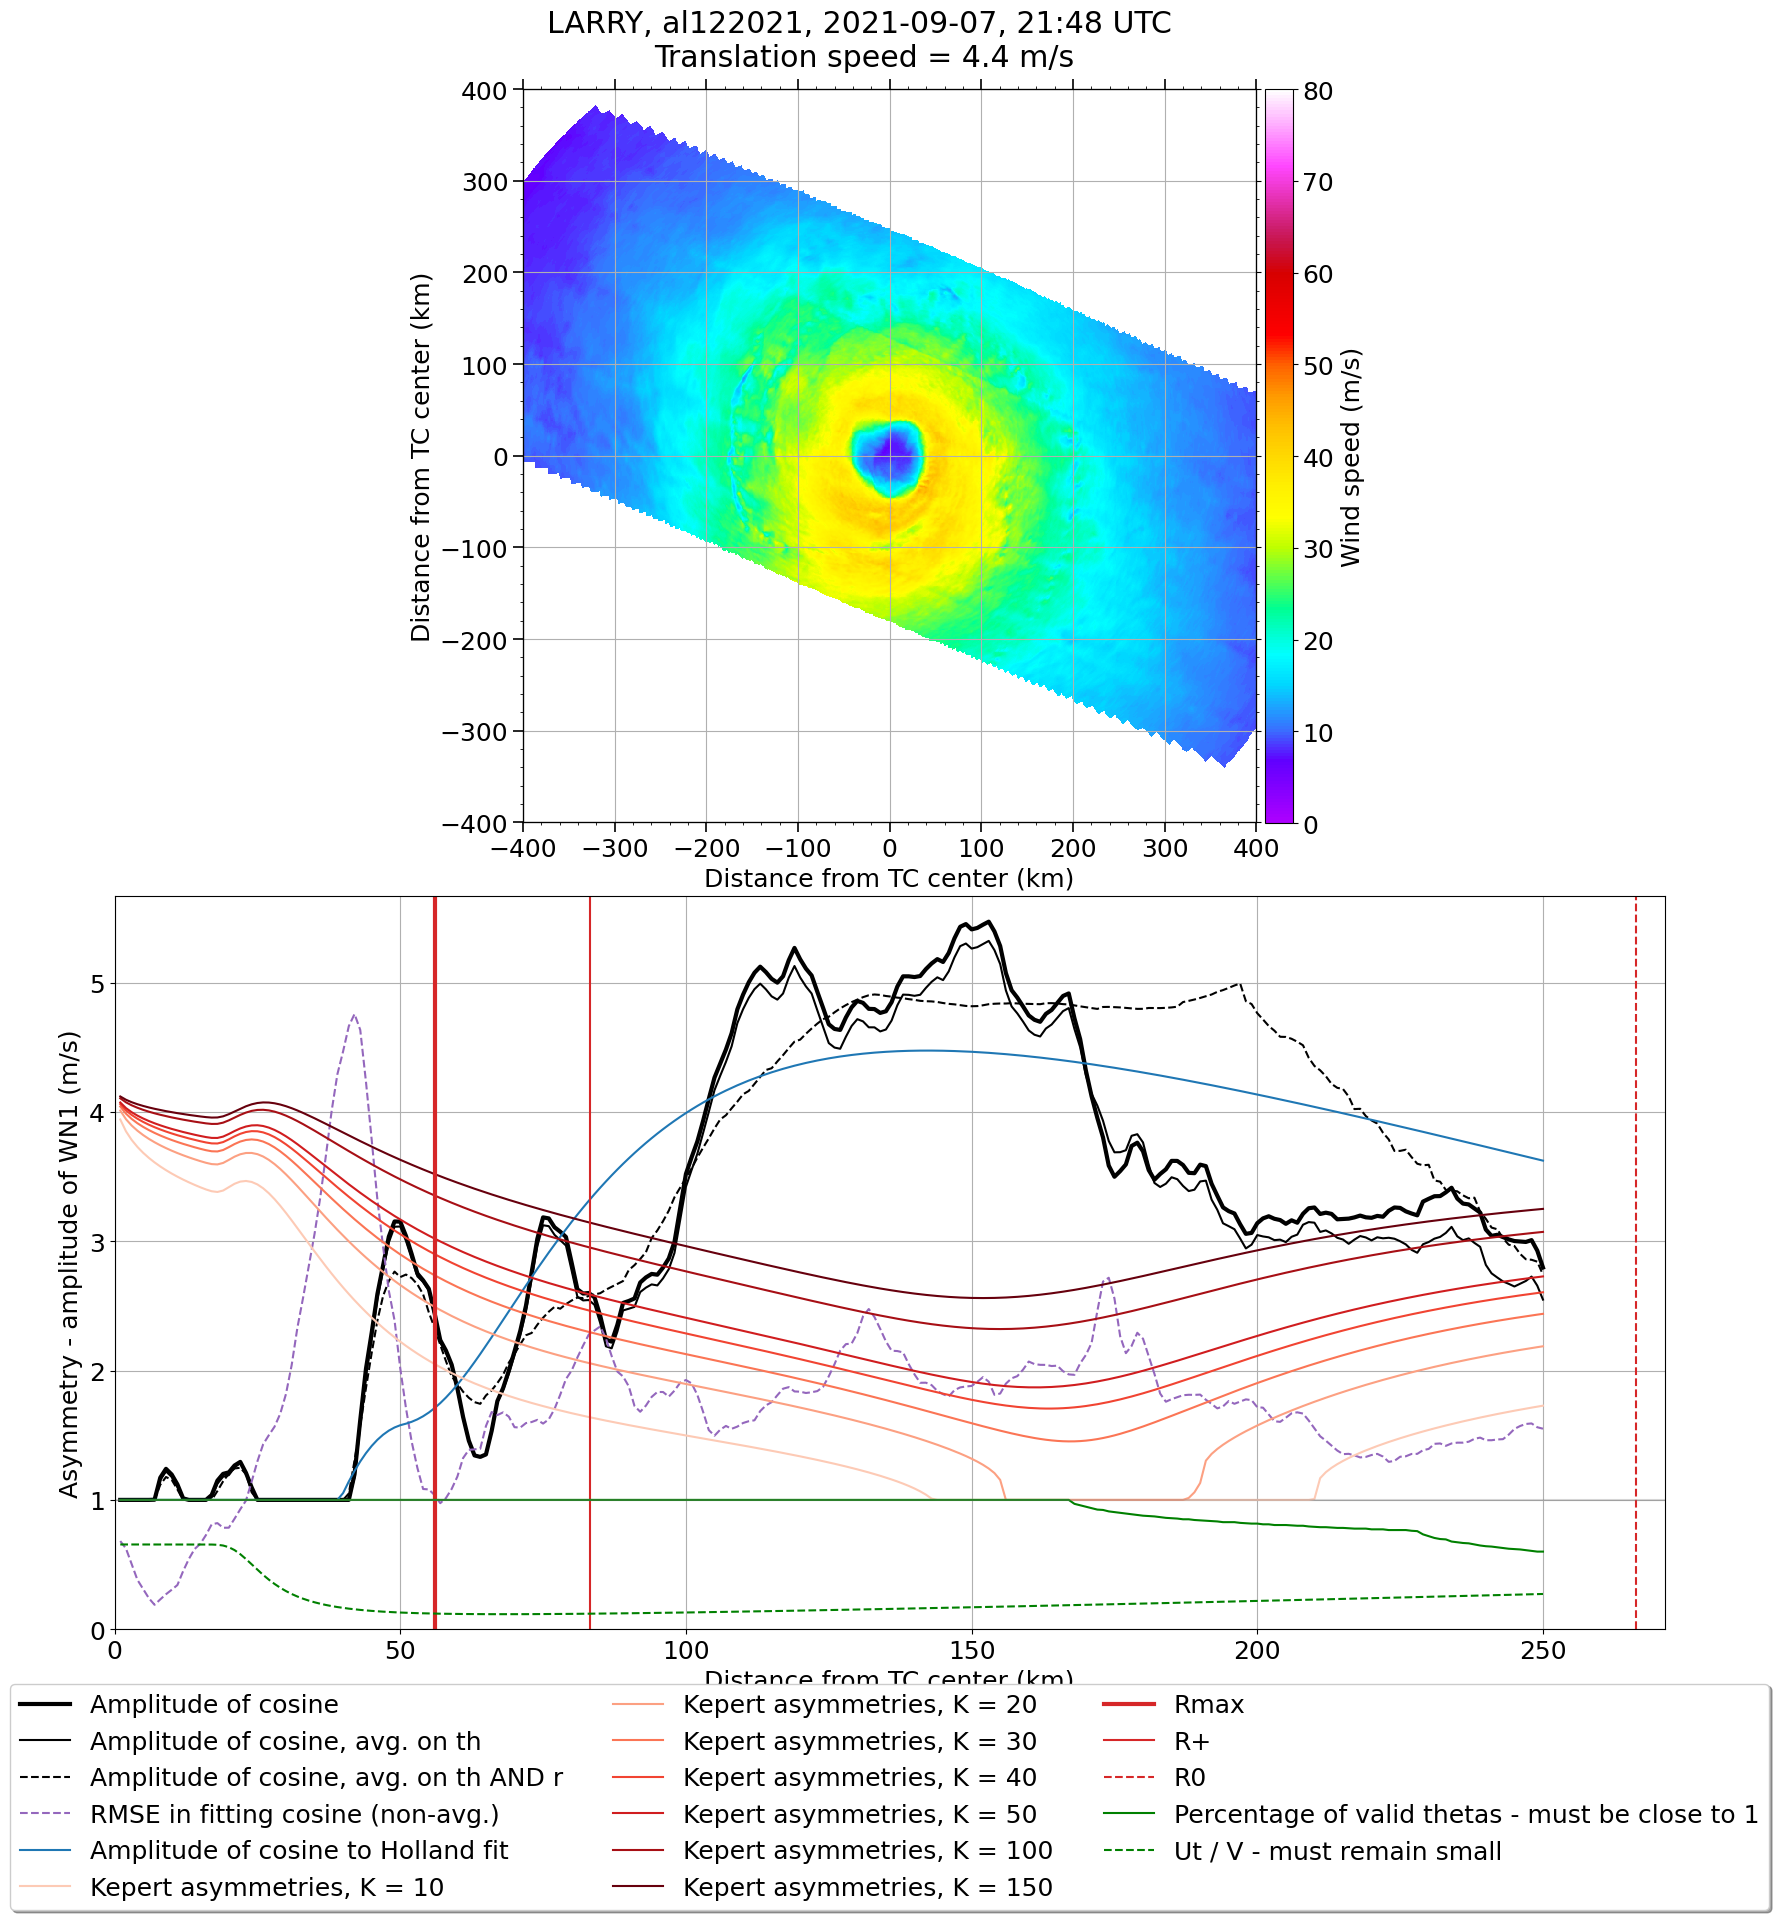

In [12]:
############
### Plot ###
############
fig          = plt.figure(figsize=(20, 20))
gs           = GridSpec(2, 1, hspace=0.1, wspace=0.01)
cmap         = mpl.cm.get_cmap('PuOr') # Spectral
normalizer   = Normalize(0, 80)
ax_lims2D    = 400
ts           = pd.to_datetime(str(ds.time.values)) 
d            = ts.strftime('%Y-%m-%d, %H:%M')
plt.suptitle('{}, {}, {} UTC \nTranslation speed = {:.1f} m/s'.format(ds.name.item(), ds.id.item(), d, ds.speed), y=0.92)

### Plot SAR
ax           = fig.add_subplot(gs[0, 0])
dr, th       = np.meshgrid(dsp.rad, np.deg2rad(dsp.theta))
ds_x, ds_y   = pol2cart(dr, th)
ws_car       = griddata((ds_x.flatten(), ds_y.flatten()), np.array(dsp.wind_speed.transpose()).flatten(), (x_ref, y_ref), method='linear')
im           = ax.pcolormesh(x_ref / 1000, y_ref / 1000, ws_car, cmap=cwnd, norm=normalizer)

# Axes
ax.set_xlim(-ax_lims2D, ax_lims2D);ax.set_ylim(-ax_lims2D, ax_lims2D)
ax.set_ylabel(r'Distance from TC center (km)')
ax.set_xlabel(r'Distance from TC center (km)')
ax.set_box_aspect(1)
ax.minorticks_on()
ax.tick_params(length=7, width=1.2)
ax.grid()

ax2 = ax.twinx().twiny() 
ax2.set_xlim(-ax_lims2D, ax_lims2D);ax2.set_ylim(-ax_lims2D, ax_lims2D)
ax2.minorticks_on()
ax2.tick_params(axis='both', length=7, width=1.2)
ax2.set_box_aspect(1)
ax2.set_yticklabels([])
ax2.set_xticklabels([])

# Colorbar
cb_ax = fig.add_axes([0.7, 0.513, 0.014, 0.367])
cbar  = fig.colorbar(im, cax=cb_ax)
cbar.set_label(r'Wind speed (m/s)', rotation=90)
cbar.ax.get_yaxis().labelpad=5

### Plot asymmetries (SAR + Kepert)
ax       = fig.add_subplot(gs[1, 0])

ax.plot(xs / 1000, ASS, c='k',          linewidth=3,        label='Amplitude of cosine')
ax.plot(xs / 1000, AS2, c='k',                              label='Amplitude of cosine, avg. on th')
ax.plot(xs / 1000, AS3, c='k',          linestyle='dashed', label='Amplitude of cosine, avg. on th AND r')
ax.plot(xs / 1000, ERR, c='tab:purple', linestyle='dashed', label='RMSE in fitting cosine (non-avg.)')
ax.plot(xs / 1000, ACN, c='tab:blue',                       label='Amplitude of cosine to Holland fit')
# ax.plot(ds.rad / 1000, ds.quantile_diff,       c='tab:blue',   linewidth=3,        label='10%-quantile difference')
# Kepert asymmetry profiles
for i, K in enumerate(Ks):
    ax.plot(xs / 1000, AKS[K],                 c=colors[i],                        label='Kepert asymmetries, K = {}'.format(K))
# Wind radii
ax.axvline(ds.rmx / 1000,                      c='tab:red',    linewidth=3,        label='Rmax')
ax.axvline(ds.rps / 1000,                      c='tab:red',                        label='R+')
ax.axvline(ds.r0 / 1000,                       c='tab:red',    linestyle='dashed', label='R0')

# # I ~ V/r
# ax.axvline(ds.I_Vr1 / 1000,                    c='orange',                         label='I ~ V/r with SAR wind speed (not BL-top)')
# ax.axvline(ds.I_Vr2 / 1000,                    c='orange')

# Validity curves
# ax.plot(xs / 1000, first_term_eq5_k01 / secnd_term_eq5_k01,      c='green',      linewidth=3,        label='Inertial ratio - must be close to 1')
ax.plot(xs / 1000, np.array(VTS) / 360., c='green',                          label='Percentage of valid thetas - must be close to 1')
ax.plot(xs / 1000, Ut / Vs[0, idxs],      c='green',      linestyle='dashed', label='Ut / V - must remain small')
ax.axhline(1, c='gray', alpha=0.3)

# Legends
ax.set_xlabel(r'Distance from TC center (km)')
ax.set_ylabel('Asymmetry - amplitude of WN1 (m/s)')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3, fancybox=True, shadow=True)
ax.set_xlim(0, max(float(ds.r0 / 1000) + 5, 250))
ax.set_ylim(0, 0.2 + float(max(max(ASS), max(ERR))))
ax.grid()

Good fit in terms of wind speeds, for both K = 10 and K = 50 (and the others).

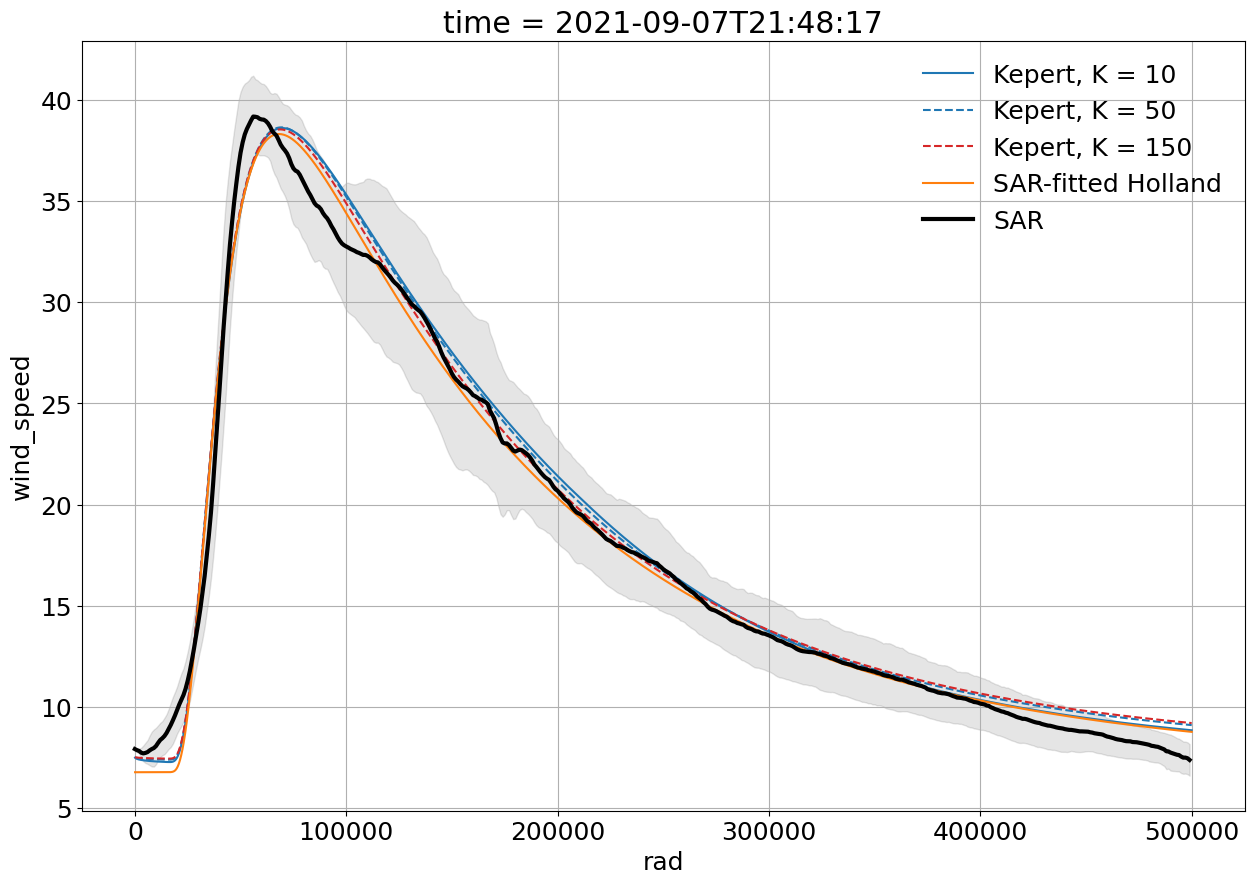

In [11]:
wsm = dsp.wind_speed.mean(dim='theta')
wss = dsp.wind_speed.std(dim='theta')

KEP_POLS[10].wind_speed.mean(dim='theta', skipna=True).plot(c='tab:blue', label='Kepert, K = 10')
KEP_POLS[50].wind_speed.mean(dim='theta', skipna=True).plot(c='tab:blue', label='Kepert, K = 50', linestyle='dashed')
KEP_POLS[150].wind_speed.mean(dim='theta', skipna=True).plot(c='tab:red', label='Kepert, K = 150', linestyle='dashed')
plt.plot(rs, V, c='tab:orange', label='SAR-fitted Holland')
wsm.plot(c='k', linewidth=3, label='SAR')
plt.fill_between(wsm.rad, wsm - wss, wsm + wss, color='k', alpha=0.1)
plt.legend(frameon=False)
plt.grid()

### Scatterometer and SAR inflow angle

Almost no difference in terms of inflow angle between K = 10 and K = 50.

Thus, in what follows I use K = 20, as if the asymetries were fitted only at r=Rmax.

In [12]:
### Compute the scatterometer inflow angle

# 07 September
# Metop-A vers 23:00: OK
# Metop-B vers minuit
# Metop-C vers 14:00: OK

# Open data
metopa = xr.open_dataset('/home/arthur/data/scatterometer/samples/ascat_20210907_225400_metopa_77247_eps_o_coa_3202_ovw.l2.nc')
metopa = metopa.isel(NUMCELLS=slice(0, 40), NUMROWS=slice(100, 250))

# metopa.wind_speed.plot(cmap=cwnd, norm=normalizer)

# Get center position from IBTrACS
ds_ibt                = xr.open_dataset('/home/arthur/data/tropical_cyclones/ibtracs/24032025/IBTrACS.ALL.v04r01.nc')[['usa_lon', 'usa_lat', 'usa_atcf_id']]
ds_ibt['usa_atcf_id'] = ds_ibt['usa_atcf_id'].astype(str, copy=False) 
dsi                   = ds_ibt.where(ds_ibt.usa_atcf_id == ds.id.item().upper(), drop=True).isel(storm=0)
dsi_interp            = dsi.assign_coords({'date_time': dsi['time']}).dropna(dim='date_time', subset=['usa_lat'])[['usa_lon', 'usa_lat']].drop_indexes('date_time').interp(date_time=metopa.time.mean())
lon_cen, lat_cen      = float(dsi_interp.usa_lon), float(dsi_interp.usa_lat)

from pyproj import CRS, Geod

lons        = np.array(metopa.lon)
lats        = np.array(metopa.lat)

lons_center = np.ones_like(lons) * lon_cen
lats_center = np.ones_like(lats) * lat_cen

geod_wgs84        = CRS("epsg:4326").get_geod()
forward_az, _, dr = geod_wgs84.inv(lons_center, lats_center, lons, lats)

def get_polar_theta(forward_az):
    '''INPUT: forward_az: 0° is North, 90° is East;
    OUTPUT: theta: 0° is East, 90° is North'''
    theta = (90 - forward_az) % 360 # 0° is North, 90° is East
    return theta

th = get_polar_theta(forward_az) # r is dr

# metopa['radial_wind']     = - metopa.wind_speed * np.sin(np.deg2rad((2 * np.pi - metopa.wind_dir) - th))
# metopa['tangential_wind'] =   metopa.wind_speed * np.cos(np.deg2rad((2 * np.pi - metopa.wind_dir) - th))

# metopa['radial_wind']     = - metopa.wind_speed * np.sin(np.deg2rad( - metopa.wind_dir - th))
# metopa['tangential_wind'] =   metopa.wind_speed * np.cos(np.deg2rad( - metopa.wind_dir - th))

metopa['radial_wind']     = metopa.wind_speed * np.sin(np.deg2rad(metopa.wind_dir + th))
metopa['tangential_wind'] = metopa.wind_speed * np.cos(np.deg2rad(metopa.wind_dir + th))

# Interpolate on reference grid
r_ref        = np.linspace(0, 500, int((500 // 1) + 1))
t_ref        = np.linspace(0, 360, 361)
r_grd, t_grd = np.meshgrid(r_ref, t_ref)
ws_pol       = griddata((dr.flatten() / 1000, th.flatten()), np.array(metopa.wind_speed).flatten(), (r_grd, t_grd), method='linear')
u_pol        = griddata((dr.flatten() / 1000, th.flatten()), np.array(metopa.radial_wind).flatten(), (r_grd, t_grd), method='linear')
v_pol        = griddata((dr.flatten() / 1000, th.flatten()), np.array(metopa.tangential_wind).flatten(), (r_grd, t_grd), method='linear')

# Create xr.Dataset
ds_pol = xr.Dataset(
    data_vars={
        'wind_speed':      (['theta', 'rad'], ws_pol),
        'radial_wind':     (['theta', 'rad'], u_pol),
        'tangential_wind': (['theta', 'rad'], v_pol),
        'lat_cen':         ([], lat_cen),
        'lon_cen':         ([], lon_cen),
    },
    coords={
        'theta': t_ref,
        'rad':   r_ref * 1000
    }
)

#################
### CARTESIAN ###
#################

def pol2cart(r, th):
    x = r * np.cos(th)
    y = r * np.sin(th)
    return x, y

ds_x, ds_y = pol2cart(dr, np.deg2rad(th))

### Interpolate on reference grid
# Create ref. grid, choose resolution
dim_ref      = np.linspace(-500, 500, int((500 // 1 * 2) + 1)) * 1000
x_ref, y_ref = np.meshgrid(dim_ref, dim_ref)
# Interpolate on reference grid
ws_car       = griddata((ds_x.flatten(), ds_y.flatten()), np.array(metopa.wind_speed).flatten(), (x_ref, y_ref), method='linear')
u_car       = griddata((ds_x.flatten(), ds_y.flatten()), np.array(metopa.radial_wind).flatten(), (x_ref, y_ref), method='linear')
v_car       = griddata((ds_x.flatten(), ds_y.flatten()), np.array(metopa.tangential_wind).flatten(), (x_ref, y_ref), method='linear')

#  Create Dataset
ds_car = xr.Dataset(
    data_vars={
        'wind_speed':      (['x', 'y'], ws_car), 
        'radial_wind':     (['x', 'y'], u_car),
        'tangential_wind': (['x', 'y'], v_car),
        'lat_cen':         ([], lat_cen),
        'lon_cen':         ([], lon_cen),
    },
    coords={
        'x': dim_ref,
        'y': dim_ref
    }
)

# Filter the 0 m/s values
ds_pol['wind_speed'] = xr.where(ds_pol['wind_speed'] > 0, ds_pol['wind_speed'], np.nan)
ds_car['wind_speed'] = xr.where(ds_car['wind_speed'] > 0, ds_car['wind_speed'], np.nan)

# Inflow angle
a_sct = np.rad2deg(np.arctan(abs(ds_pol.radial_wind.mean(dim='theta', skipna=True)) / abs(ds_pol.tangential_wind.mean(dim='theta', skipna=True))))

In [18]:
# Inflow angle SAR
RS, THS                = np.meshgrid(dsp.rad, dsp.theta)
wdir                   = dsp.wind_from_direction - (dsp.rotation_angle + 90)
dsp['radial_wind']     = dsp.wind_speed * np.sin(np.deg2rad(wdir + THS.transpose()))
dsp['tangential_wind'] = dsp.wind_speed * np.cos(np.deg2rad(wdir + THS.transpose()))
a_sar                  = np.rad2deg(np.arctan(abs(dsp.radial_wind.mean(dim='theta', skipna=True)) / abs(dsp.tangential_wind.mean(dim='theta', skipna=True))))

In [23]:
# a1   = np.rad2deg(np.arctan(abs(KEP_POLS[1].rad_wind) / abs(KEP_POLS[1].tan_wind)))
a10  = np.rad2deg(np.arctan(abs(KEP_POLS[10].rad_wind) / abs(KEP_POLS[10].tan_wind)))
a50  = np.rad2deg(np.arctan(abs(KEP_POLS[50].rad_wind) / abs(KEP_POLS[50].tan_wind)))
a150 = np.rad2deg(np.arctan(abs(KEP_POLS[150].rad_wind) / abs(KEP_POLS[150].tan_wind)))

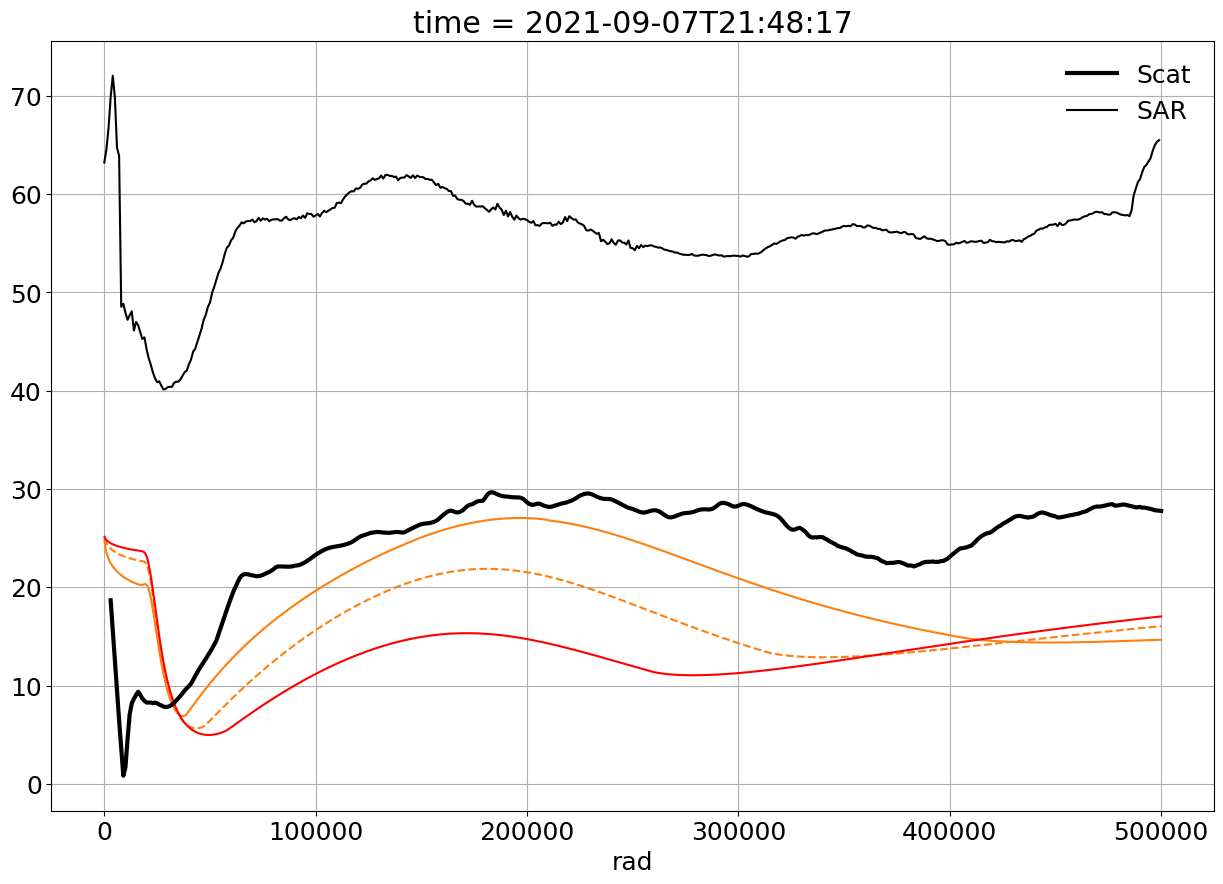

In [25]:
# a1.mean(dim='theta').plot(c='tab:blue')
a10.mean(dim='theta').plot(c='tab:orange')
a50.mean(dim='theta').plot(c='tab:orange', linestyle='dashed')
a150.mean(dim='theta').plot(c='r')
a_sct.plot(c='k', linewidth=3, label='Scat') # scatterometer
a_sar.plot(c='k',              label='SAR') # SAR
plt.grid()
plt.legend(frameon=False)

In [14]:
# May lasts a few seconds
kep_car = get_xrDataset_cartesian(Xs, Ys, x_ref, y_ref, dim_ref, KEP_POLS[20])

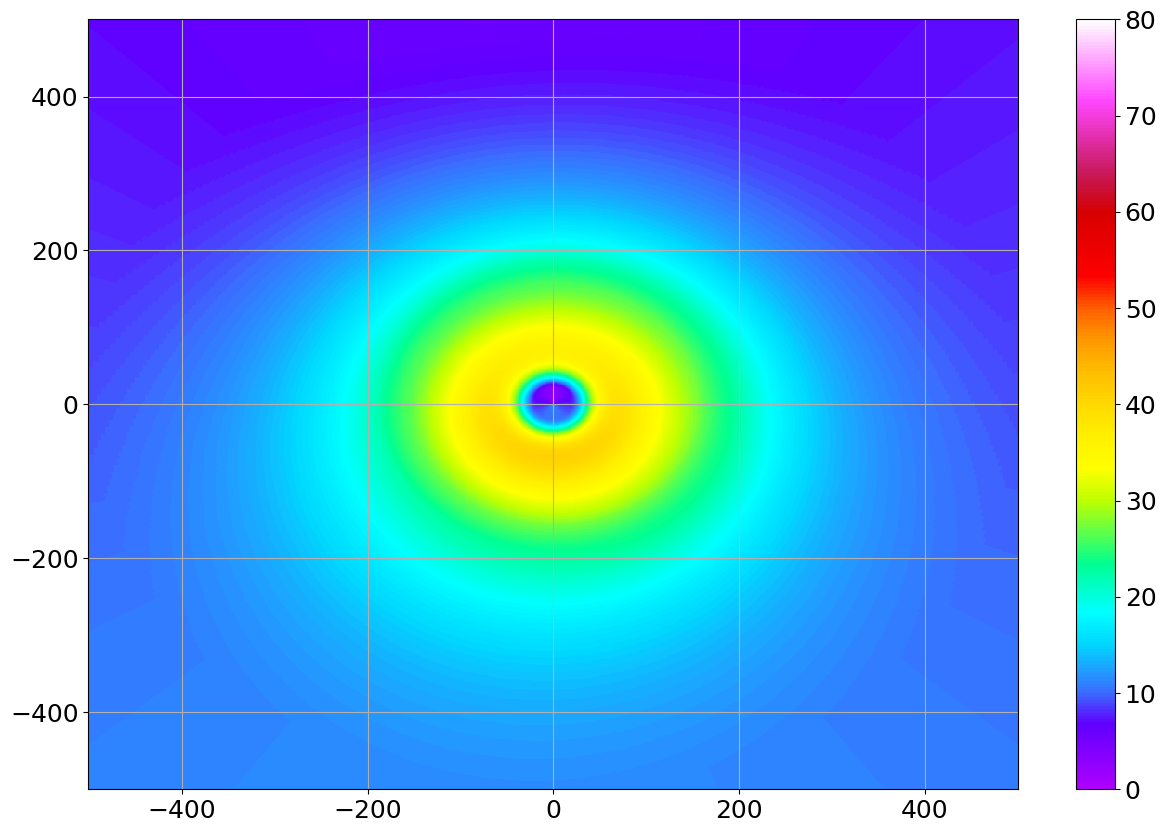

In [15]:
plt.pcolormesh(kep_car.x / 1000, kep_car.y / 1000, kep_car.wind_speed, cmap=cwnd, norm=normalizer)
plt.colorbar()
plt.grid()

I then look at the vertical profiles of wind speed

In [16]:
### Dependance on z
kep_pol20, kep_car20 = get_z_kepert(THs, Rs, ths, rs, zs, Vs, Ut, 20, C, fcr)

  0%|          | 0/8 [00:00<?, ?it/s]

Polar dataset created.


  0%|          | 0/8 [00:00<?, ?it/s]

Cartesian dataset created.


In [17]:
### Dependance on z
kep_pol20Cmod, kep_car20Cmod = get_z_kepert(THs, Rs, ths, rs, zs, Vs, Ut, 20 / 4, C / 2, fcr) # C / sqrt(K) kept constant (compared to previous case)

  0%|          | 0/8 [00:00<?, ?it/s]

Polar dataset created.


  0%|          | 0/8 [00:00<?, ?it/s]

Cartesian dataset created.


In [18]:
### Dependance on z
kep_pol50, kep_car50 = get_z_kepert(THs, Rs, ths, rs, zs, Vs, Ut, 50, C, fcr)

  0%|          | 0/8 [00:00<?, ?it/s]

Polar dataset created.


  0%|          | 0/8 [00:00<?, ?it/s]

Cartesian dataset created.


In [19]:
# ### Dependance on z
# kep_pol150, kep_car150 = get_z_kepert(THs, Rs, ths, rs, zs, Vs, Ut, 150, C, fcr)

# # Select the area of maximum wind speeds in the right quadrant and average
# kep_pol150.sel(theta=slice(250, 300), rad=slice(50000, 100000)).mean(dim=['rad', 'theta'], skipna=True).wind_speed.plot()
# plt.grid()

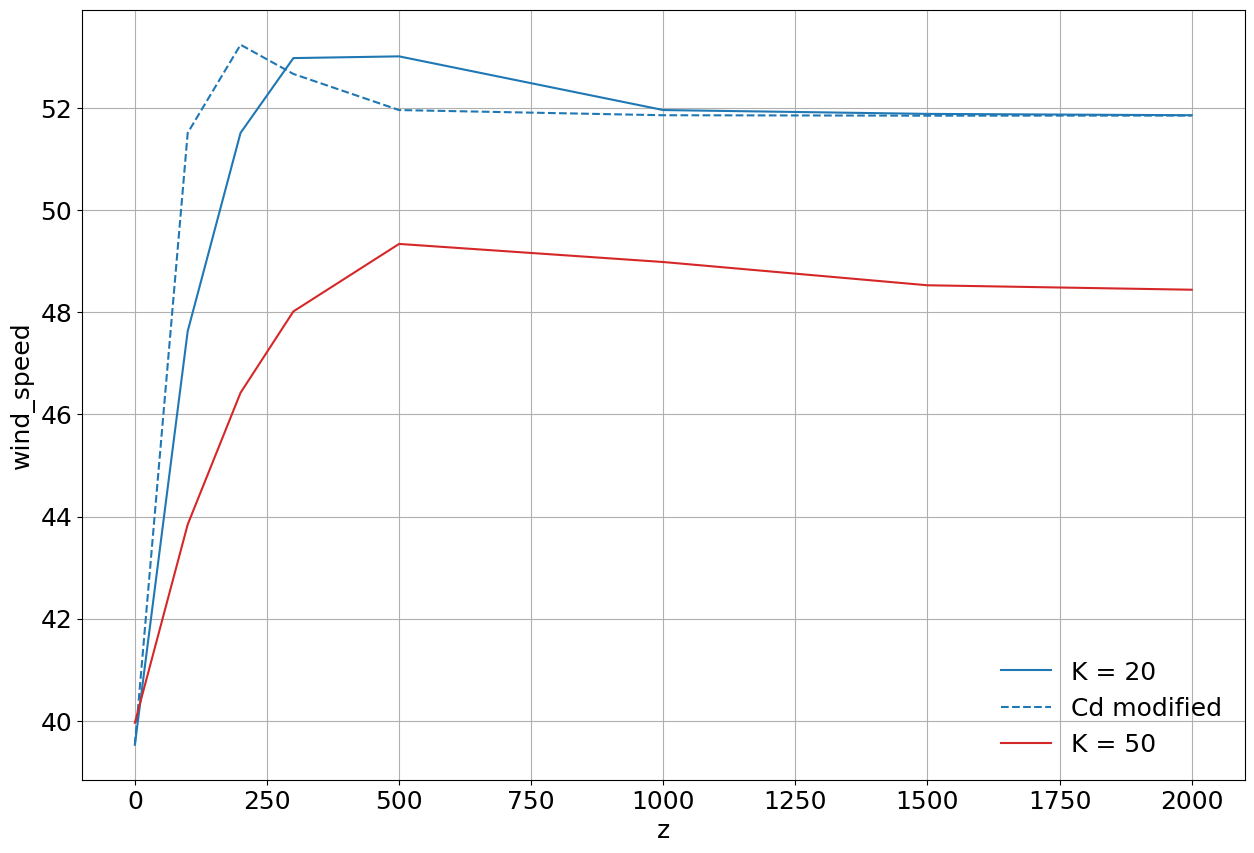

In [20]:
# Select the area of maximum wind speeds in the right quadrant and average
kep_pol20.sel(theta=slice(250, 300), rad=slice(50000, 100000)).mean(dim=['rad', 'theta'], skipna=True).wind_speed.plot(c='tab:blue', label='K = 20')
kep_pol20Cmod.sel(theta=slice(250, 300), rad=slice(50000, 100000)).mean(dim=['rad', 'theta'], skipna=True).wind_speed.plot(c='tab:blue', label='Cd modified', linestyle='dashed')
kep_pol50.sel(theta=slice(250, 300), rad=slice(50000, 100000)).mean(dim=['rad', 'theta'], skipna=True).wind_speed.plot(c='tab:red', label='K = 50')
plt.grid()
plt.legend(frameon=False)

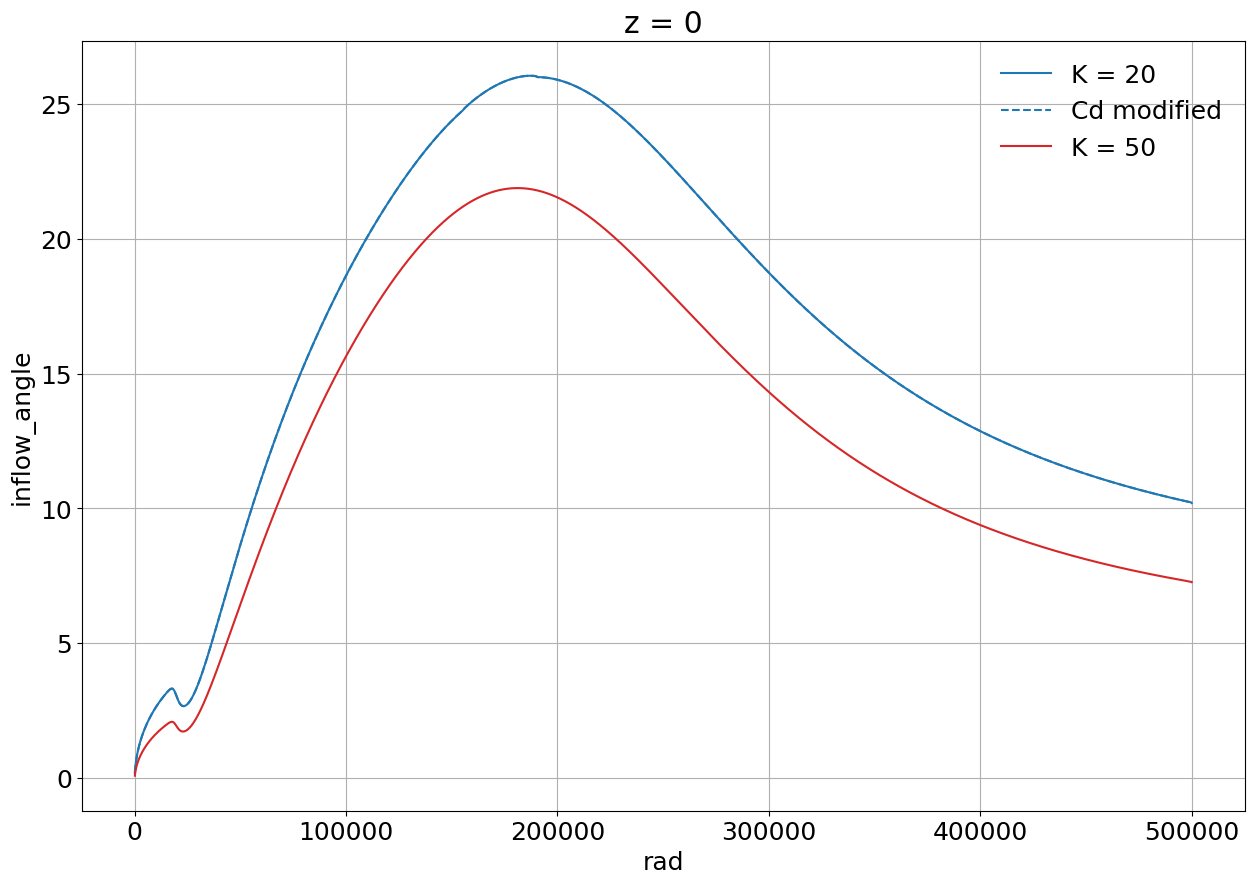

In [21]:
abs(kep_pol20.sel(z=0).inflow_angle.mean(dim='theta', skipna=True)).plot(c='tab:blue', label='K = 20')
abs(kep_pol20Cmod.sel(z=0).inflow_angle.mean(dim='theta', skipna=True)).plot(c='tab:blue', label='Cd modified', linestyle='dashed')
abs(kep_pol50.sel(z=0).inflow_angle.mean(dim='theta', skipna=True)).plot(c='tab:red', label='K = 50')
plt.grid()
plt.legend(frameon=False)

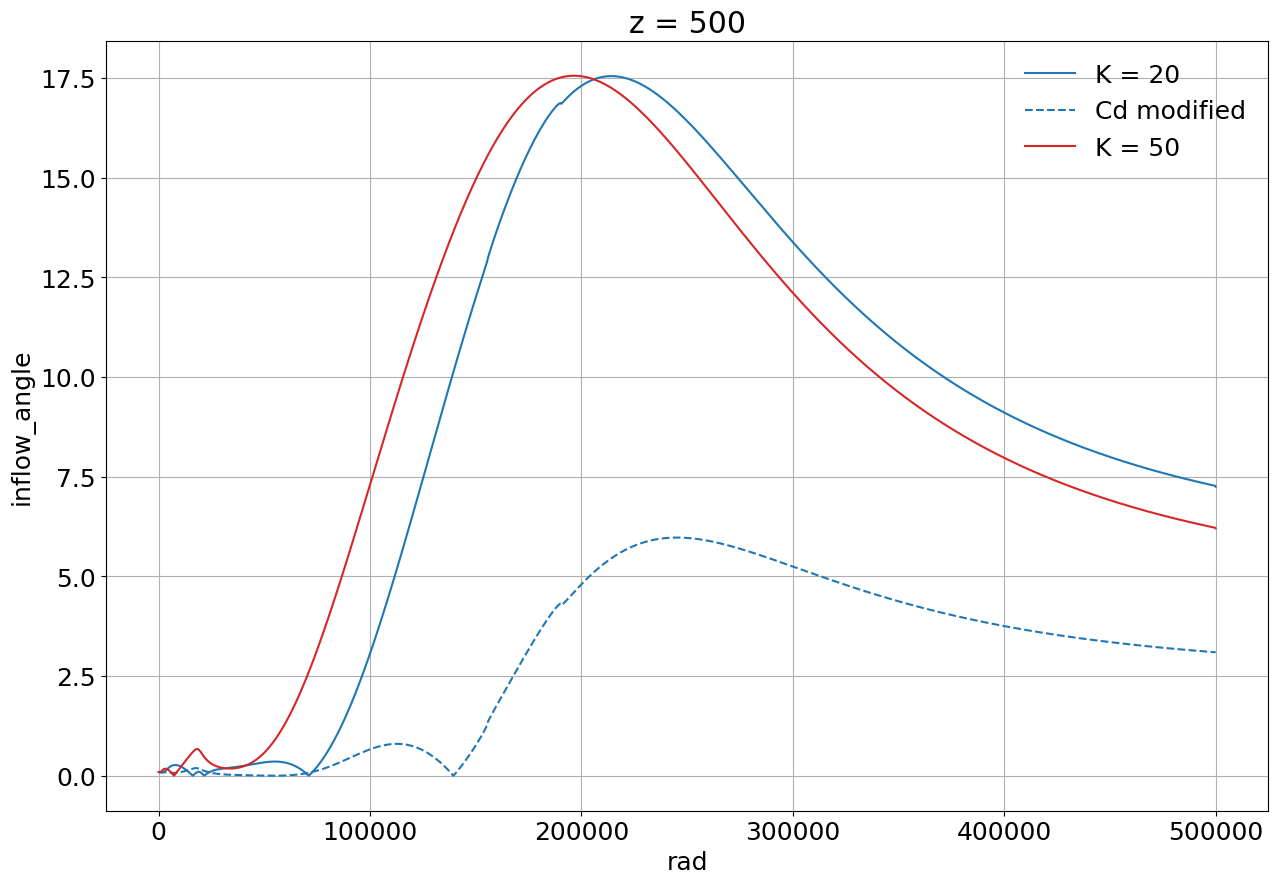

In [22]:
abs(kep_pol20.sel(z=500).inflow_angle.mean(dim='theta', skipna=True)).plot(c='tab:blue', label='K = 20')
abs(kep_pol20Cmod.sel(z=500).inflow_angle.mean(dim='theta', skipna=True)).plot(c='tab:blue', label='Cd modified', linestyle='dashed')
abs(kep_pol50.sel(z=500).inflow_angle.mean(dim='theta', skipna=True)).plot(c='tab:red', label='K = 50')
plt.grid()
plt.legend(frameon=False)

In [23]:
wEk20      = get_w_Ekman(Rs, rs, Vs, 20,     C,     fcr)
wEk20Cmod  = get_w_Ekman(Rs, rs, Vs, 20 / 4, C / 2, fcr)
wEk20Cmod2 = get_w_Ekman(Rs, rs, Vs, 20 * 4, C * 2, fcr)
wEk50      = get_w_Ekman(Rs, rs, Vs, 50,     C,     fcr)
wEk150     = get_w_Ekman(Rs, rs, Vs, 150,    C,     fcr)

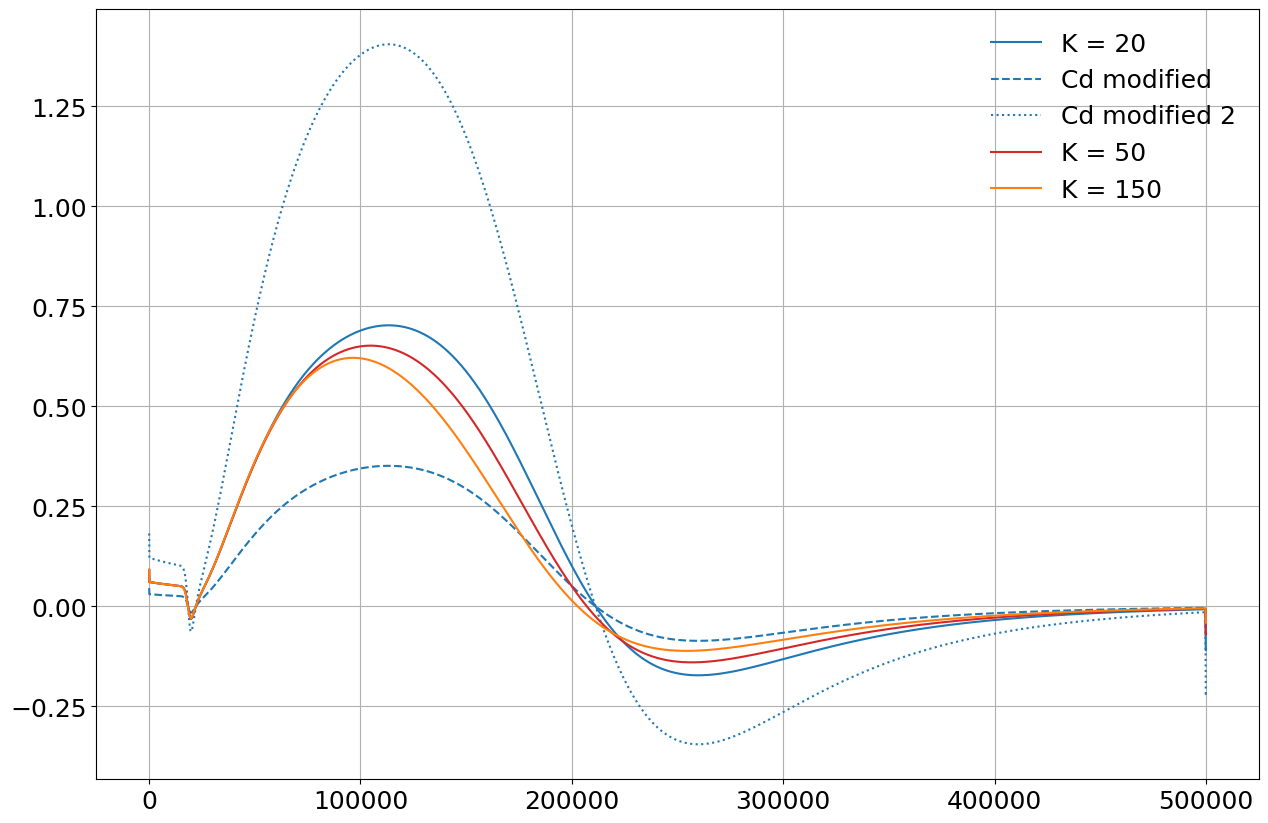

In [24]:
plt.plot(rs, wEk20,      c='tab:blue',    label='K = 20')
plt.plot(rs, wEk20Cmod,  c='tab:blue',    label='Cd modified',   linestyle='dashed')
plt.plot(rs, wEk20Cmod2, c='tab:blue',    label='Cd modified 2', linestyle='dotted')
plt.plot(rs, wEk50,      c='tab:red',     label='K = 50')
plt.plot(rs, wEk150,     c='tab:orange',  label='K = 150')
plt.grid()
plt.legend(frameon=False)

In [25]:
# Obtain w
kep_pol20, kep_car20 = get_w(kep_pol20, kep_car20, zs)

  0%|          | 0/8 [00:00<?, ?it/s]

In [69]:
kep_pol20Cmod, kep_car20Cmod = get_w(kep_pol20Cmod, kep_car20Cmod, zs)

  0%|          | 0/8 [00:00<?, ?it/s]

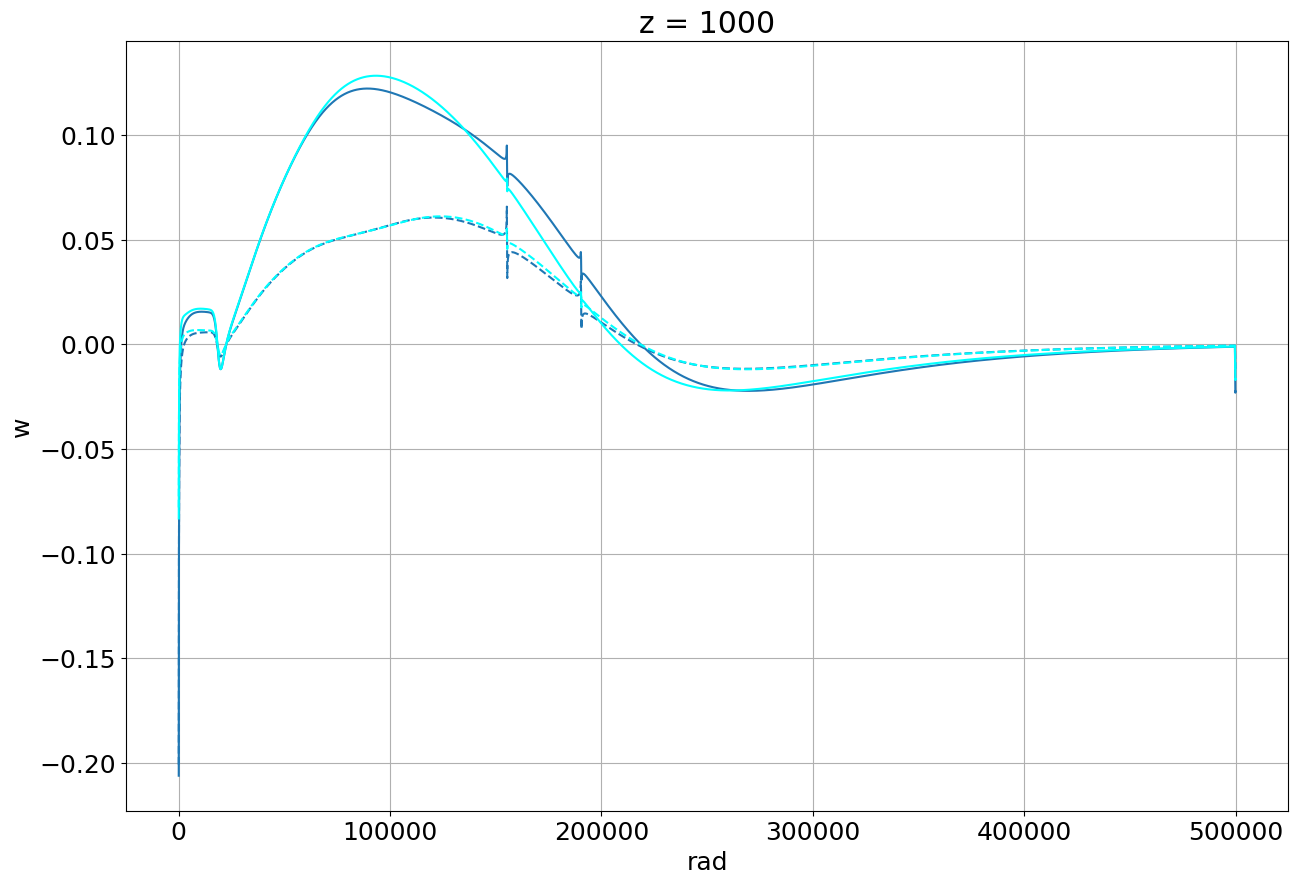

In [73]:
kep_pol20.sel(z=2000).w.mean(dim='theta').plot(c='tab:blue',    label='K = 20')
kep_pol20Cmod.sel(z=2000).w.mean(dim='theta').plot(c='tab:blue',    label='Cd modified',   linestyle='dashed')

kep_pol20.sel(z=1000).w.mean(dim='theta').plot(c='cyan',    label='K = 20')
kep_pol20Cmod.sel(z=1000).w.mean(dim='theta').plot(c='cyan',    label='Cd modified',   linestyle='dashed')
plt.grid()

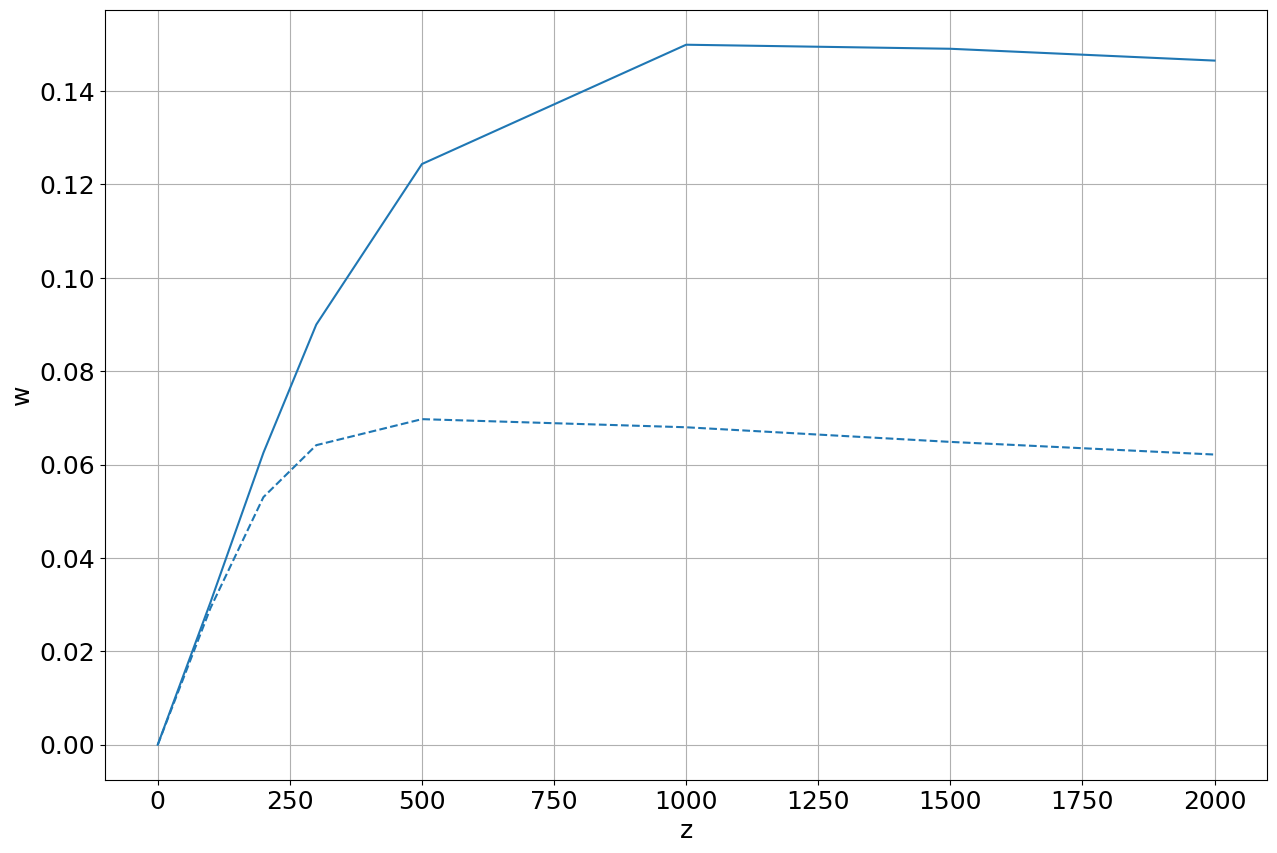

In [71]:
kep_pol20.sel(theta=slice(250, 300), rad=slice(50000, 100000)).mean(dim=['rad', 'theta']).w.plot(c='tab:blue',    label='K = 20')
kep_pol20Cmod.sel(theta=slice(250, 300), rad=slice(50000, 100000)).mean(dim=['rad', 'theta']).w.plot(c='tab:blue',    label='Cd modified',   linestyle='dashed')
plt.grid()

### Radiometer asymmetries

/tmp/ipykernel_4947/2707854364.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dsi_interp            = dsi.assign_coords({'date_time': dsi['time']}).dropna(dim='date_time', subset=['usa_lat'])[['usa_lon', 'usa_lat']].drop_indexes('date_time').interp(date_time=[np.datetime64('2021-09-07T09:27:00')])


  0%|          | 0/250 [00:00<?, ?it/s]

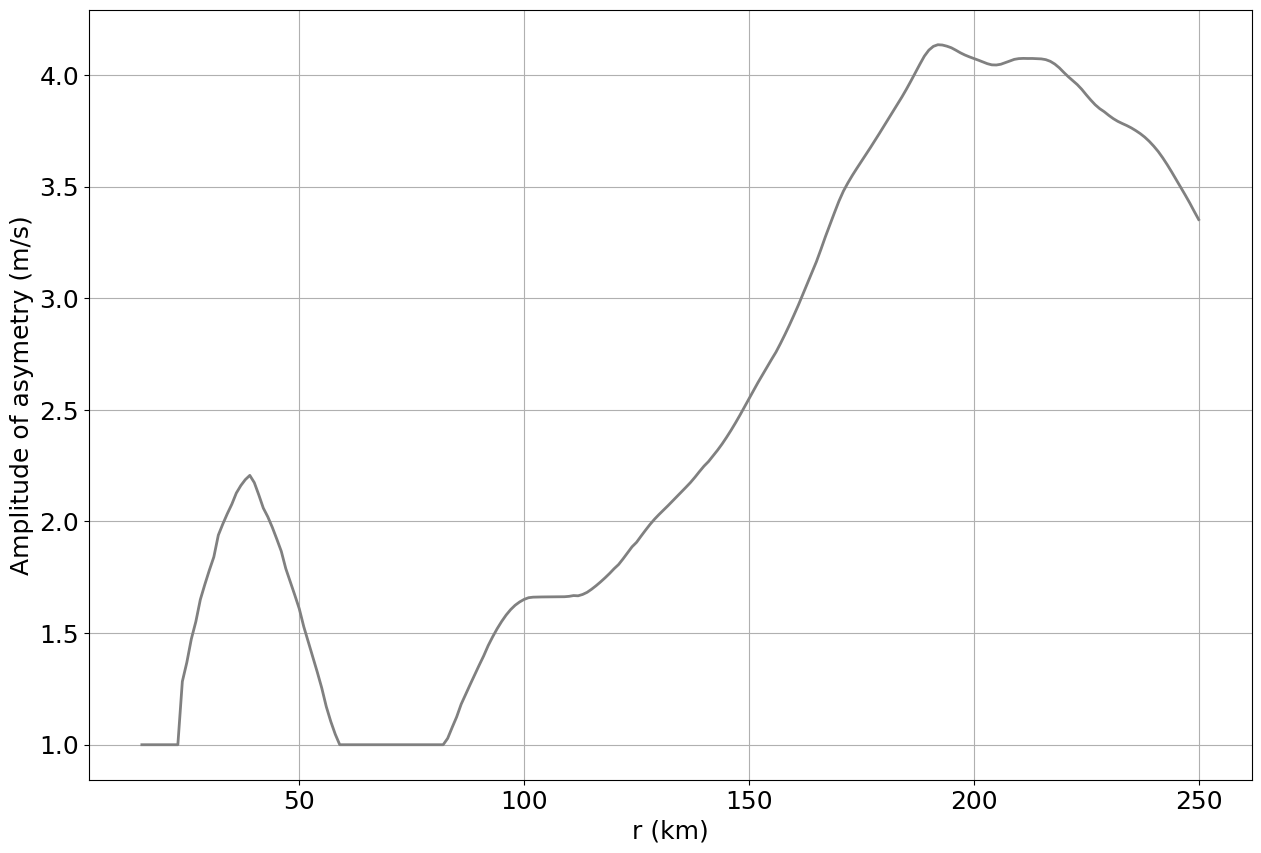

In [151]:
### Compute the radiometer asymetries!
from pyproj import CRS, Geod

# Asymetries from L-band radiometer 12 hours before
smos = xr.open_dataset('/home/arthur/data/tropical_cyclones/imaging_radiometer/smos/2021/250/SM_OPER_MIR_20210907T092518_20210907T093056_al122021.nc')
# smos.wind_speed.plot(cmap=cwnd, norm=normalizer)
# plt.scatter(lon_cen, lat_cen)

# # Well collocated but cropped image
# smos = xr.open_dataset('/home/arthur/data/tropical_cyclones/imaging_radiometer/smos/2021/250/SM_OPER_MIR_20210907T214046_20210907T214748_al122021.nc')
# smos.wind_speed.plot(cmap=cwnd, norm=normalizer)

# Get center position from IBTrACS
ds_ibt                = xr.open_dataset('/home/arthur/data/tropical_cyclones/ibtracs/24032025/IBTrACS.ALL.v04r01.nc')[['usa_lon', 'usa_lat', 'usa_atcf_id']]
ds_ibt['usa_atcf_id'] = ds_ibt['usa_atcf_id'].astype(str, copy=False) 
dsi                   = ds_ibt.where(ds_ibt.usa_atcf_id == ds.id.item().upper(), drop=True).isel(storm=0)
dsi_interp            = dsi.assign_coords({'date_time': dsi['time']}).dropna(dim='date_time', subset=['usa_lat'])[['usa_lon', 'usa_lat']].drop_indexes('date_time').interp(date_time=[np.datetime64('2021-09-07T09:27:00')])
lon_cen, lat_cen      = float(dsi_interp.usa_lon), float(dsi_interp.usa_lat)

lons        = np.array(smos.lon)
lats        = np.array(smos.lat)

lons, lats  = np.meshgrid(lons, lats)

lons_center = np.ones_like(lons) * lon_cen
lats_center = np.ones_like(lats) * lat_cen

geod_wgs84        = CRS("epsg:4326").get_geod()
forward_az, _, dr = geod_wgs84.inv(lons_center, lats_center, lons, lats)

def get_polar_theta(forward_az):
    '''INPUT: forward_az: 0° is North, 90° is East;
    OUTPUT: theta: 0° is East, 90° is North'''
    theta = (90 - forward_az) % 360 # 0° is North, 90° is East
    return theta

th = get_polar_theta(forward_az) # r is dr

# Interpolate on reference grid
r_ref        = np.linspace(0, 500, int((500 // 1) + 1))
t_ref        = np.linspace(0, 360, 361)
r_grd, t_grd = np.meshgrid(r_ref, t_ref)
ws_pol       = griddata((dr.flatten() / 1000, th.flatten()), np.array(smos.wind_speed).flatten(), (r_grd, t_grd), method='linear')

# Create xr.Dataset
ds_pol = xr.Dataset(
    data_vars={
        'wind_speed':      (['theta', 'rad'], ws_pol),
        'lat_cen':         ([], lat_cen),
        'lon_cen':         ([], lon_cen),
    },
    coords={
        'theta': t_ref,
        'rad':   r_ref * 1000
    }
)

#################
### CARTESIAN ###
#################

def pol2cart(r, th):
    x = r * np.cos(th)
    y = r * np.sin(th)
    return x, y

ds_x, ds_y = pol2cart(dr, np.deg2rad(th))

### Interpolate on reference grid
# Create ref. grid, choose resolution
dim_ref      = np.linspace(-500, 500, int((500 // 1 * 2) + 1)) * 1000
x_ref, y_ref = np.meshgrid(dim_ref, dim_ref)
# Interpolate on reference grid
ws_car       = griddata((ds_x.flatten(), ds_y.flatten()), np.array(smos.wind_speed).flatten(), (x_ref, y_ref), method='linear')

#  Create Dataset
ds_car = xr.Dataset(
    data_vars={
        'wind_speed':      (['x', 'y'], ws_car), 
        'lat_cen':         ([], lat_cen),
        'lon_cen':         ([], lon_cen),
    },
    coords={
        'x': dim_ref,
        'y': dim_ref
    }
)

# Filter the 0 m/s values
ds_pol['wind_speed'] = xr.where(ds_pol['wind_speed'] > 0, ds_pol['wind_speed'], np.nan)
ds_car['wind_speed'] = xr.where(ds_car['wind_speed'] > 0, ds_car['wind_speed'], np.nan)

# Compute radiometer asymetries
ASS_SMOS = []
for rad in tqdm(xs):
    valid_dsp     = ds_pol.sel(rad=rad, method='nearest').dropna(subset=['wind_speed'], dim='theta')
    if len(valid_dsp.theta) > 0:
        ass, phi, c   = get_wn1(np.deg2rad(valid_dsp.theta), valid_dsp.wind_speed, float(ds.vps), float(ds.vmx))
    else:
        ass = phi = c = np.nan
    ASS_SMOS.append(float(ass))

plt.plot(xs / 1000, ASS_SMOS, c='gray', linewidth=2, label='SMOS')
plt.xlabel('r (km)')
plt.ylabel('Amplitude of asymetry (m/s)')
plt.grid()

### IWRAP

Ku1 is limited to z <= 1.5km. Well suited for lower levels.

Ku2 has the higher-resolution retrievals for the upper levels.

In [26]:
from pyproj import CRS, Geod

### FUNCTIONS
def get_polar_theta(forward_az):
    '''INPUT: forward_az: 0° is North, 90° is East;
    OUTPUT: theta: 0° is East, 90° is North'''
    theta = (90 - forward_az) % 360 # 0° is North, 90° is East
    return theta

def pol2cart(r, th):
    x = r * np.cos(th)
    y = r * np.sin(th)
    return x, y

def get_new_aircraft_coords_based_on_storm_motion(diwp, storm_dir, storm_speed, time_cen, lon_cen, lat_cen):
    '''storm_dir: usually float(ds.storm_dir_ibt), i.e degrees east of north
    storm_speed: usually float(ds.storm_speed_ibt), i.e m/s
    time_cen: usually ds.time, i.e np.datetime64 indicating the time of the considered center point
    lon_cen, lat_cen: usually float(ds.lon) and float(ds.lat), i.e coordinates of the storm center (degrees East and North)
    
    '''
    # Temps écoulé depuis le temps d'acquisition SAR
    dt              = diwp.time - time_cen
    diwp['dt_scds'] = xr.DataArray(
        data=np.array(dt.dt.days * 24 * 3600 + dt.dt.seconds),
        dims=['bin']
    )
    diwp.dt_scds.attrs['description'] = 'Temps écoulé depuis le temps d acquisition SAR'

    # New longitudes/latitudes after moving x meters to a specified direction
    geod_wgs84            = CRS("epsg:4326").get_geod()
    new_lons, new_lats, _ = geod_wgs84.fwd(lons=diwp.lon, lats=diwp.lat, az=np.ones_like(diwp.lon) * storm_dir, dist=diwp.dt_scds * storm_speed)
    
    diwp['new_lon']       = xr.DataArray(data=new_lons, dims=['bin'])
    diwp['new_lat']       = xr.DataArray(data=new_lats, dims=['bin'])
    diwp.new_lon.attrs['description'] = 'longitude of the point after correcting for storm motion'
    diwp.new_lat.attrs['description'] = 'latitude of the point after correcting for storm motion'

    # Compute polar coordinates
    geod_wgs84        = CRS("epsg:4326").get_geod()
    forward_az, _, dr = geod_wgs84.inv(np.ones_like(diwp.lon) * lon_cen, np.ones_like(diwp.lat) * lat_cen, diwp.new_lon, diwp.new_lat)
    th                = get_polar_theta(forward_az) # r is dr
    
    diwp['r']         = xr.DataArray(data=dr, dims=['bin'])
    diwp['th']        = xr.DataArray(data=th, dims=['bin'])
    diwp.r.attrs['description']  = 'radius of the point after correcting for storm motion'
    diwp.th.attrs['description'] = 'azimuth of the point after correcting for storm motion'

    # Compute cartesian coordinates
    x, y      = pol2cart(dr, np.deg2rad(th))
    diwp['x'] = xr.DataArray(data=x, dims=['bin'])
    diwp['y'] = xr.DataArray(data=y, dims=['bin'])
    diwp.x.attrs['description'] = 'x of the point after correcting for storm motion'
    diwp.y.attrs['description'] = 'y of the point after correcting for storm motion'

    return diwp

In [27]:
diwp1 = xr.open_dataset(PTHS['iwp_dir'] + 'IWRAP_3Dsp_ku1_20210907I1_20230522T193045.nc')
diwp2 = xr.open_dataset(PTHS['iwp_dir'] + 'IWRAP_3Dsp_ku2_20210907I1_20230522T175900.nc')
diwp3 = xr.open_dataset(PTHS['iwp_dir'] + 'IWRAP_3Dsp_ku2_20210907I1_20230531T173056.nc')

# Filter data (cf. mail Joe Sapp)
# diwp1 = diwp1.where(diwp1.quality >= 7)
# diwp2 = diwp2.where(diwp1.quality >= 7)
# diwp3 = diwp3.where(diwp1.quality >= 7)

In [28]:
diwp1 = get_new_aircraft_coords_based_on_storm_motion(diwp1, float(ds.storm_dir_ibt), float(ds.storm_speed_ibt), ds.time, float(ds.lon), float(ds.lat))
diwp2 = get_new_aircraft_coords_based_on_storm_motion(diwp2, float(ds.storm_dir_ibt), float(ds.storm_speed_ibt), ds.time, float(ds.lon), float(ds.lat))
diwp3 = get_new_aircraft_coords_based_on_storm_motion(diwp3, float(ds.storm_dir_ibt), float(ds.storm_speed_ibt), ds.time, float(ds.lon), float(ds.lat))

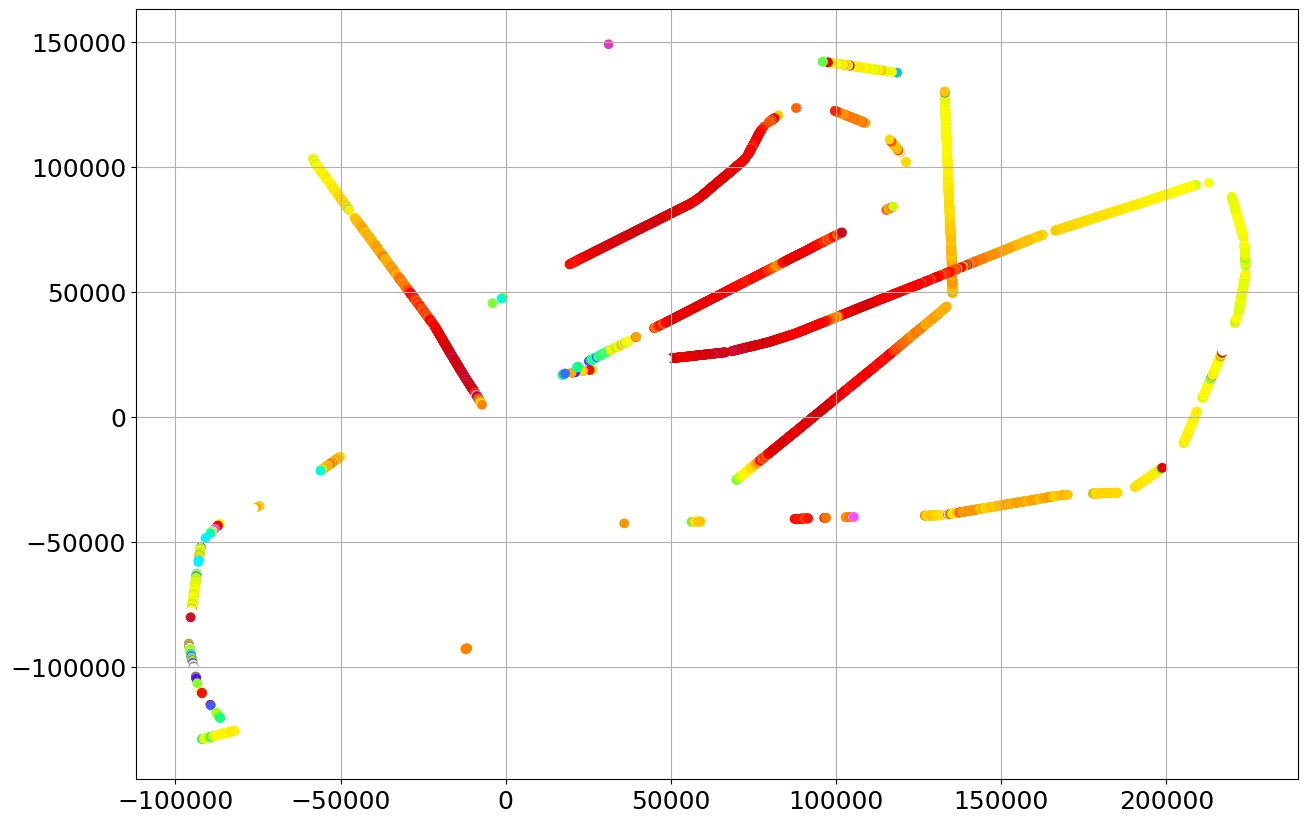

In [29]:
plt.scatter(diwp1.isel(height=34).x, diwp1.isel(height=34).y, c=diwp1.isel(height=34).hws, cmap=cwnd, norm=normalizer)
plt.grid()

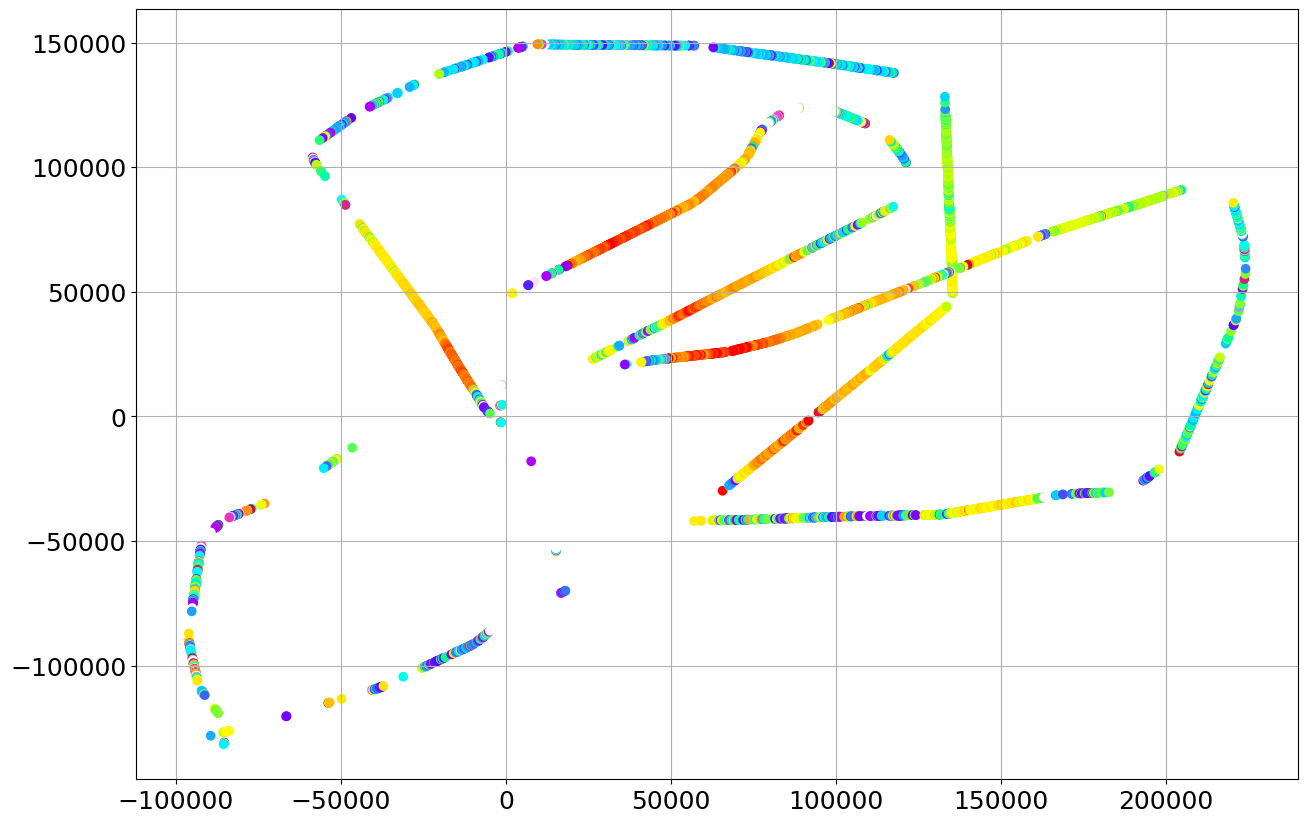

In [30]:
plt.scatter(diwp1.isel(height=5).x, diwp1.isel(height=5).y, c=diwp1.isel(height=5).hws, cmap=cwnd, norm=normalizer)
plt.grid()

z = 990 m


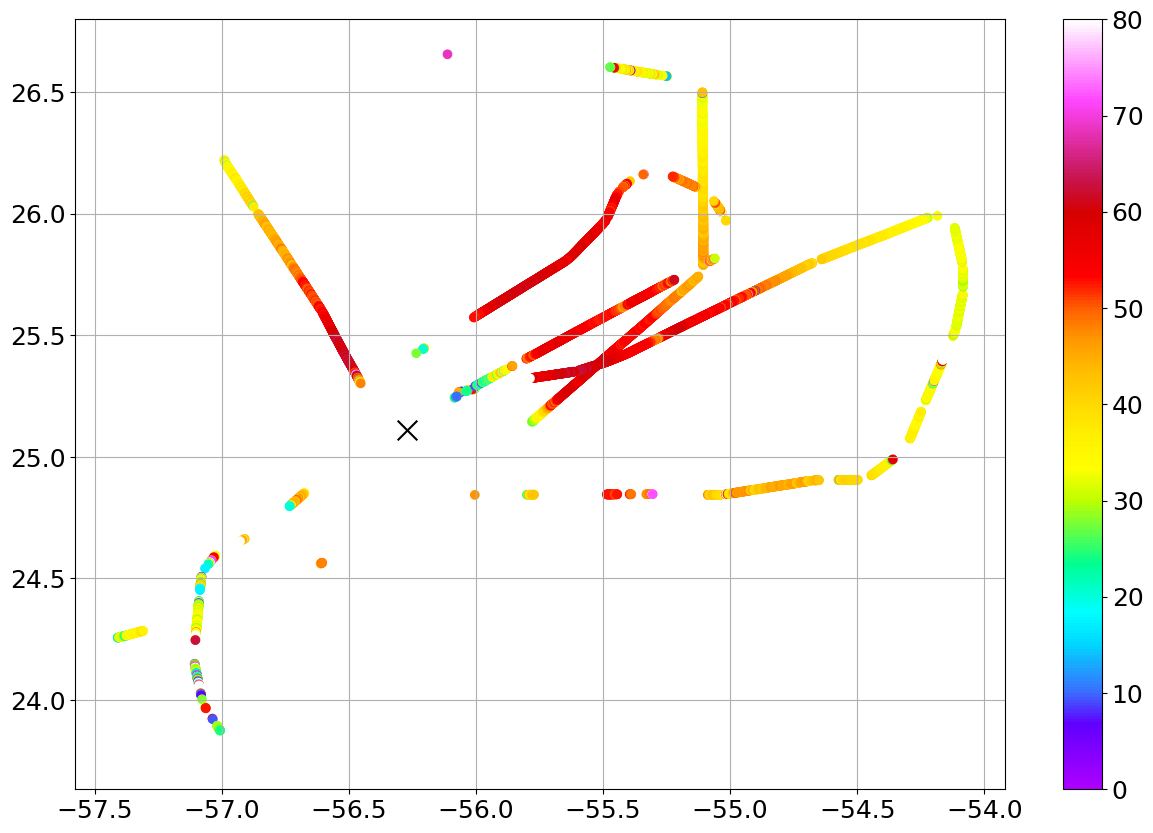

In [31]:
plt.scatter(ds.lon, ds.lat, c='k', marker='x', s=200)
plt.scatter(diwp1.isel(height=34).lon, diwp1.isel(height=34).lat, c=diwp1.isel(height=34).hws, cmap=cwnd, norm=normalizer)
plt.colorbar()
plt.grid()
print('z = {:.0f} m'.format(float(diwp1.isel(height=34).height) * 1000))

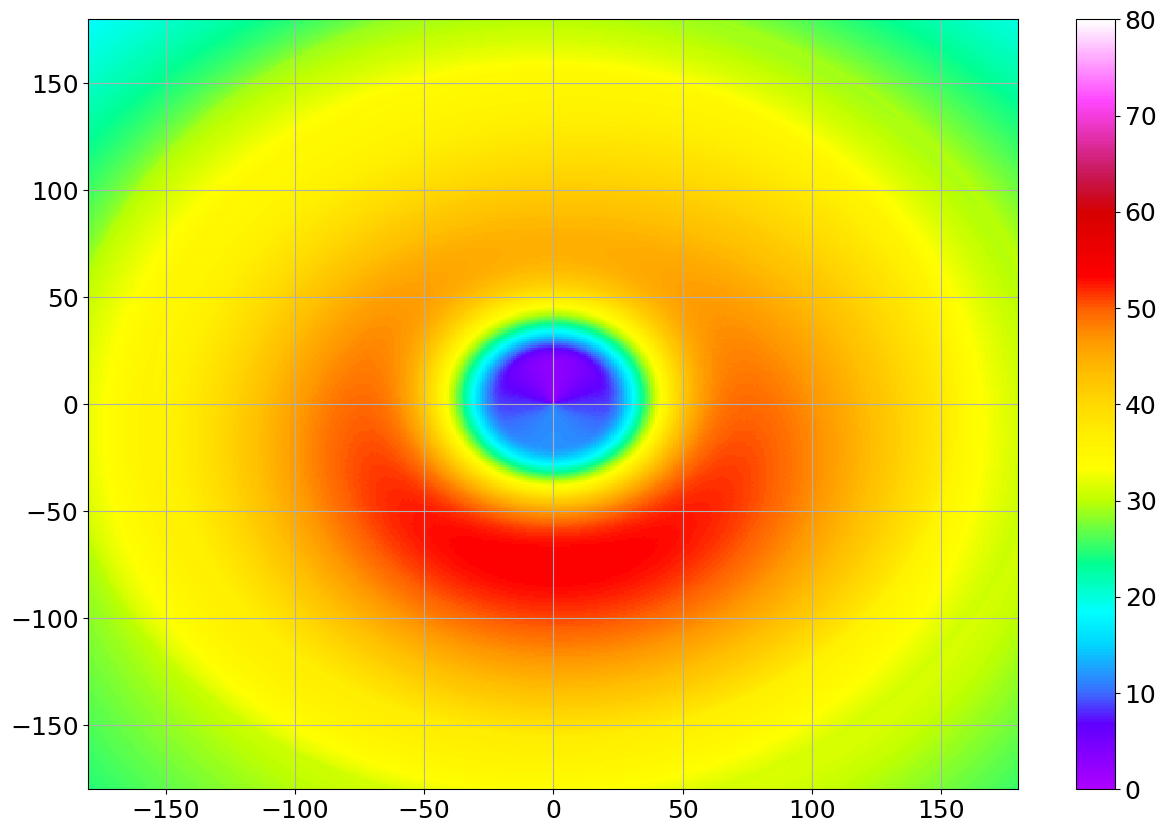

In [32]:
plt.pcolormesh(kep_car20.sel(z=1000).x / 1000, kep_car20.sel(z=1000).y / 1000, kep_car20.sel(z=1000).wind_speed, cmap=cwnd, norm=normalizer)
plt.xlim(-180, 180);plt.ylim(-180, 180)
plt.colorbar()
plt.grid()

z = 300 m


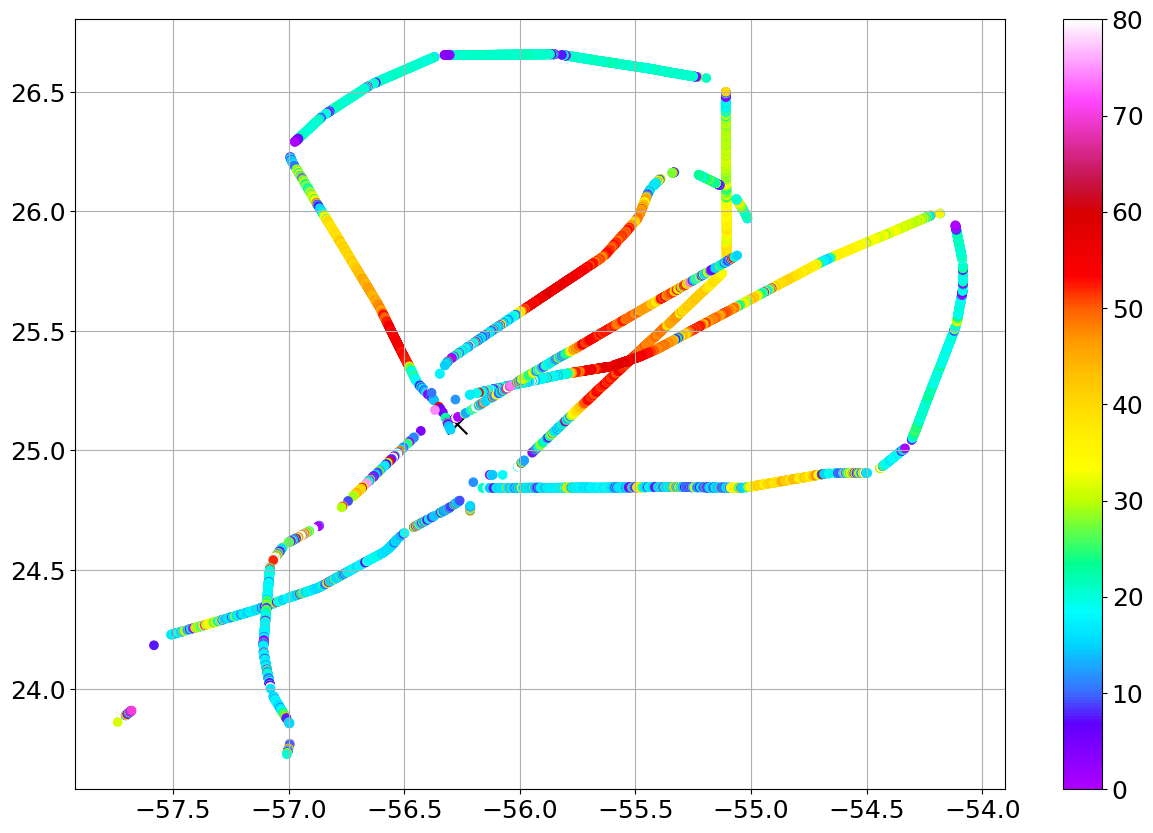

In [33]:
plt.scatter(ds.lon, ds.lat, c='k', marker='x', s=200)
plt.scatter(diwp1.isel(height=11).lon, diwp1.isel(height=11).lat, c=diwp1.isel(height=11).hws, cmap=cwnd, norm=normalizer)
plt.colorbar()
plt.grid()
print('z = {:.0f} m'.format(float(diwp1.isel(height=11).height) * 1000))

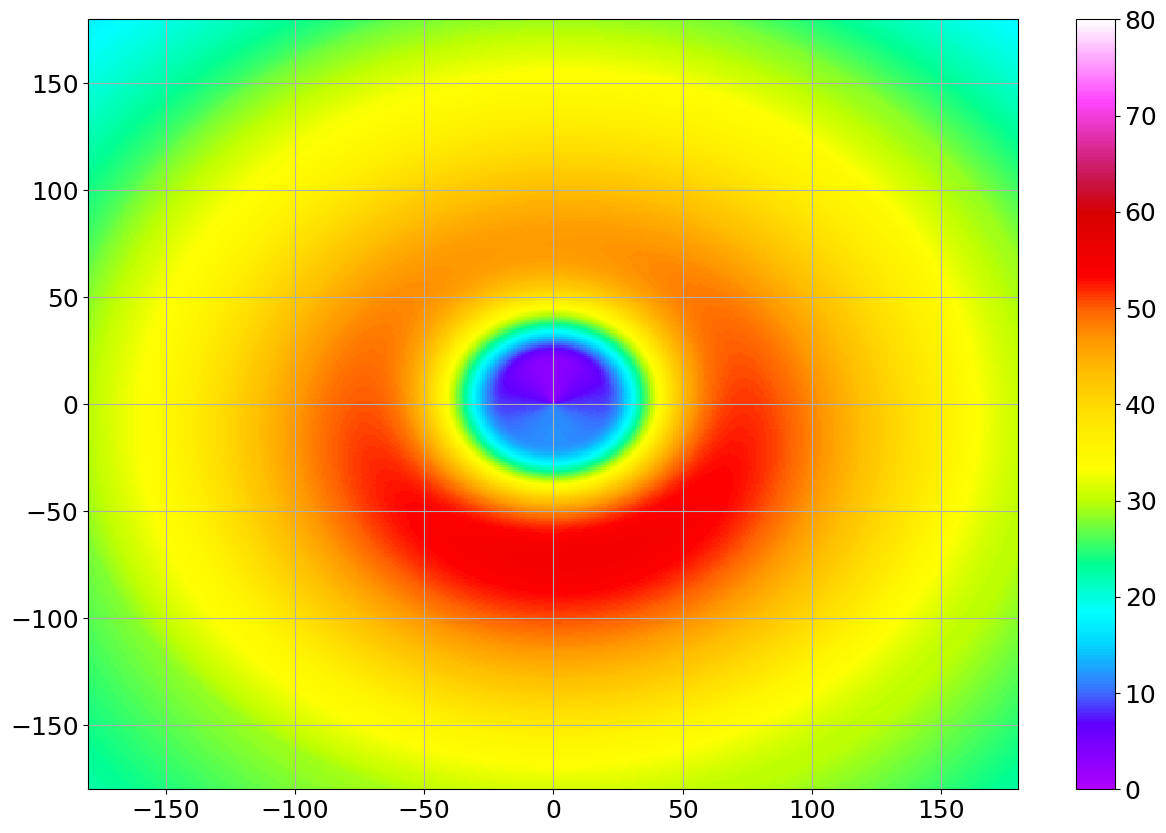

In [34]:
plt.pcolormesh(kep_car20.sel(z=300).x / 1000, kep_car20.sel(z=300).y / 1000, kep_car20.sel(z=300).wind_speed, cmap=cwnd, norm=normalizer)
plt.xlim(-180, 180);plt.ylim(-180, 180)
plt.colorbar()
plt.grid()

z = 90 m


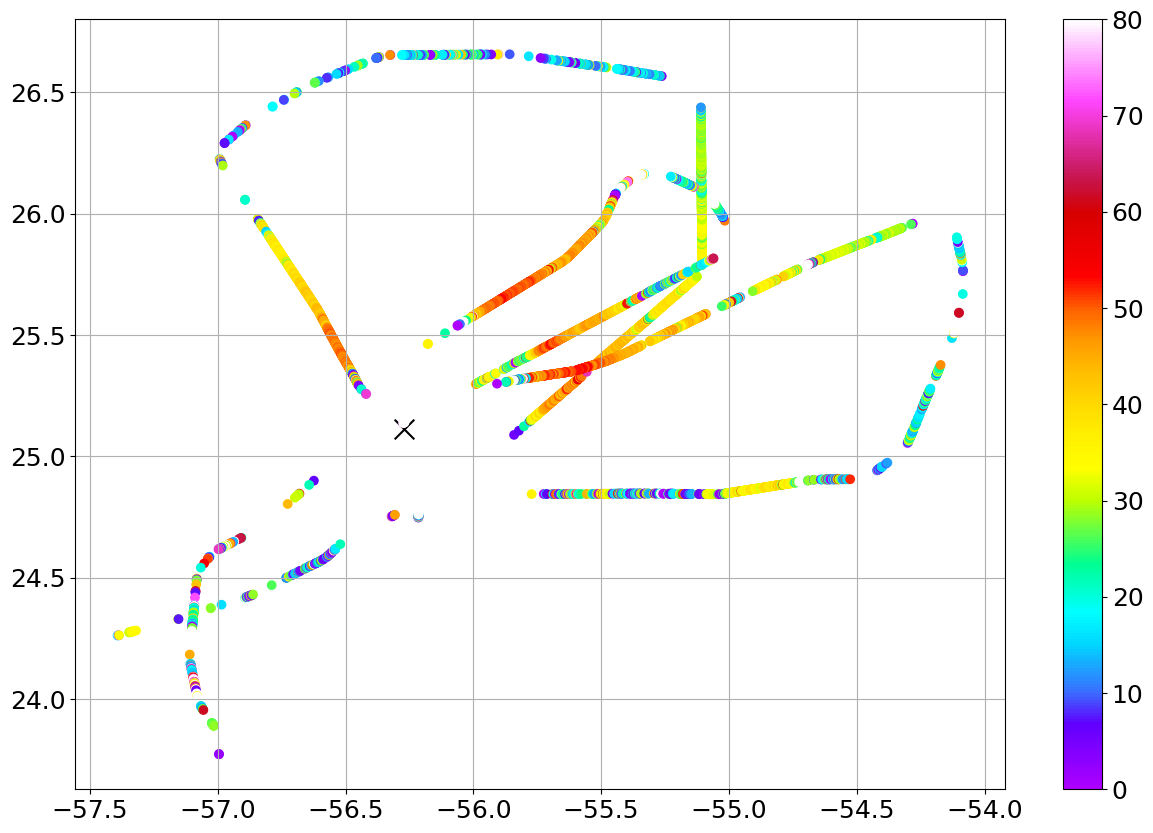

In [35]:
plt.scatter(ds.lon, ds.lat, c='k', marker='x', s=200)
plt.scatter(diwp1.isel(height=4).lon, diwp1.isel(height=4).lat, c=diwp1.isel(height=4).hws, cmap=cwnd, norm=normalizer)
plt.colorbar()
plt.grid()
print('z = {:.0f} m'.format(float(diwp1.isel(height=4).height) * 1000))

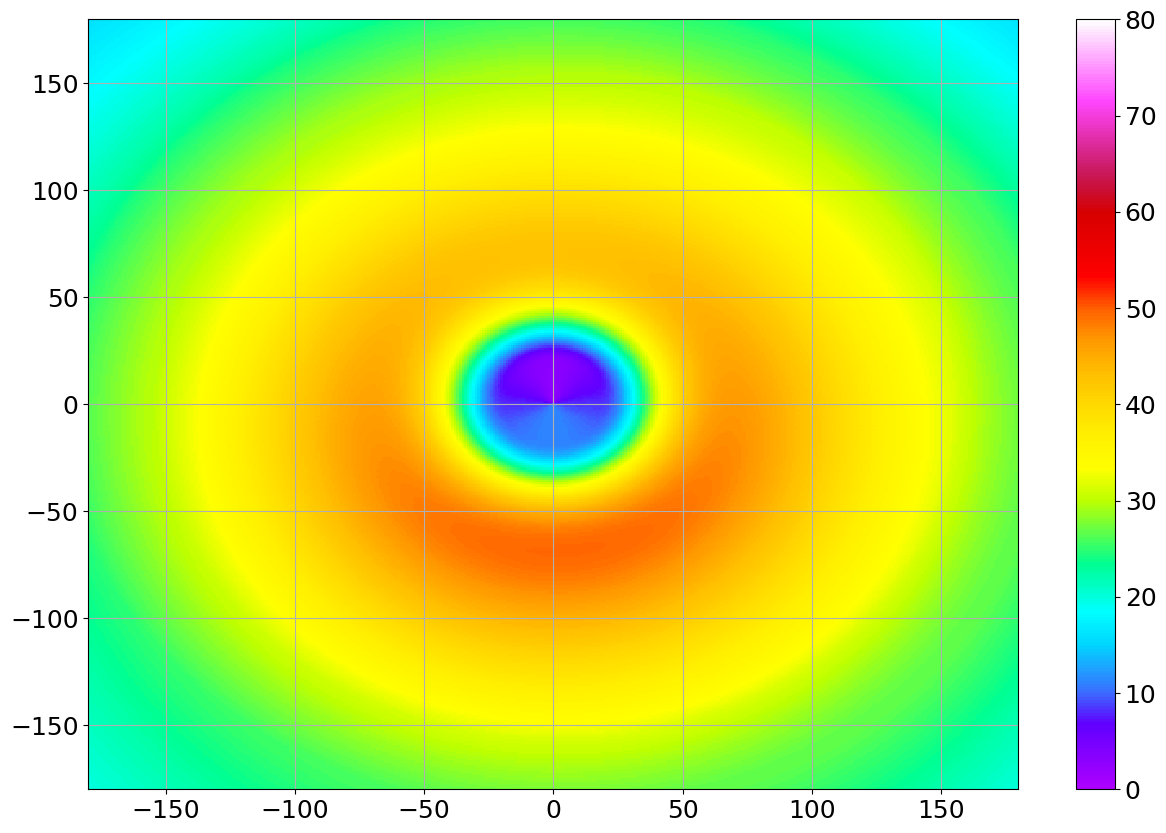

In [36]:
plt.pcolormesh(kep_car20.sel(z=100).x / 1000, kep_car20.sel(z=100).y / 1000, kep_car20.sel(z=100).wind_speed, cmap=cwnd, norm=normalizer)
plt.xlim(-180, 180);plt.ylim(-180, 180)
plt.colorbar()
plt.grid()

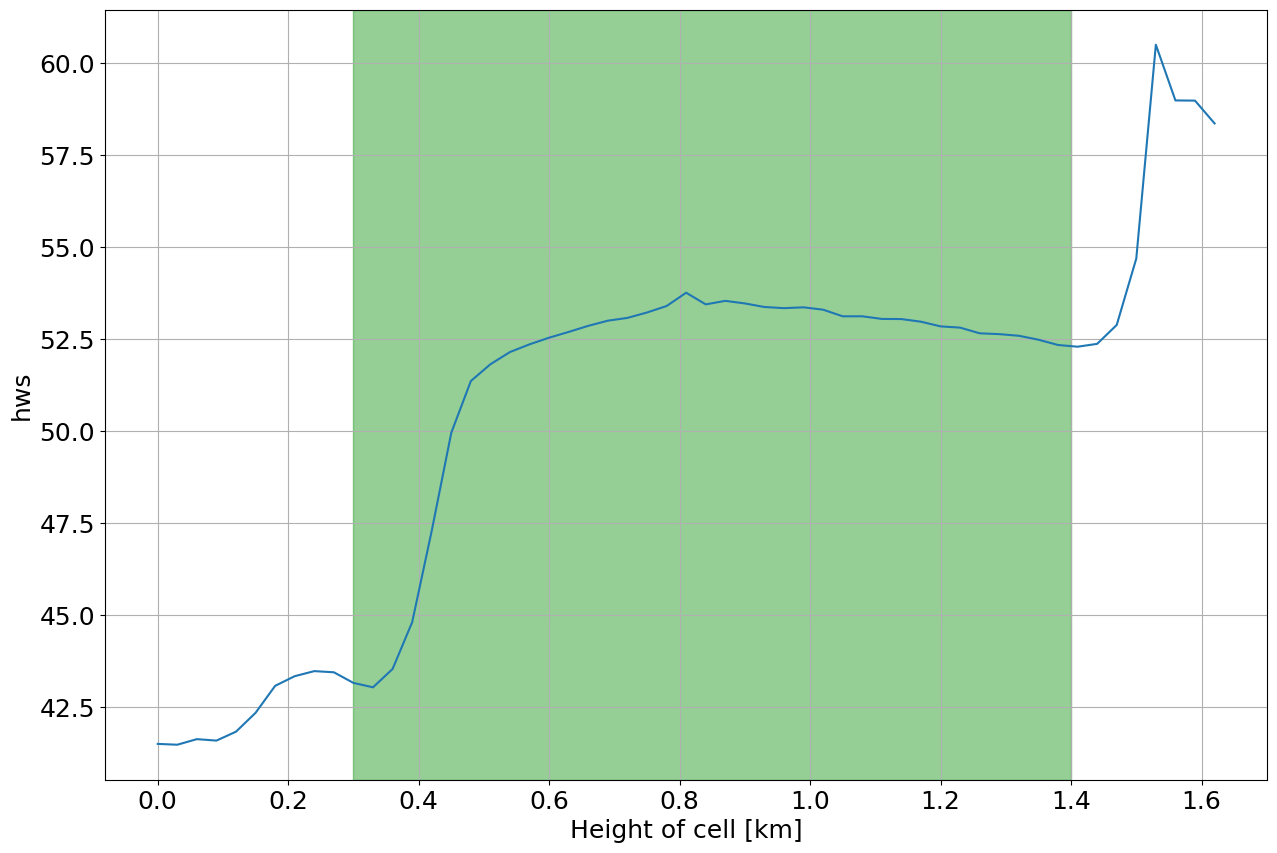

In [37]:
# Probably valid only between 500m and 1.4km where I have most data
diwp1_rgt = diwp1.where((diwp1.lat >= 25) & (diwp1.lat <= 26) & (diwp1.lon >= -56) & (diwp1.lon <= -55)) # right quadrant
diwp1_rgt.hws.mean(dim='bin', skipna=True).plot()
plt.axvspan(0.3, 1.4, alpha=0.5, color='tab:green')
plt.grid()

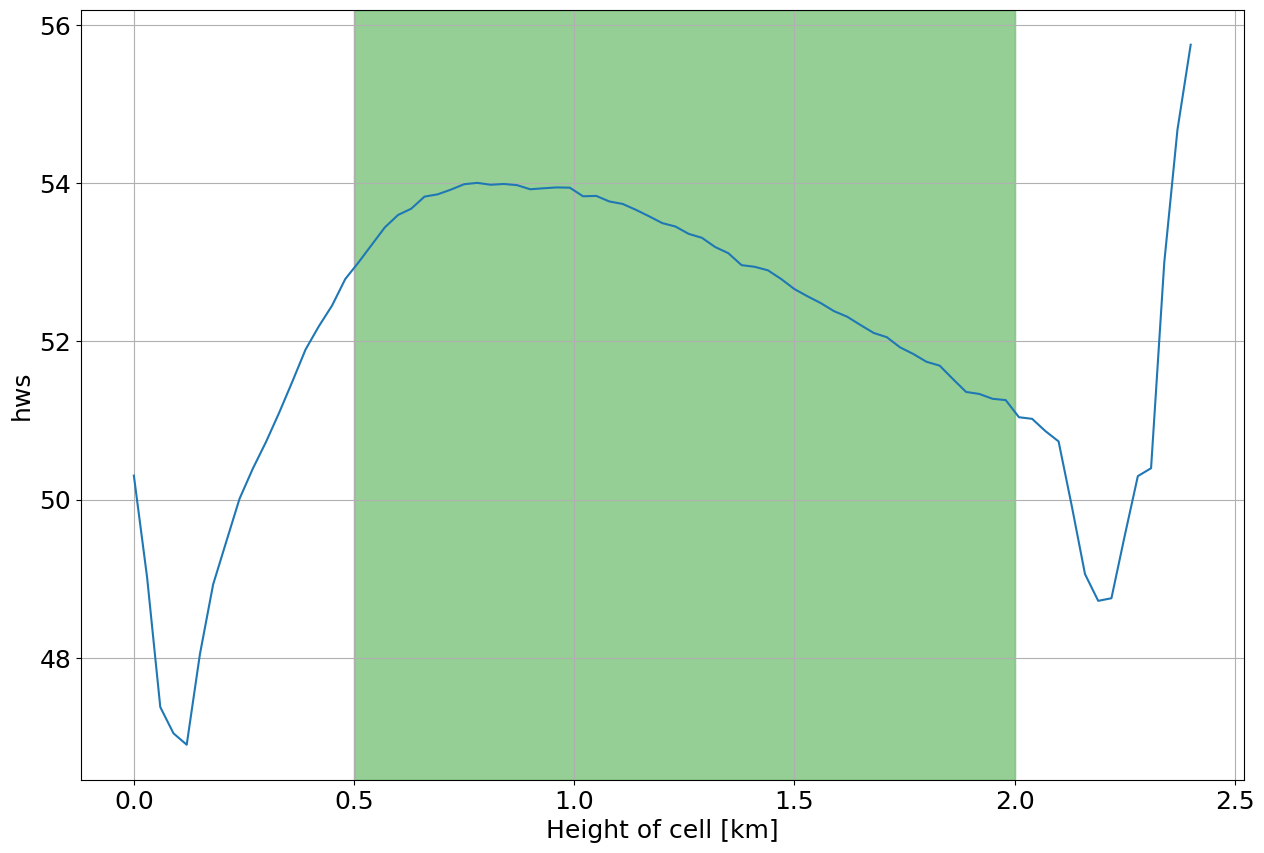

In [38]:
# Probably valid only between 500m and 1.4km where I have most data
diwp2_rgt = diwp2.where((diwp2.lat >= 25) & (diwp2.lat <= 26) & (diwp2.lon >= -56) & (diwp2.lon <= -55)) # right quadrant
diwp2_rgt.hws.mean(dim='bin', skipna=True).plot()
plt.axvspan(0.5, 2, alpha=0.5, color='tab:green')
plt.grid()

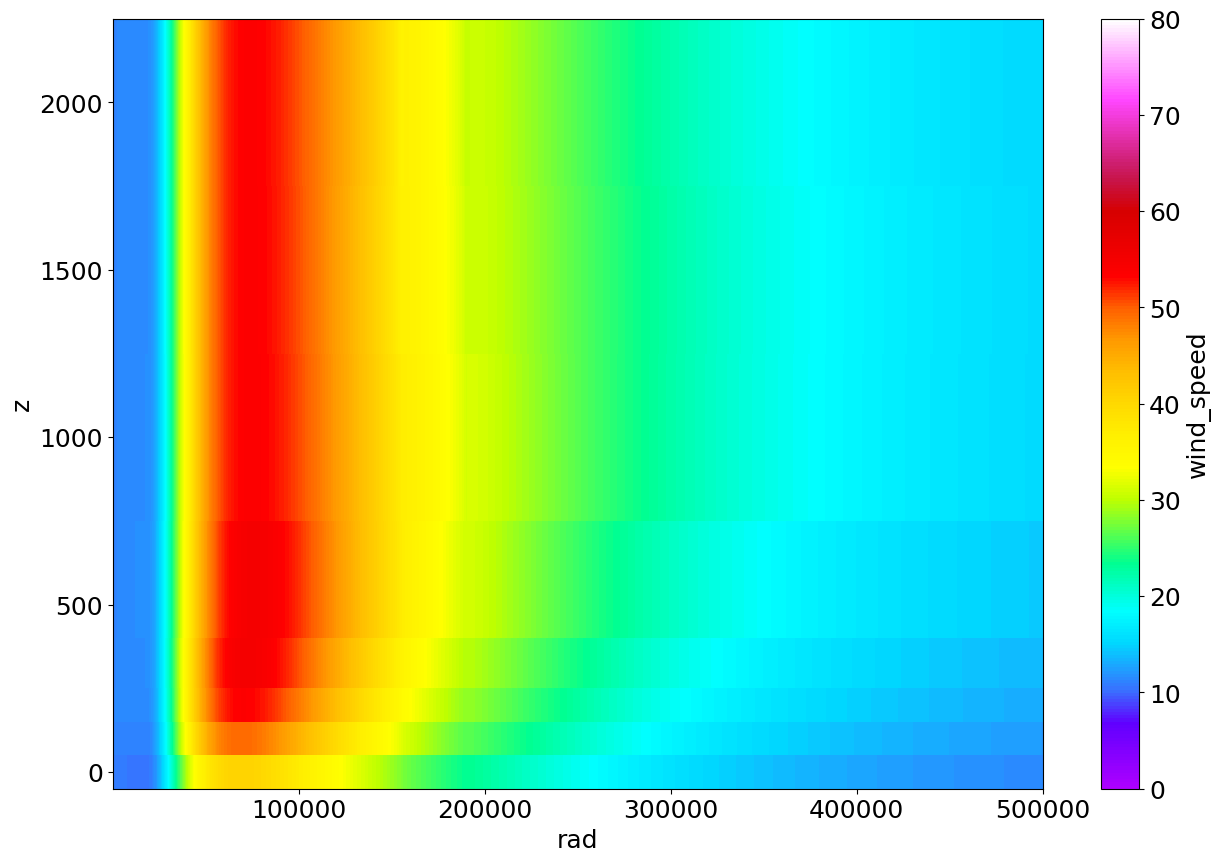

In [39]:
kep_pol20.sel(theta=slice(250, 300)).wind_speed.mean(dim='theta').plot(cmap=cwnd, norm=normalizer)

z = 90 m


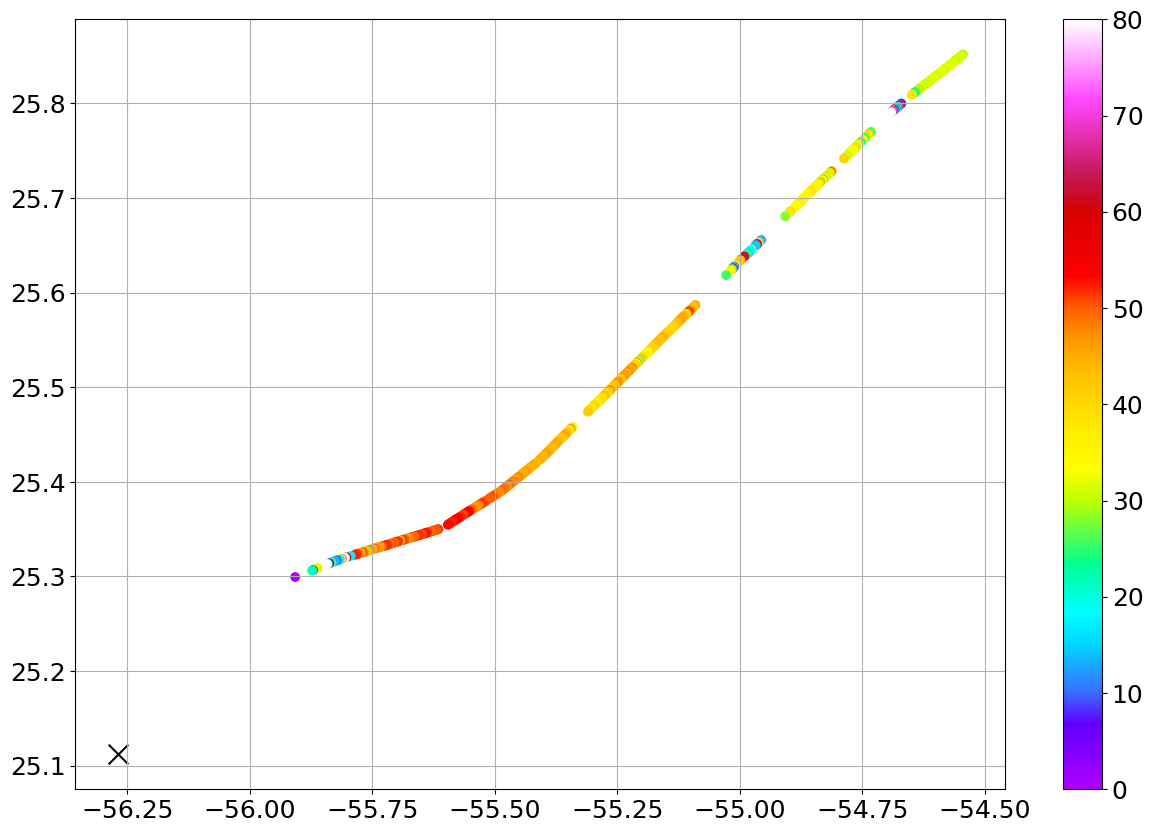

In [40]:
i1 = 7000
i2 = 8000
plt.scatter(ds.lon, ds.lat, c='k', marker='x', s=200)
plt.scatter(diwp1.isel(height=4).isel(bin=slice(i1, i2)).lon, diwp1.isel(height=4).isel(bin=slice(i1, i2)).lat, c=diwp1.isel(height=4).isel(bin=slice(i1, i2)).hws, cmap=cwnd, norm=normalizer)
plt.colorbar()
plt.grid()
print('z = {:.0f} m'.format(float(diwp1.isel(height=4).height) * 1000))

In [41]:
diwp1sel = diwp1.isel(bin=slice(i1, i2))

(-0.1, 1.6)

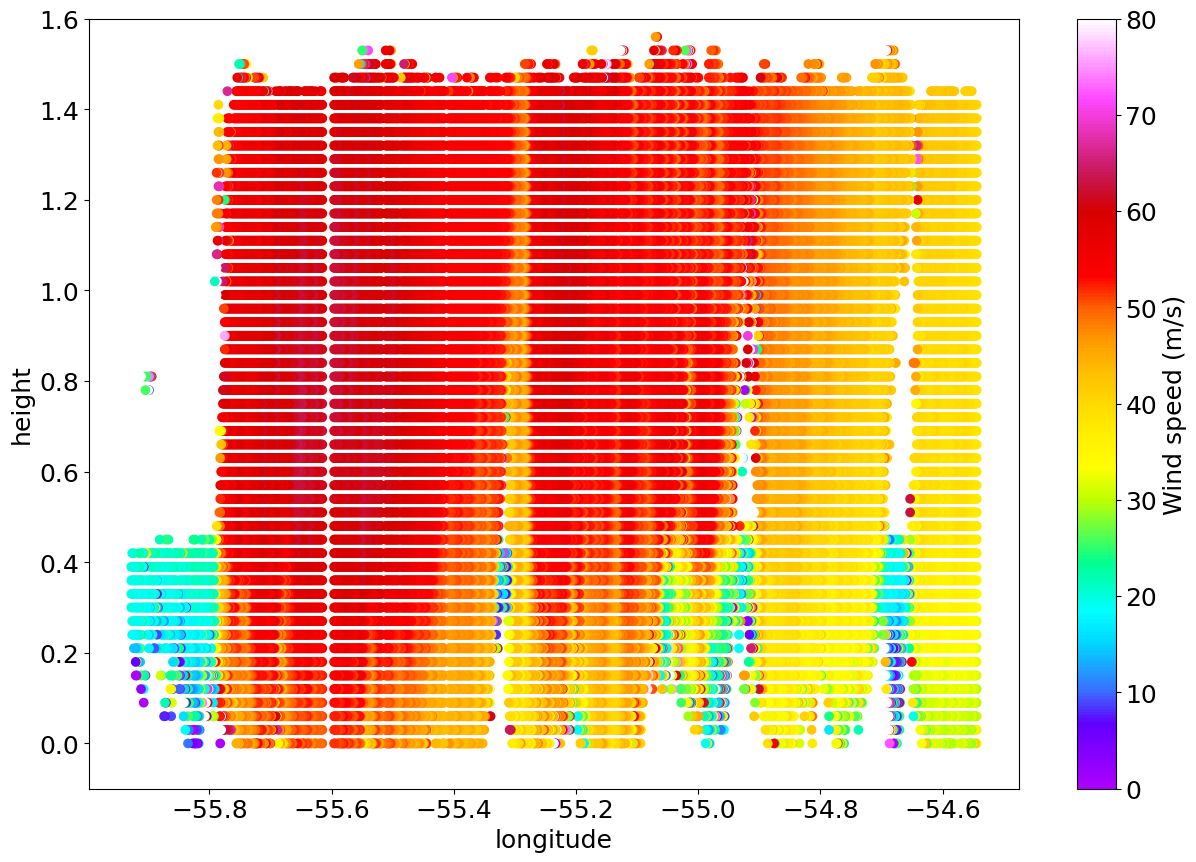

In [42]:
BINS, HGTS = np.meshgrid(diwp1sel.height, diwp1sel.lon)

im = plt.scatter(HGTS, BINS,  c=diwp1sel.hws, cmap=cwnd, norm=normalizer)

plt.xlabel('longitude')
plt.ylabel('height')

cbar    = plt.colorbar(im, orientation='vertical')
cbar.set_label(r'Wind speed (m/s)')

plt.ylim(-0.1, 1.6)

(-100.0, 1600.0)

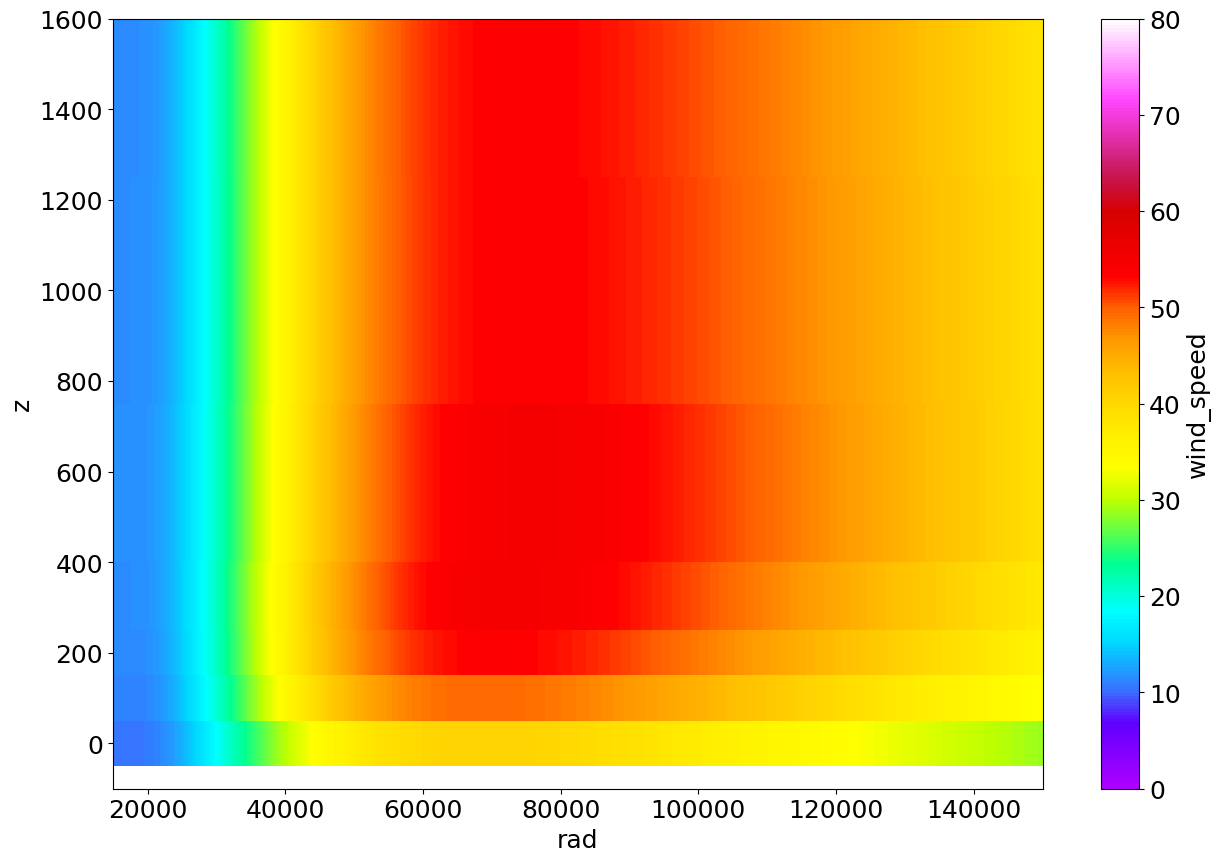

In [43]:
kep_pol20.sel(rad=slice(15000, 150000), theta=slice(250, 300)).mean(dim='theta').wind_speed.plot(cmap=cwnd, norm=normalizer)

plt.ylim(-100, 1600)

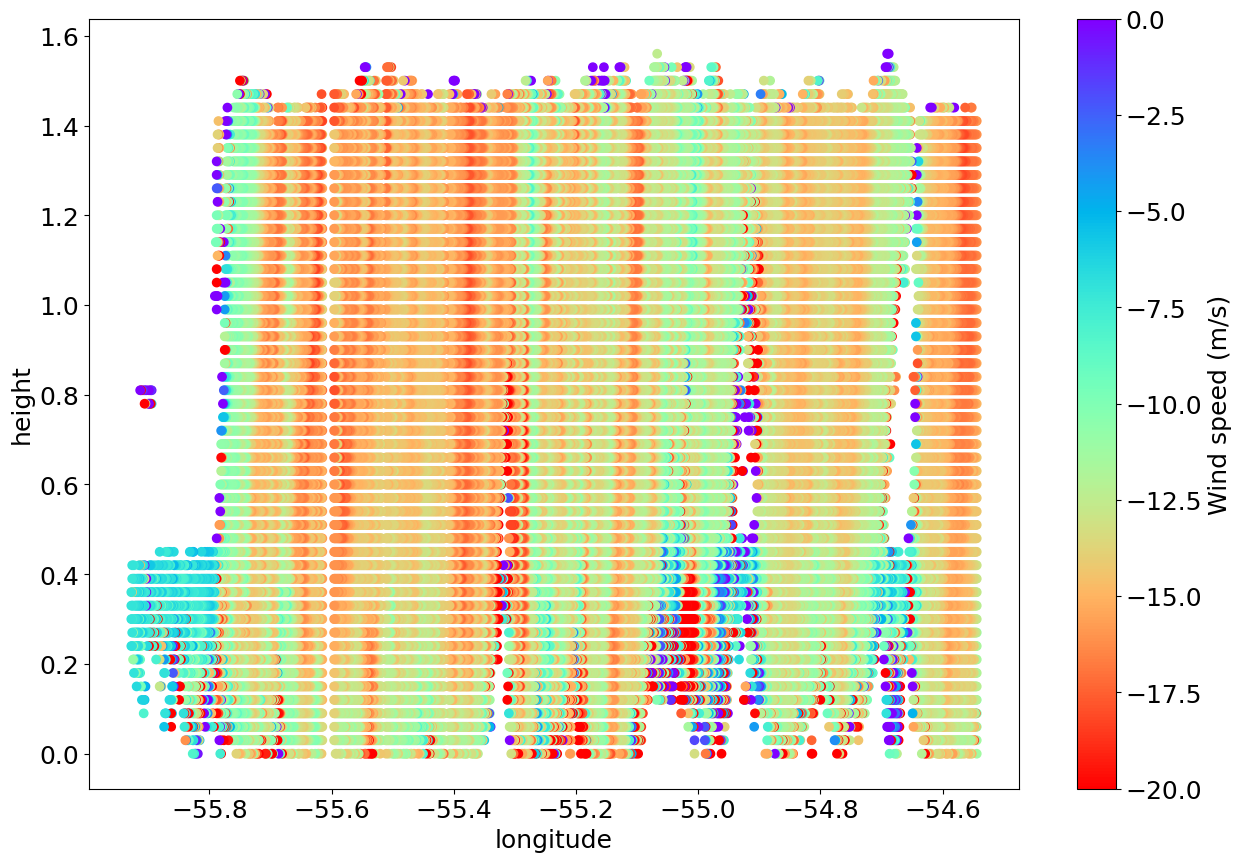

In [44]:
BINS, HGTS = np.meshgrid(diwp1sel.height, diwp1sel.lon)

im = plt.scatter(HGTS, BINS,  c=diwp1sel.w, cmap='rainbow_r', vmin=-20, vmax=0)

plt.xlabel('longitude')
plt.ylabel('height')

cbar    = plt.colorbar(im, orientation='vertical')
cbar.set_label(r'Wind speed (m/s)')

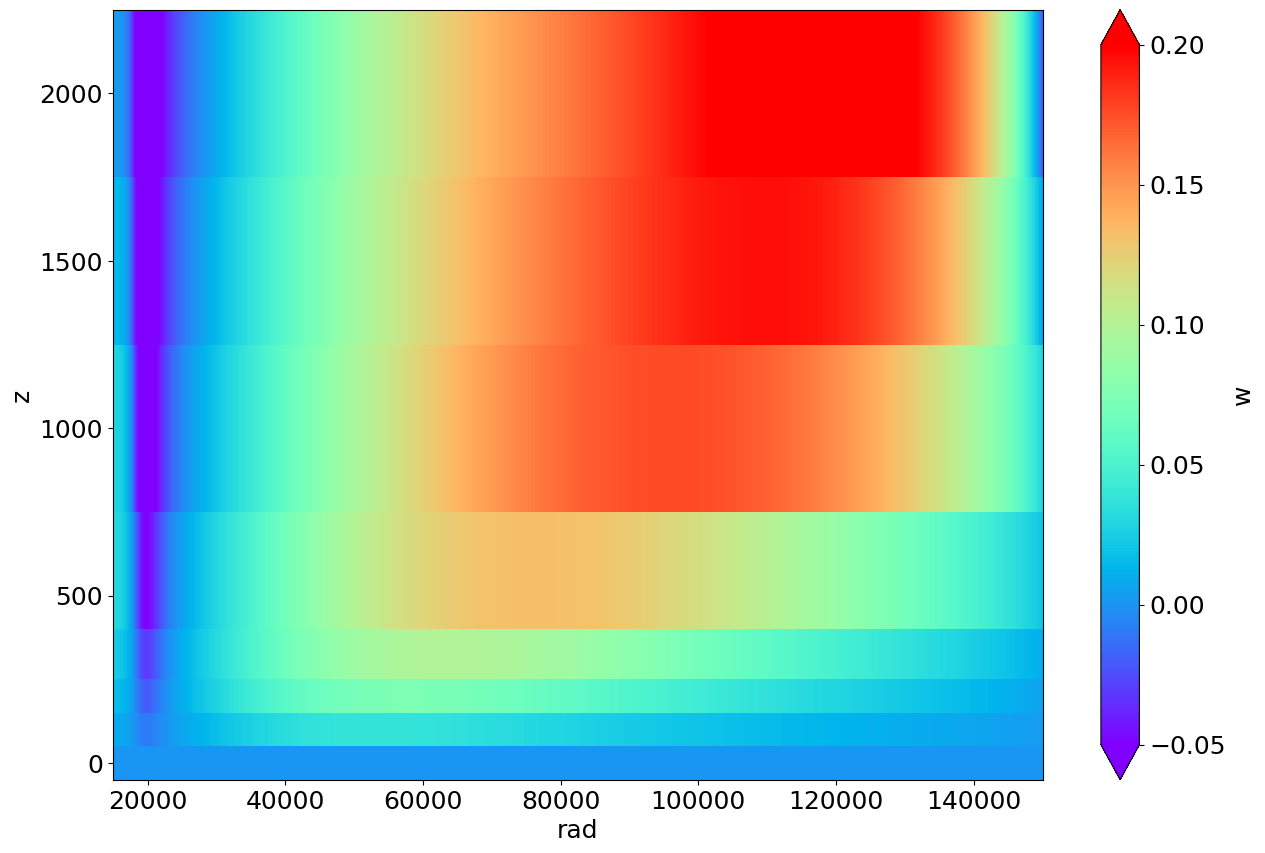

In [45]:
kep_pol20.sel(rad=slice(15000, 150000), theta=slice(250, 300)).mean(dim='theta').w.plot(cmap='rainbow', vmin=-0.05, vmax=0.2)

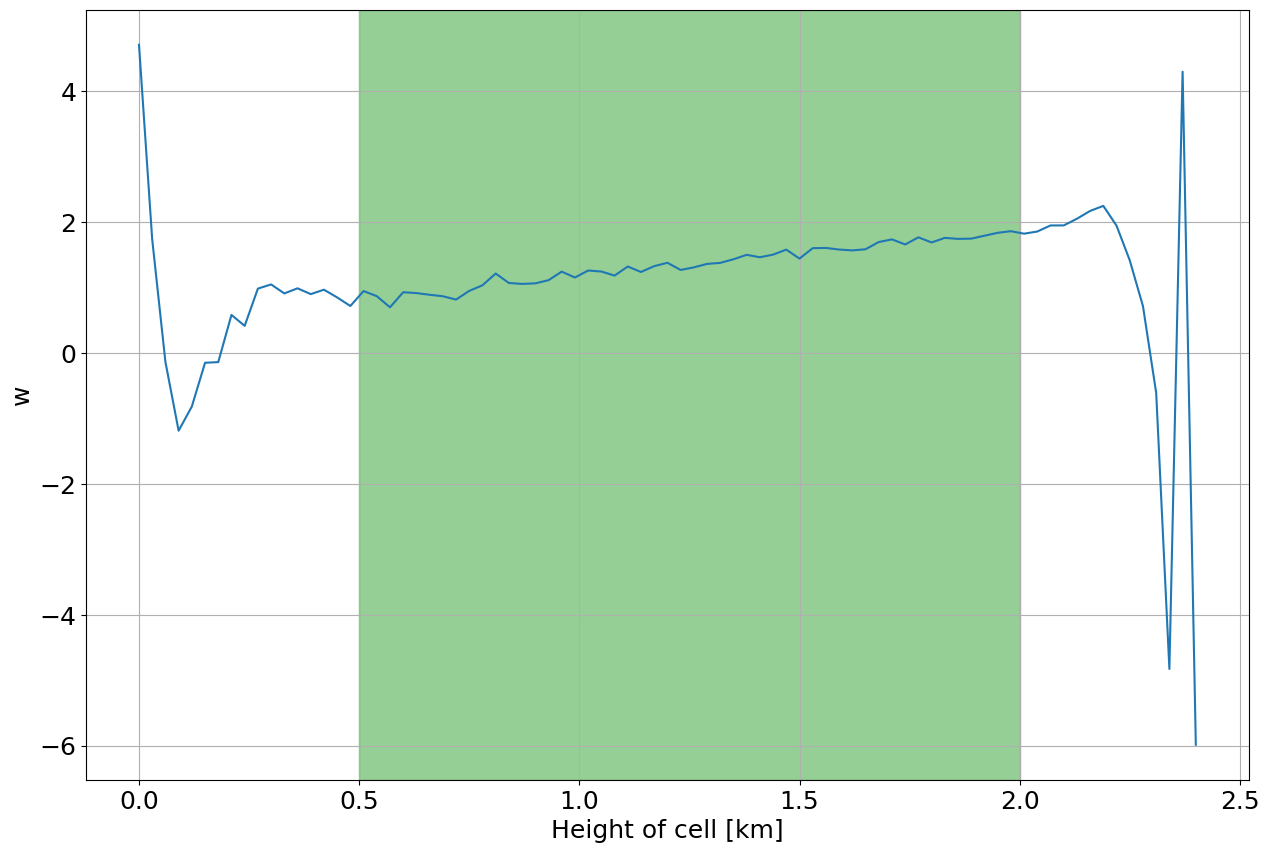

In [46]:
# Probably valid only between 500m and 1.4km where I have most data
diwp3_rgt = diwp3.where((diwp2.lat >= 25) & (diwp3.lat <= 26) & (diwp3.lon >= -56) & (diwp3.lon <= -55)) # right quadrant
diwp3_rgt.w.mean(dim='bin', skipna=True).plot()
plt.axvspan(0.5, 2, alpha=0.5, color='tab:green')
plt.grid()

(-5.0, 5.0)

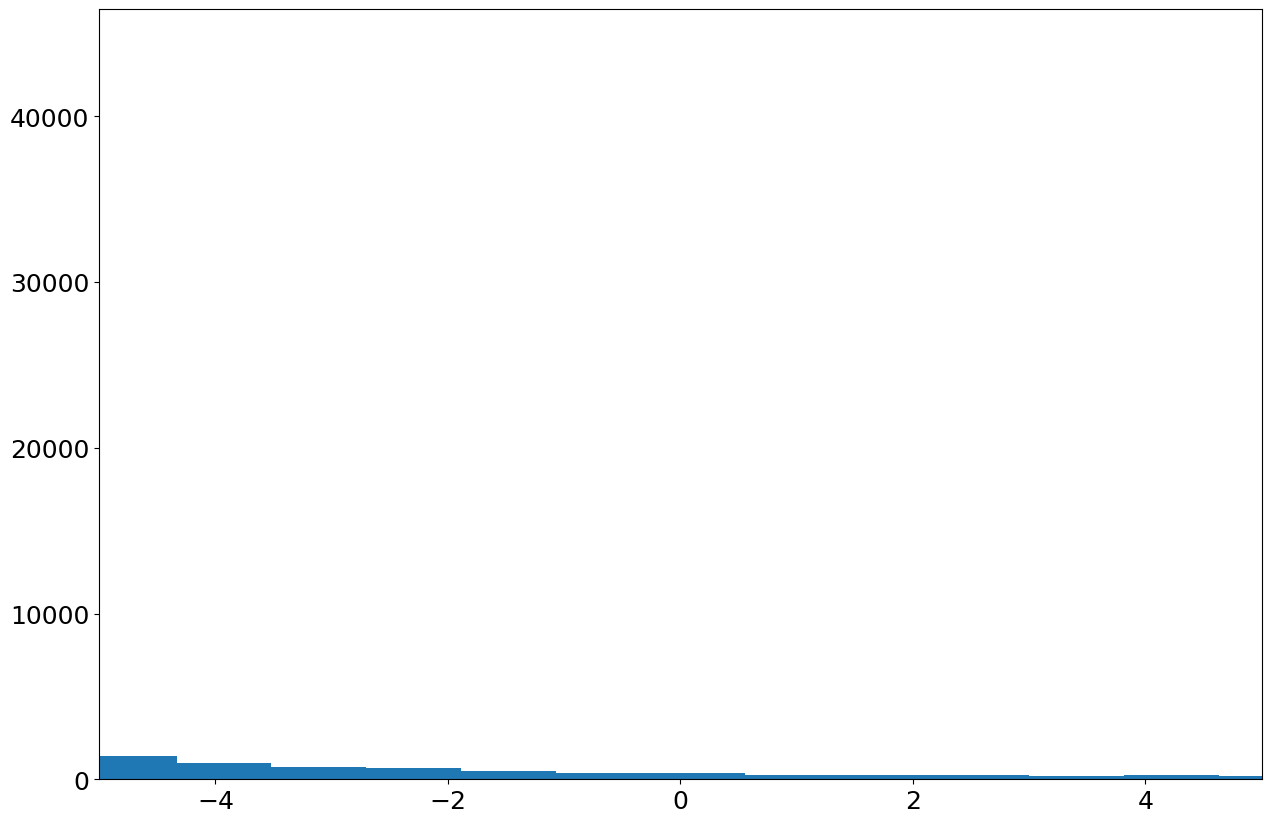

In [49]:
plt.hist(np.array(diwp1.w).flatten(), bins=300)
plt.xlim(-5, 5)

(array([ 46959.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

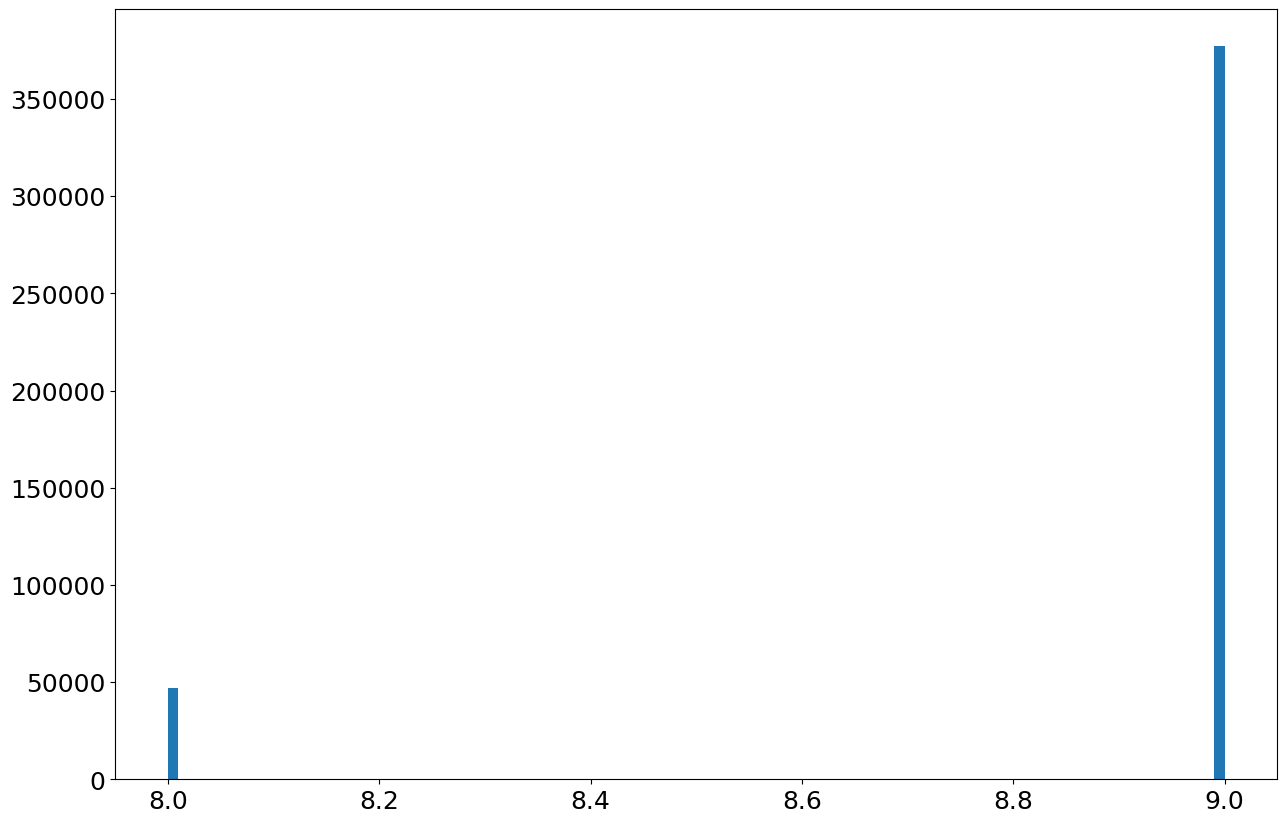

In [50]:
plt.hist(np.array(diwp3.quality).flatten(), bins=100)

In [51]:
np.count_nonzero(~np.isnan(diwp1.w))

287987

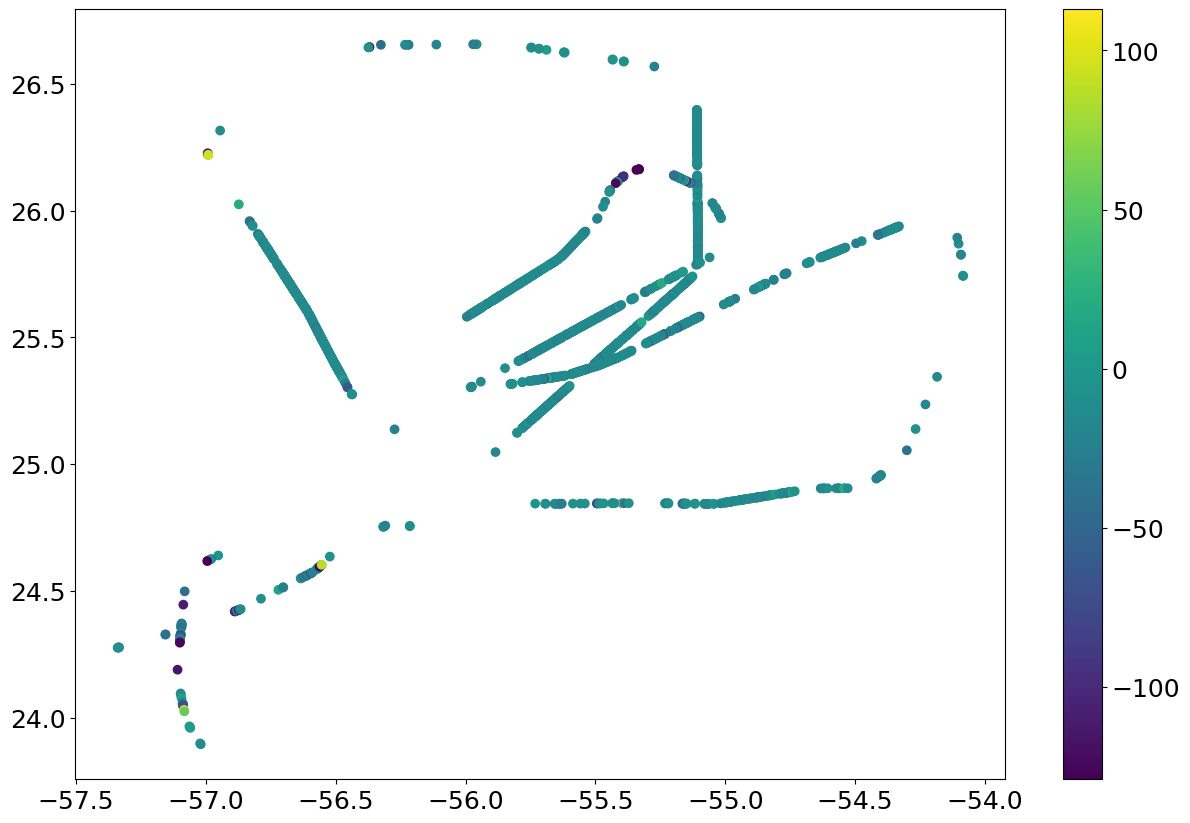

In [52]:
plt.scatter(diwp1.isel(height=1).lon, diwp1.isel(height=1).lat, c=diwp1.isel(height=1).w)
plt.colorbar()

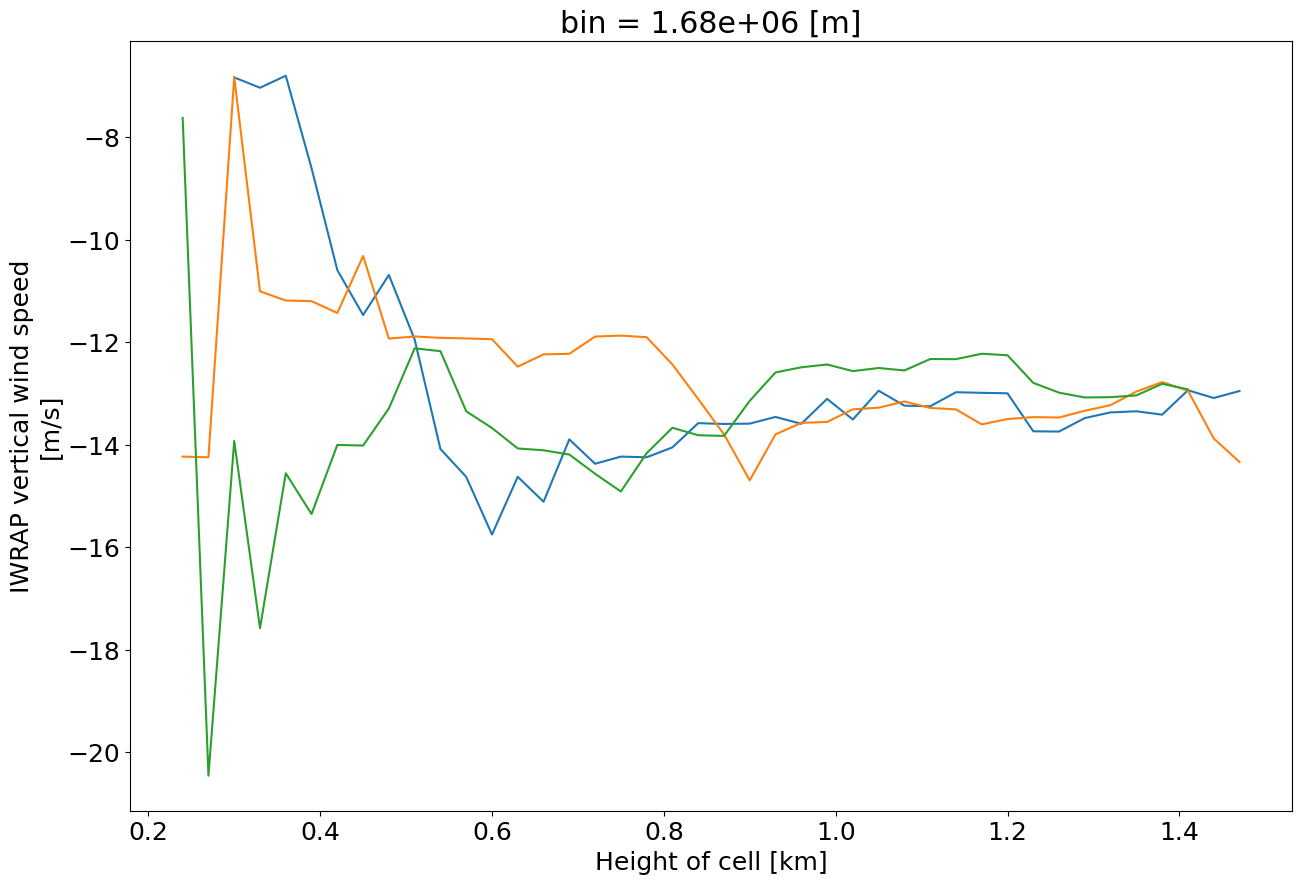

In [53]:
diwp1.isel(bin=4000).w.plot()
diwp1.isel(bin=4010).w.plot()
diwp1.isel(bin=4020).w.plot()

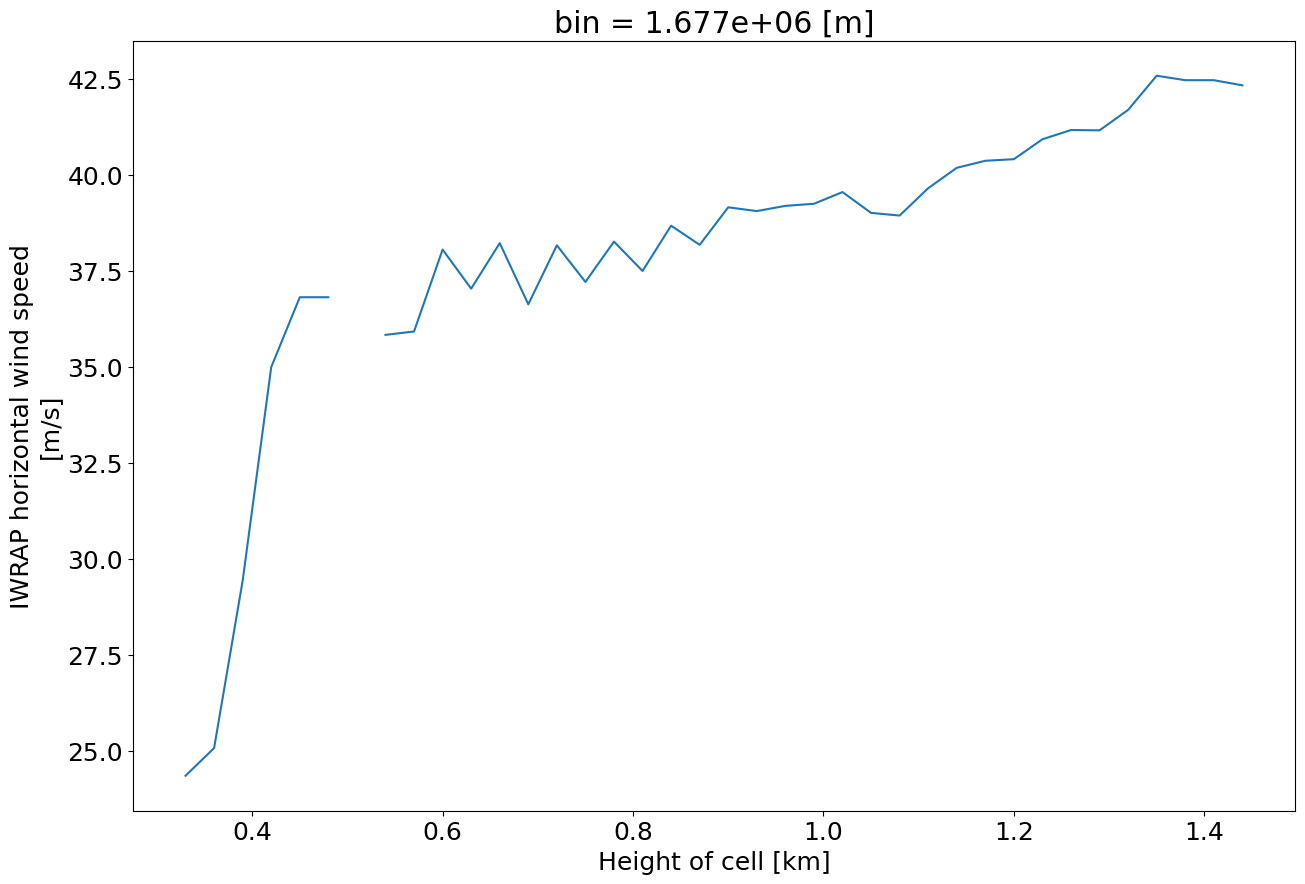

In [54]:
diwp1.isel(bin=4000).hws.plot()

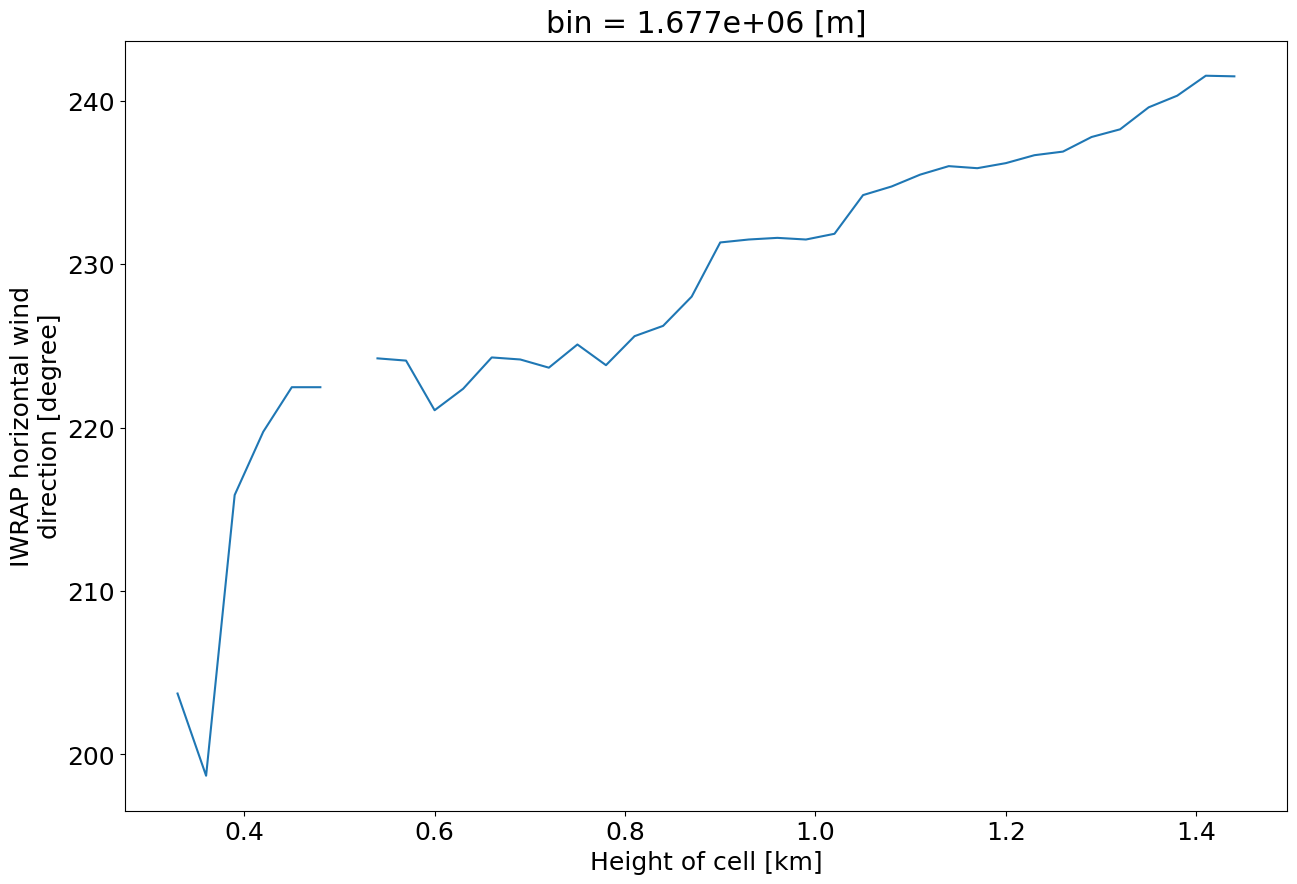

In [55]:
diwp1.isel(bin=4000).hwdir.plot()

In [56]:
diwp3.bin

<xarray.DataArray 'bin' (bin: 11352)> Size: 91kB
array([1009350., 1009500., 1009650., ..., 2991300., 2991450., 2991600.],
      shape=(11352,))
Coordinates:
  * bin      (bin) float64 91kB 1.009e+06 1.01e+06 ... 2.991e+06 2.992e+06
Attributes:
    long_name:    Center of cell in alongtrack distance traveled
    units:        m
    valid_range:  [                  0 9223372036854775807]

### EarthCARE

In [151]:
p  = '/home/arthur/data/earthCARE/samples/JAXA_L1B_vCa/case_corr_xCa/data/corr_xCa/ECA_J_CPR_NOM_1BS_20241010T0508_20241010T0520_02089B_vCa_corr_xCa.nc'
ec = xr.open_dataset(p)

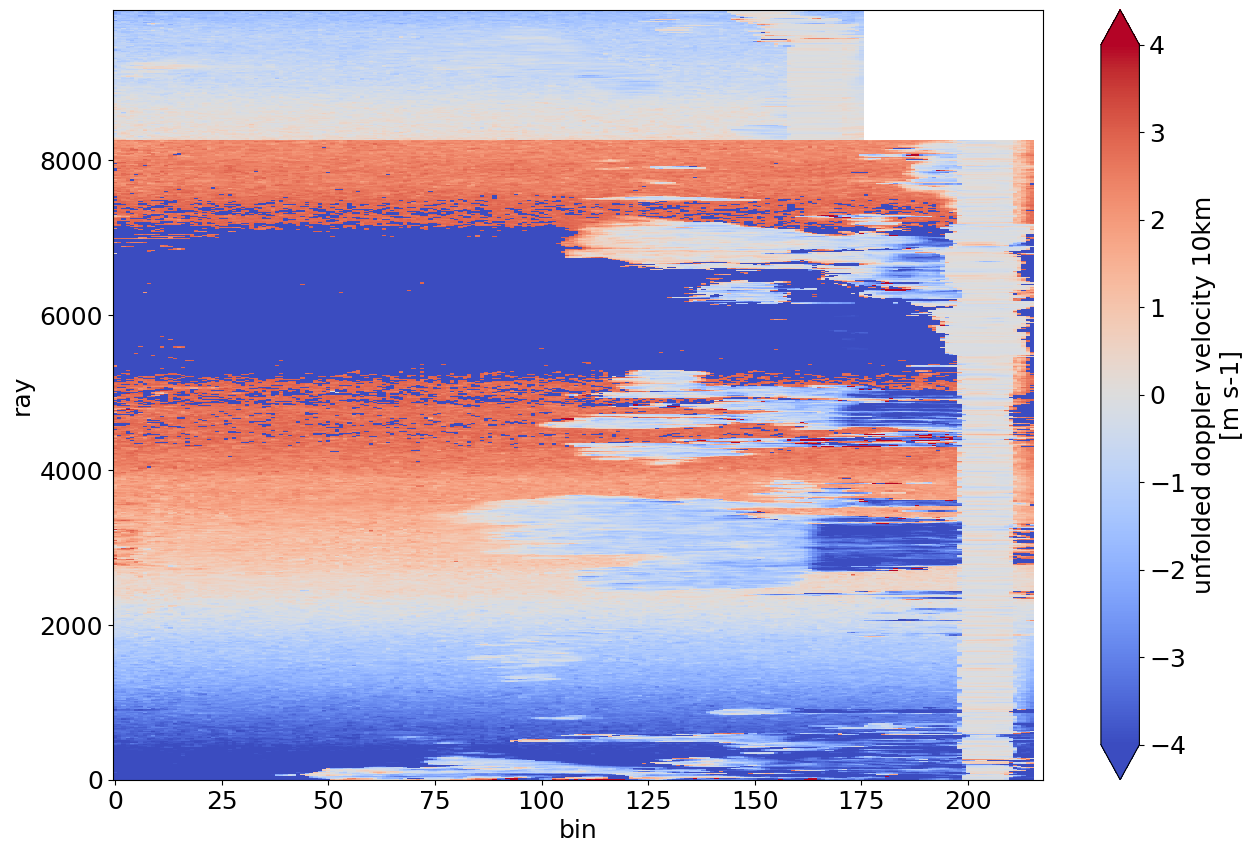

In [152]:
ec.doppler_velocity_unfolded_10km.plot(cmap='coolwarm', vmin=-4, vmax=4)

In [153]:
ec_avg = ec.isel(ray=slice(None, 30)).mean(dim='ray')

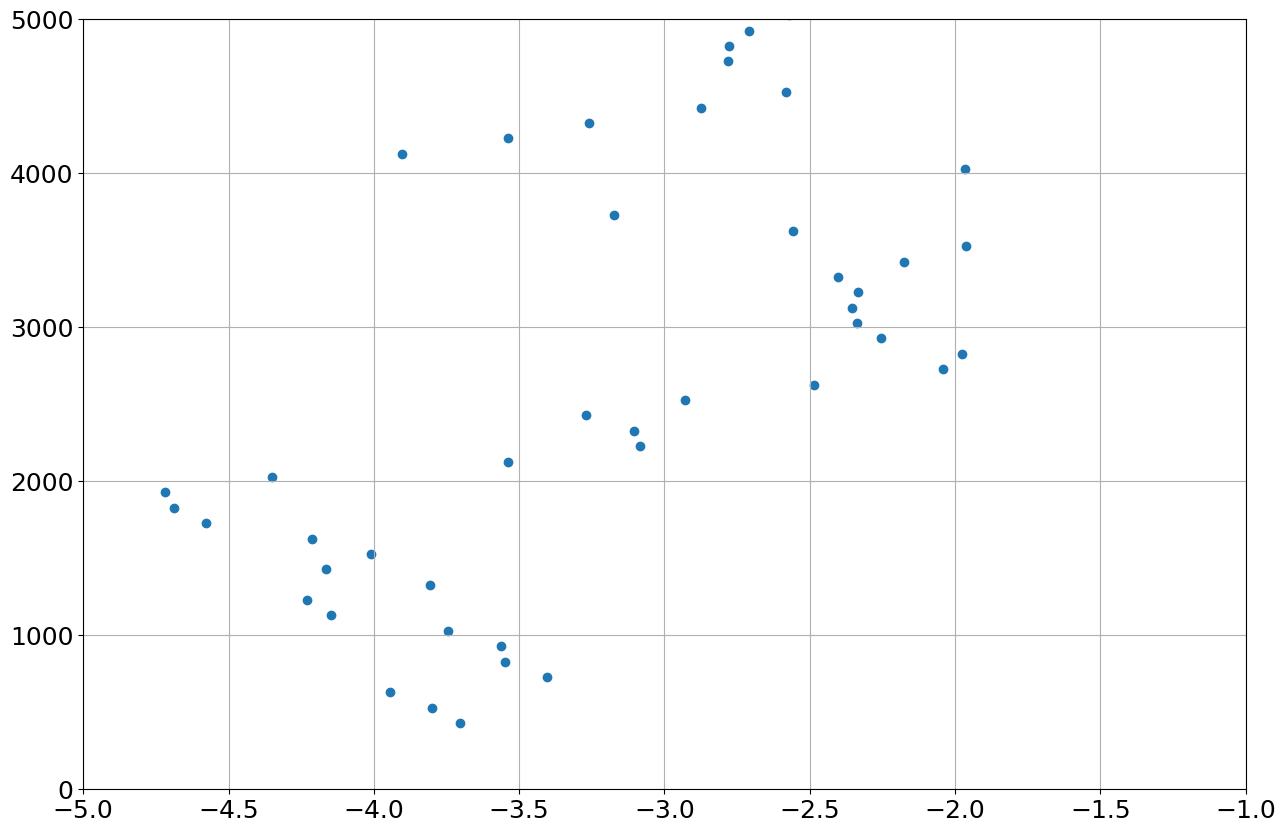

In [154]:
plt.scatter(ec_avg.doppler_velocity_unfolded_10km, ec_avg.height)
plt.ylim(0, 5000)
plt.xlim(-5, -1)
plt.grid()

([<matplotlib.axis.YTick at 0x72dcbacbc550>,
 [Text(0, 0, '20215.465'),
  Text(0, 20, '18216.848'),
  Text(0, 40, '16218.231'),
  Text(0, 60, '14219.615'),
  Text(0, 80, '12220.999'),
  Text(0, 100, '10222.382'),
  Text(0, 120, '8223.766'),
  Text(0, 140, '6225.15'),
  Text(0, 160, '4226.533'),
  Text(0, 180, '2227.917'),
  Text(0, 200, '229.30069')])

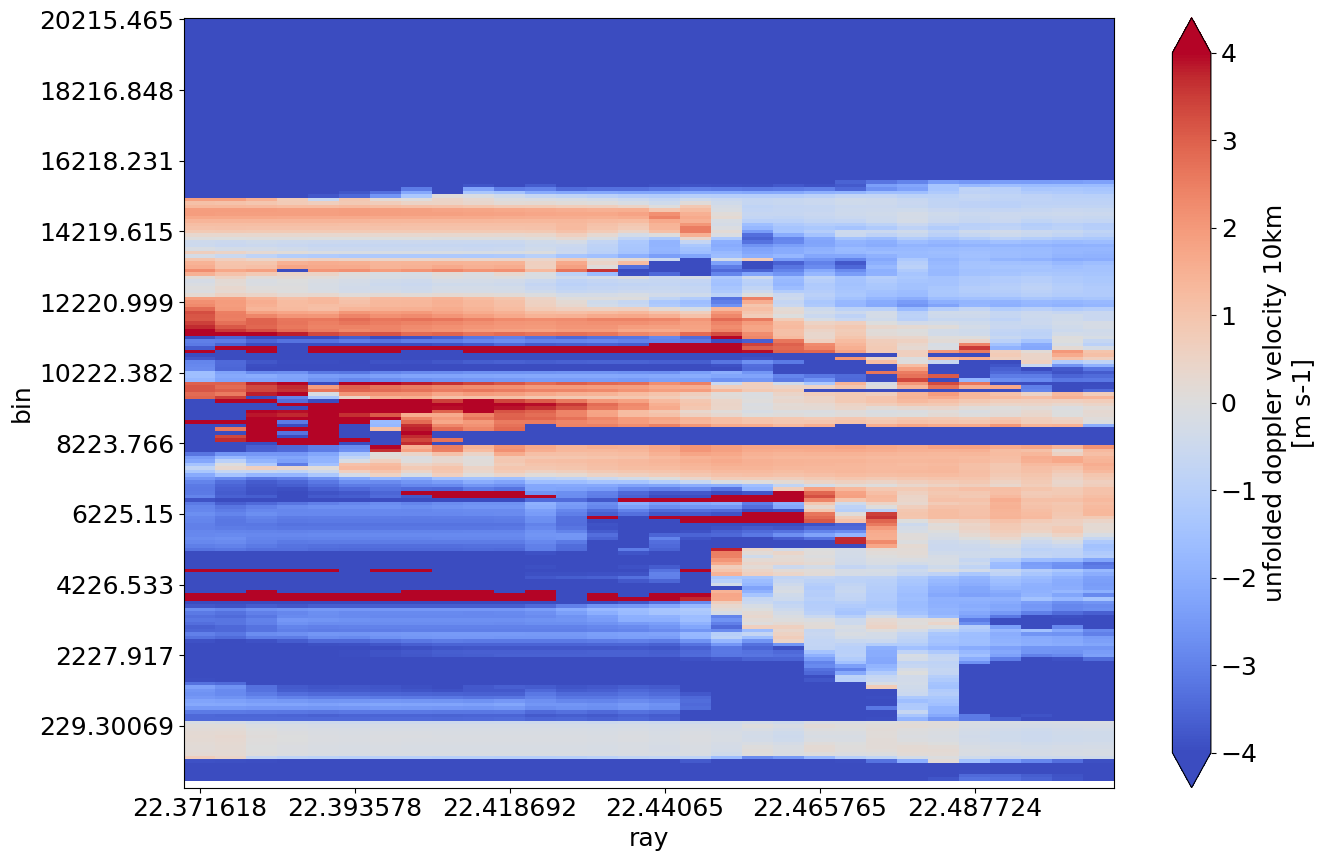

In [155]:
ec.isel(ray=slice(None, 30)).doppler_velocity_unfolded_10km.transpose().plot(cmap='coolwarm', vmin=-4, vmax=4)
# plt.ylim(0, 5000)
# plt.gca().invert_xaxis()

plt.gca().invert_yaxis()
# plt.axes().set_xticklabels(np.array(ec.isel(ray=slice(None, 30)).lat))

plt.xticks(np.array(ec.isel(ray=slice(None, 30)).ray)[::5], np.array(ec.isel(ray=slice(None, 30)).lat)[::5])
plt.yticks(np.array(ec.isel(ray=15).bin)[::20], np.array(ec.isel(ray=15).height)[::20])

In [156]:
p  = '/home/arthur/data/earthCARE/samples/JAXA_L1B_vCa/case_corr_xCa/data/corr_xCa/ECA_J_CPR_NOM_1BS_20240915T1728_20240915T1740_01708B_vCa_corr_xCa.nc'
ec = xr.open_dataset(p)

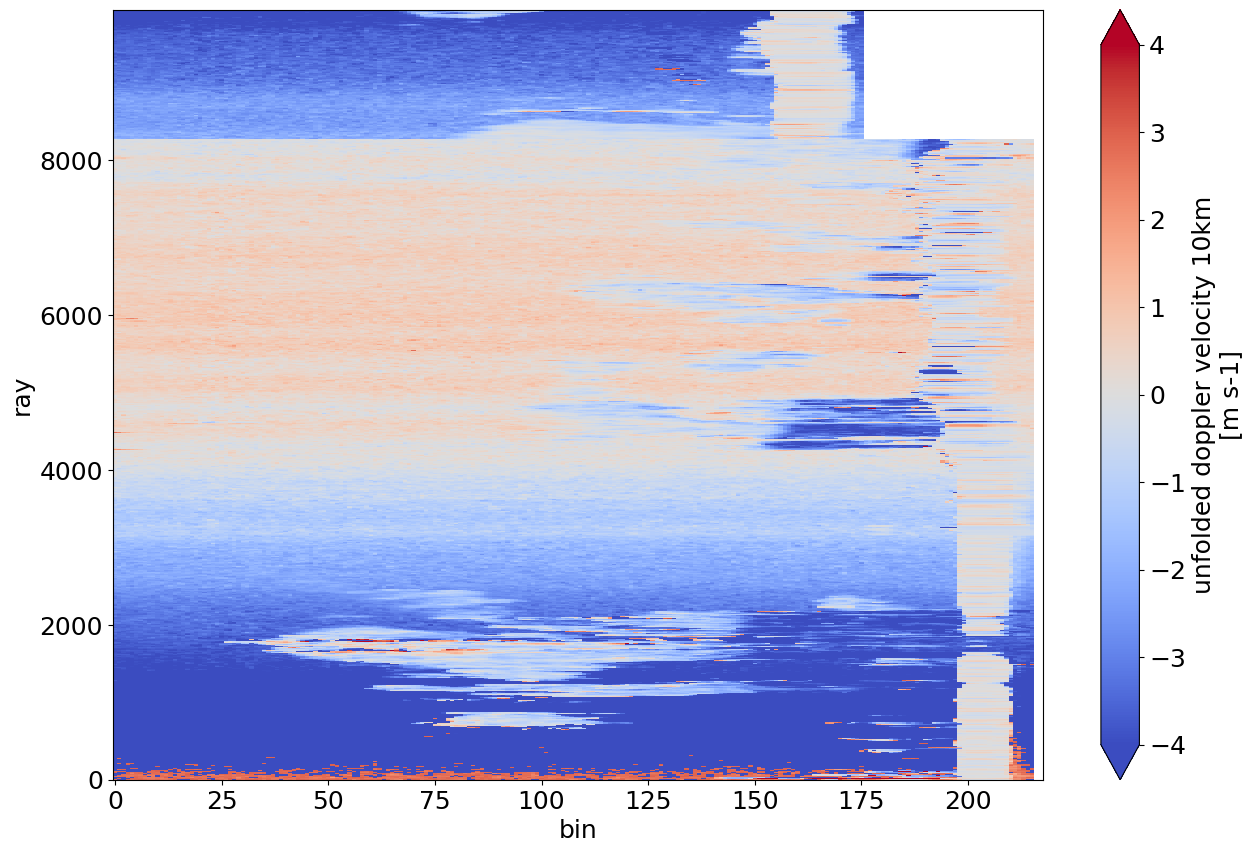

In [157]:
ec.doppler_velocity_unfolded_10km.plot(cmap='coolwarm', vmin=-4, vmax=4)

In [158]:
ec_avg = ec.isel(ray=slice(1500, 1800)).mean(dim='ray')

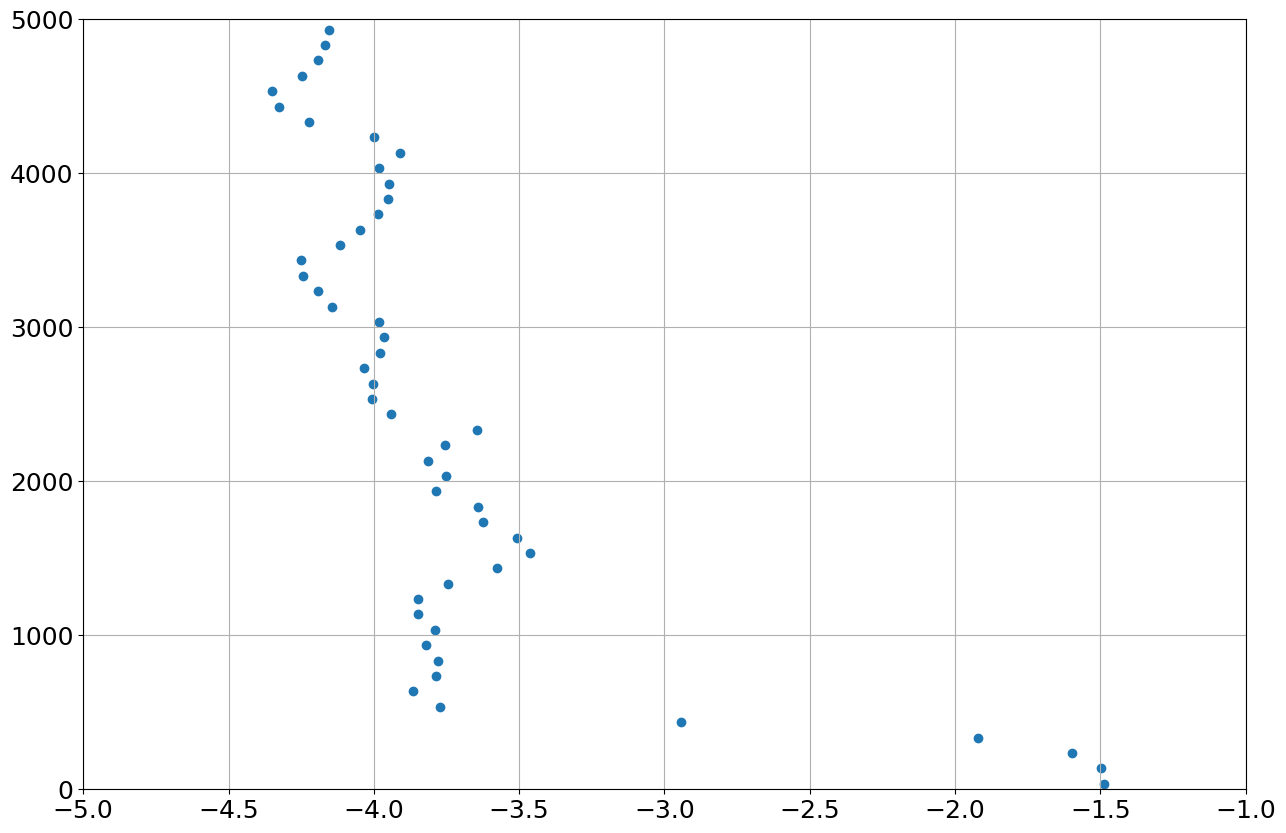

In [159]:
plt.scatter(ec_avg.doppler_velocity_unfolded_10km, ec_avg.height)
plt.ylim(0, 5000)
plt.xlim(-5, -1)
plt.grid()

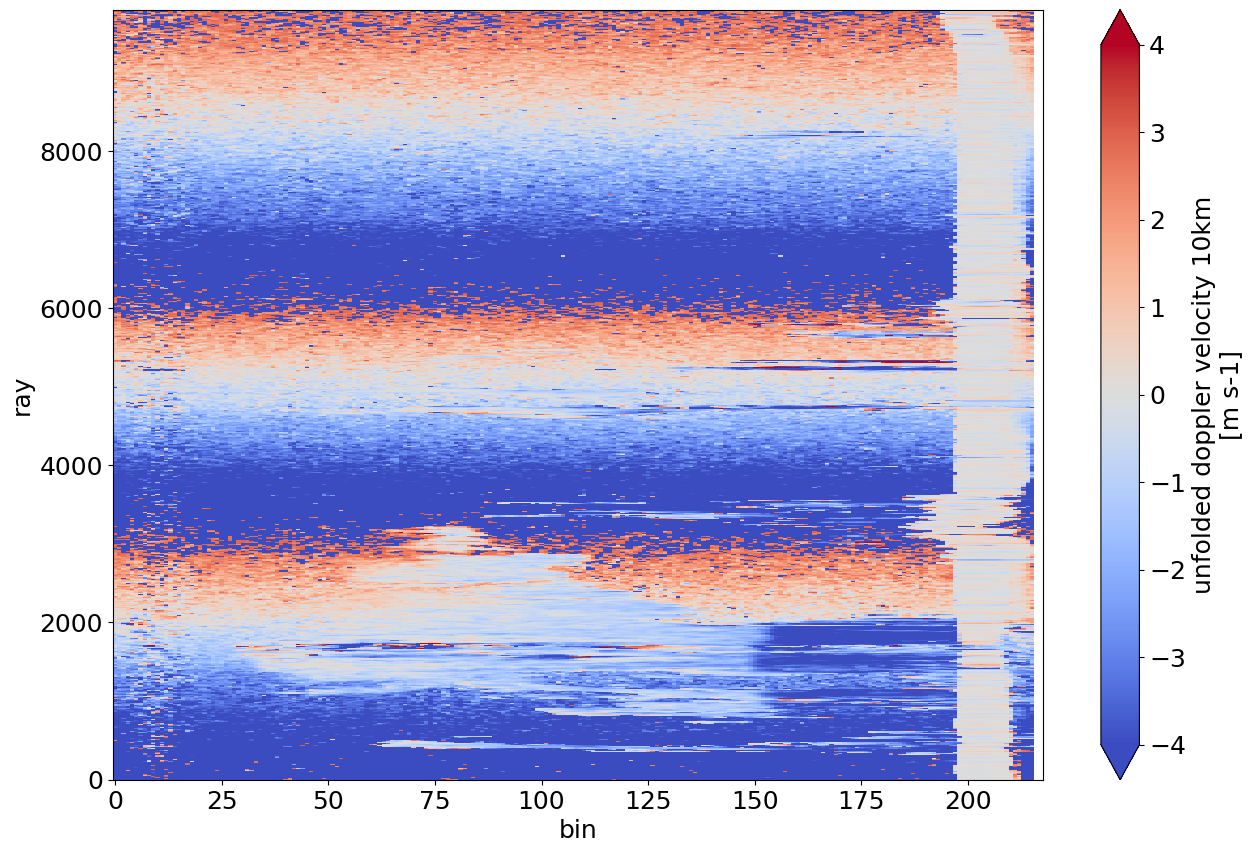

In [74]:
p  = '/home/arthur/data/earthCARE/samples/JAXA_L1B_vCa/case_corr_xCa/data/corr_xCa/ECA_J_CPR_NOM_1BS_20241113T0538_20241113T0550_02618E_vCa_corr_xCa.nc'
ec = xr.open_dataset(p)
ec.doppler_velocity_unfolded_10km.plot(cmap='coolwarm', vmin=-4, vmax=4)

In [75]:
ec_avg = ec.isel(ray=slice(1500, 1800)).mean(dim='ray')

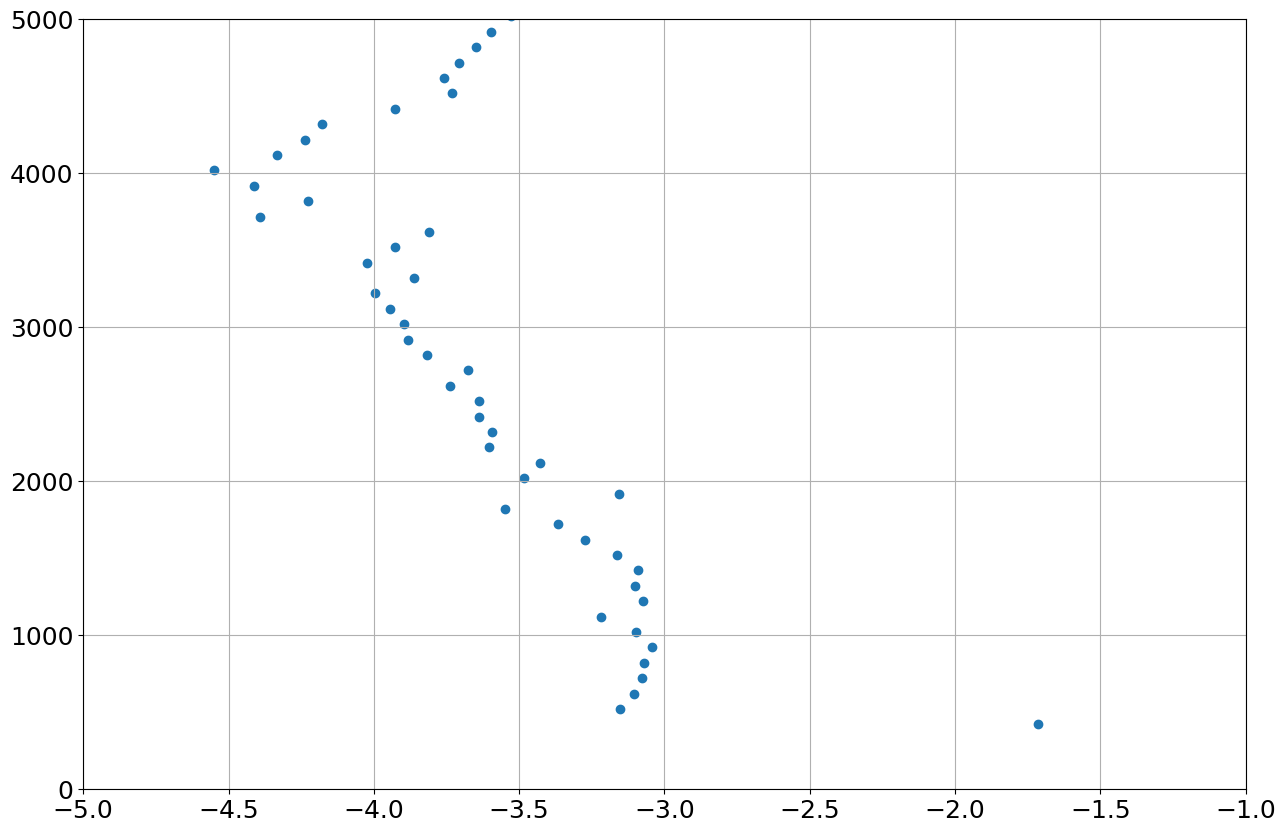

In [76]:
plt.scatter(ec_avg.doppler_velocity_unfolded_10km, ec_avg.height)
plt.ylim(0, 5000)
plt.xlim(-5, -1)
plt.grid()

In [104]:
ec_nearcore = ec.isel(ray=slice(1540, 2000)).isel(bin=slice(-35, None))
ec_nearcore = ec_nearcore.where(ec_nearcore.height > 0)
# plt.hist(np.array(ec_nearcore.height).flatten())

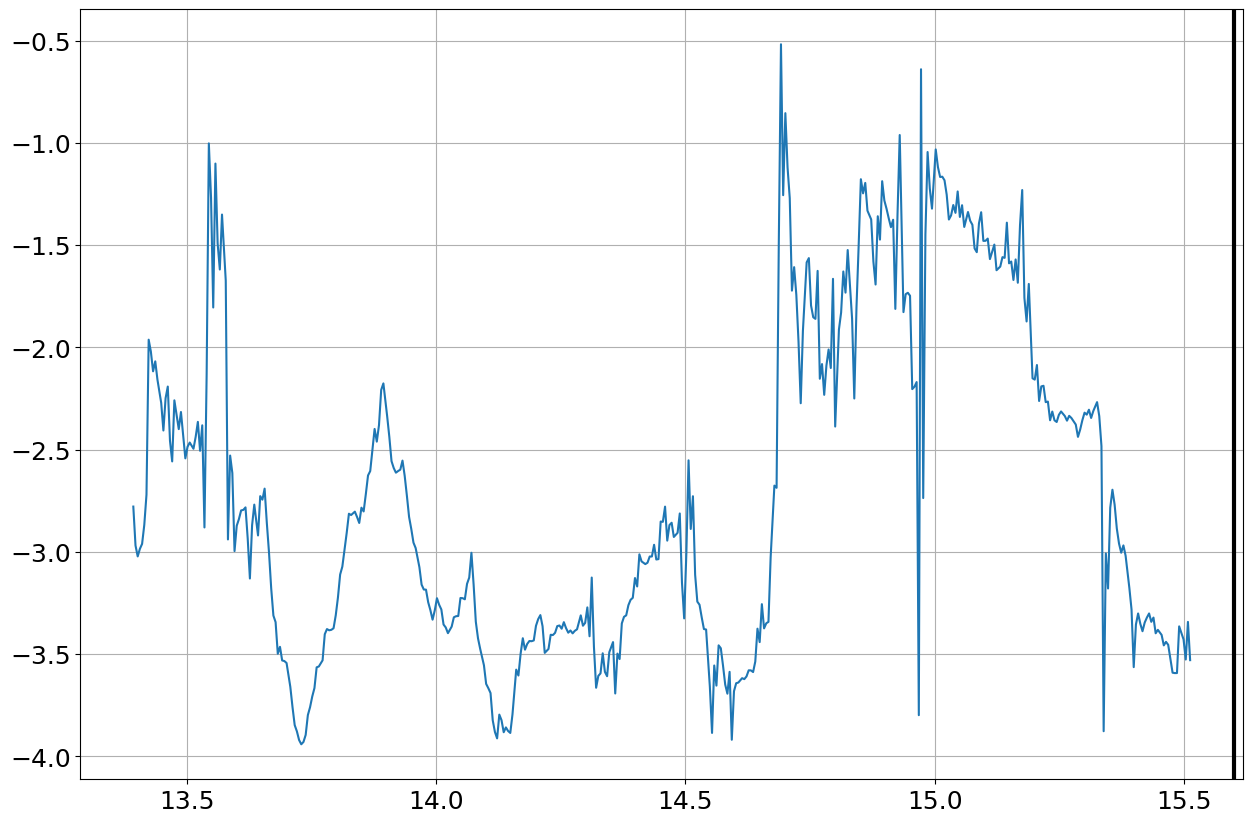

In [112]:
plt.plot(ec_nearcore.mean(dim='bin').lat, ec_nearcore.mean(dim='bin').doppler_velocity_unfolded_10km)
plt.axvline(15.6, c='k', linewidth=3)
plt.grid()

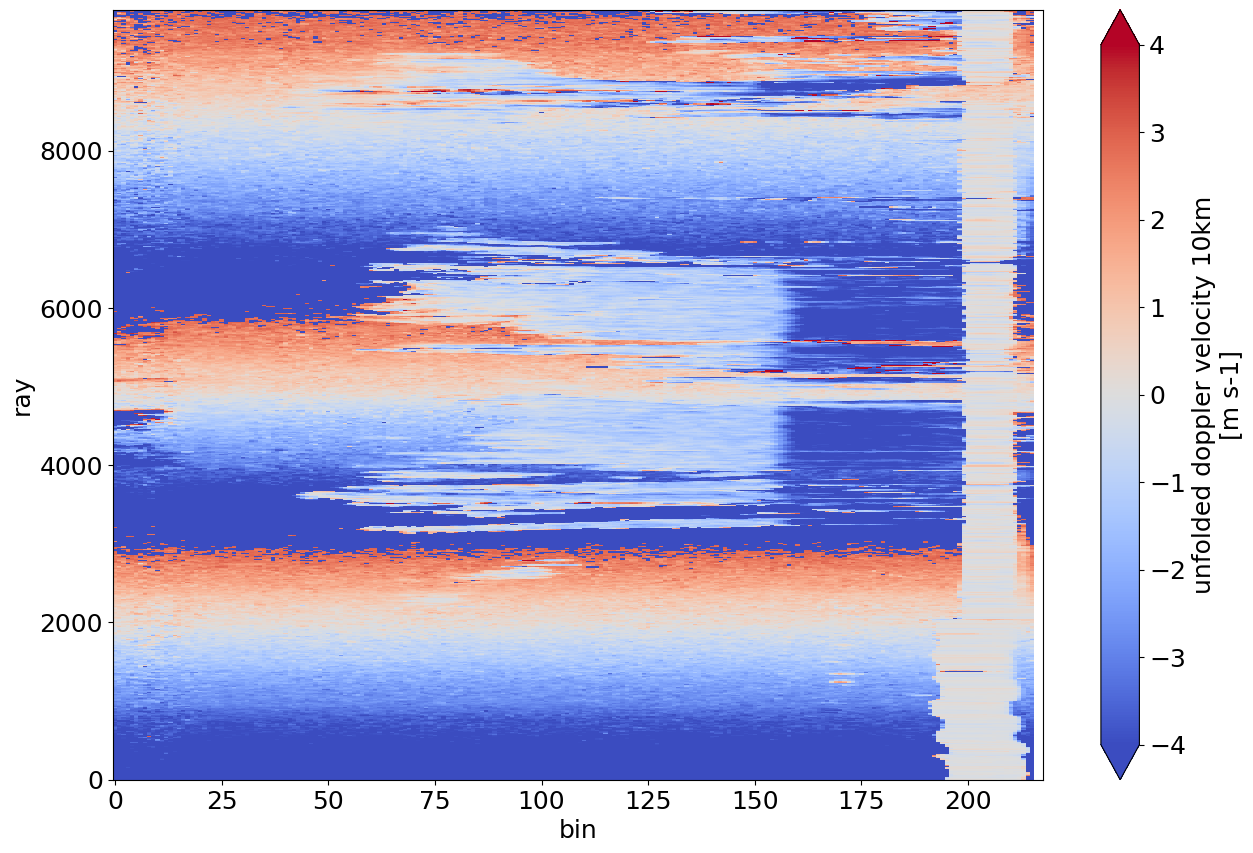

In [167]:
p  = '/home/arthur/data/earthCARE/samples/JAXA_L1B_vCa/case_corr_xCa/data/corr_xCa/ECA_J_CPR_NOM_1BS_20241118T0903_20241118T0915_02698E_vCa_corr_xCa.nc'
ec = xr.open_dataset(p)
ec.doppler_velocity_unfolded_10km.plot(cmap='coolwarm', vmin=-4, vmax=4)

In [168]:
ec_avg = ec.isel(ray=slice(1000, 1150)).mean(dim='ray')

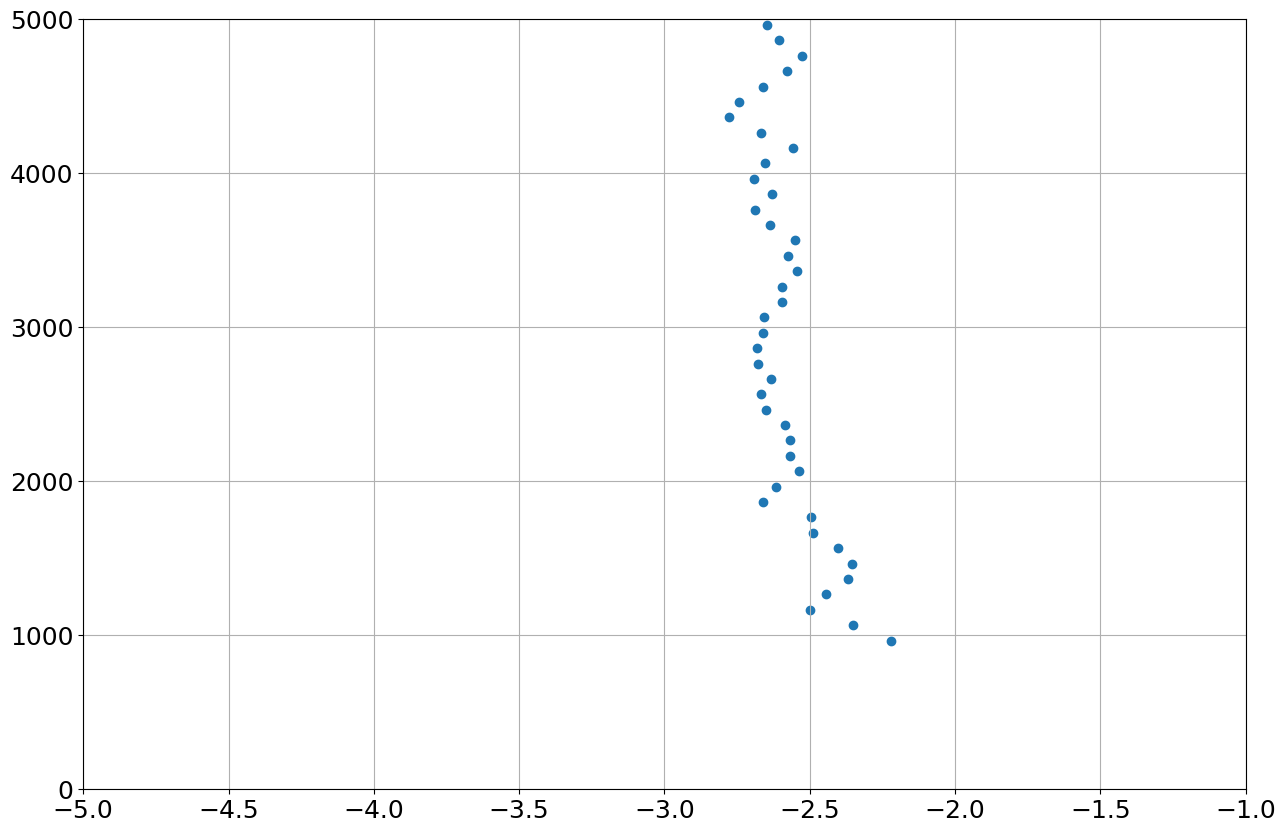

In [174]:
plt.scatter(ec_avg.doppler_velocity_unfolded_10km, ec_avg.height)
plt.ylim(0, 5000)
plt.xlim(-5, -1)
plt.grid()

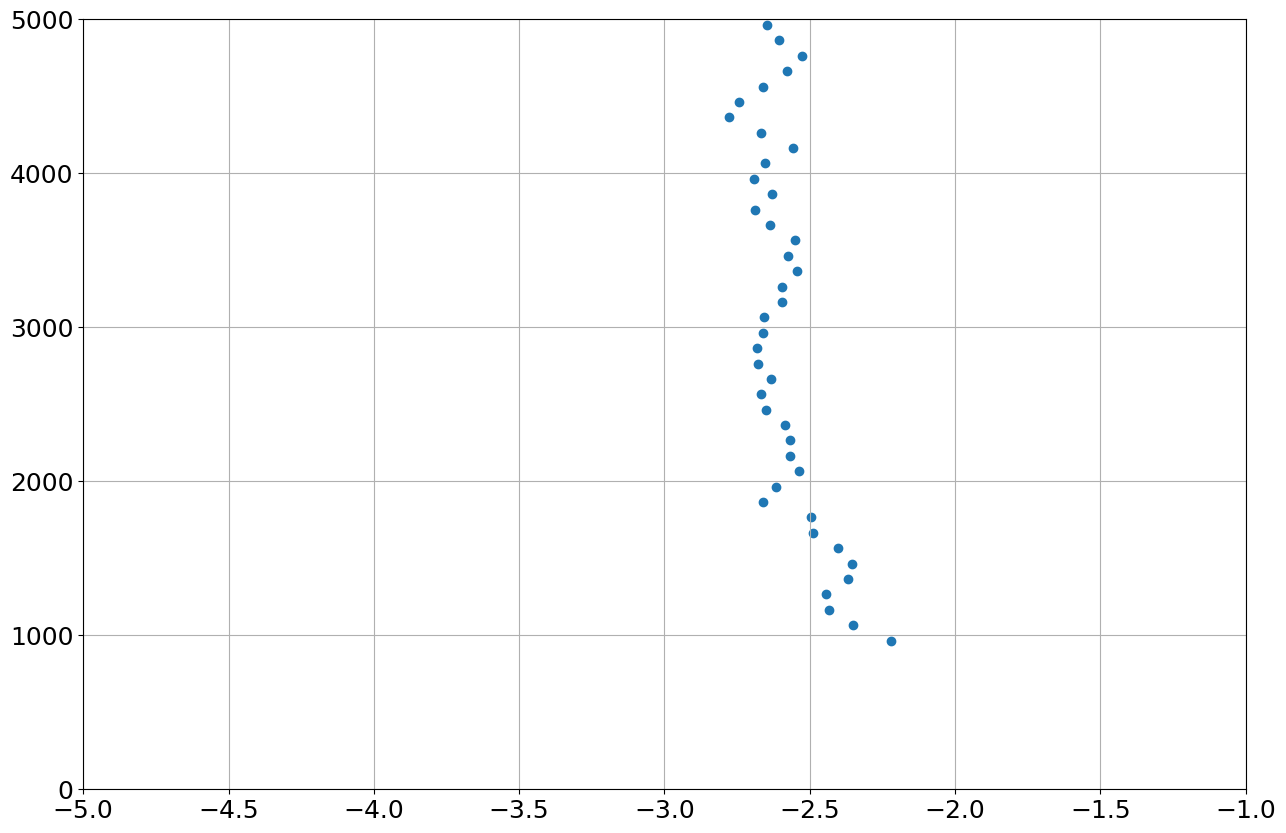

In [175]:
plt.scatter(ec_avg.doppler_velocity_corrected_10km, ec_avg.height)
plt.ylim(0, 5000)
plt.xlim(-5, -1)
plt.grid()